## 1. Importing Libraries

<a id = 'Importing_libraries' ></a>

In [ ]:
#Import basics library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
import requests
#some built in functions
import itertools
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore', InterpolationWarning)

#importing high level interactive plotting libraries
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# importing time series stats model
import statsmodels.api as sm
from statsmodels.api import tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#importing Sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

#sklearn library
from sklearn.preprocessing import MinMaxScaler

# importing for recommend system
from scipy import sparse
import scipy.sparse
from sklearn.cluster import KMeans

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pmdarima

In [ ]:
# Time series libraries
import statsmodels                          as sm

# Decomposition of time series
from statsmodels.tsa.seasonal               import seasonal_decompose
# ACF and PACF
from statsmodels.graphics.tsaplots          import plot_acf, plot_pacf
# Stationarity tests
from statsmodels.tsa.stattools              import adfuller, kpss
# Models
from pmdarima.arima                         import auto_arima
from statsmodels.tsa.arima.model            import ARIMA
from statsmodels.tsa.statespace.sarimax     import SARIMAX

# Metrics
from sklearn.metrics                        import mean_absolute_error, mean_squared_error

# Other libraries
import warnings

## 2. Importing Data



In [ ]:
# List of data
url_list = [
    'https://drive.google.com/file/d/1Ek_n3yjHvTs4SOtY0OB1F4-1ikBgVnhq/view?usp=sharing',
    'https://drive.google.com/file/d/1T5JipyU2FhNhsC4_A70rS_Fqjc2SQbKU/view?usp=sharing',
    'https://drive.google.com/file/d/1wKaR_hmtD6U12vx2bcxq8JmLakrsSTUM/view?usp=sharing',
    'https://drive.google.com/file/d/1g_jsD-zF2nzuWAHUBrNHavDAVydIy-ki/view?usp=sharing',
    'https://drive.google.com/file/d/1sPhbqt6rgpOog6pb_0Yqi0spKLlt6wjp/view?usp=sharing',
    'https://drive.google.com/file/d/1cv-POoMnoVMky1y05SnXAmepCcTqiZzI/view?usp=sharing',
    'https://drive.google.com/file/d/167y6lErwqCogWkDEbxcS3KrHzcF0Cph-/view?usp=sharing',
    'https://drive.google.com/file/d/1sybVPhhXdg_AvYdA1XIPN2Ax0NxoeLIC/view?usp=sharing',
    'https://drive.google.com/file/d/135sa9zc6xI40aL2mH1xWTb8Um3rSpuNE/view?usp=sharing',
]
df_names = ['customers', 'geolocation', 'oder_items', 'order_payment', 'order_reviews',
                'orders', 'products', 'sellers', 'product_category']
# Create dictionary
dataframes = {}
# Loop and read data
for url, df_names in zip(url_list, df_names):
    file_id = url.split('/')[-2]
    download_url = f"https://drive.google.com/uc?id={file_id}"
    response = requests.get(download_url)
    data = pd.read_csv(download_url)
    dataframes[df_names] = data
#Show key of dataframes
print(dataframes.keys())

dict_keys(['customers', 'geolocation', 'oder_items', 'order_payment', 'order_reviews', 'orders', 'products', 'sellers', 'product_category'])


Let us quickly check the shape of each table.

# 3. Data Preprocessing



folder: data_cleaning gồm:
- customer_cleaned
- holiday
- order_cleaned
- product_cleaned
- seller_cleaned  
- master_dataset

## 3.1. Data integration

<a id = 'reading' ></a>

### 3.1.1. Customers with geolocation

<a id = 'customer_dataset' ></a>

In [ ]:
#reading head and tail of the customer dataframe
sm_customers = dataframes['customers']
customers = sm_customers.copy()
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
#reading the tail
customers.tail()

customer_id                customer_unique_id  \
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix    customer_city customer_state  
99436                      3937        sao paulo             SP  
99437                      6764  taboao da serra             SP  
99438                     60115        fortaleza             CE  
99439                     92120           canoas             RS  
99440                      6703            cotia             SP

In [ ]:
#getting overview of datasets that we have.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
#checking the null values
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
#checking duplicates across rows
customers.duplicated().sum()

0

In [ ]:
#checking duplicates across columns
customers.T.duplicated().sum()

0

In [ ]:
#checking the unique values in column customer unique id and customer id
customers['customer_id'].nunique()

99441

In [ ]:
#checking the number of unique customers
customers['customer_unique_id'].nunique()

96096

In [ ]:
#Repeat customers
99441-96096

3345

In [ ]:
#percentage of repeat customers
96096/99441

0.9663619633752677

- có 99441 khách hàng mới, trong đó có 96096 khách hàng duy nhất
- tuy nhiên, không có dữ liệu về vị trí chính xác của KH  

In [ ]:
#reading head and tail of the geoloc dataframe
sm_location = dataframes['geolocation']
geoloc = sm_location.copy()
geoloc.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037          -23.546          -46.639   
1                         1046          -23.546          -46.645   
2                         1046          -23.546          -46.643   
3                         1041          -23.544          -46.639   
4                         1035          -23.542          -46.642   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [ ]:
#reading the tail
geoloc.tail()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
1000158                        99950          -28.069          -52.011   
1000159                        99900          -27.877          -52.225   
1000160                        99950          -28.072          -52.015   
1000161                        99980          -28.389          -51.847   
1000162                        99950          -28.070          -52.019   

        geolocation_city geolocation_state  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS

In [ ]:
#getting overview of datasets that we have.
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
#checking the null values
geoloc.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
#checking@ duplicates across rows
geoloc.duplicated().sum()

261831

- Trong bộ geolocation, loại bỏ giá trị trùng lặp bằng cách giữ lại hàng đầu tiên của giá trị bị trùng lặp  

In [ ]:
#checking duplicates across rows by keeping only the frist value and dropping the next matching value in place
geoloc.drop_duplicates(keep='first', inplace=True)

In [ ]:
#checking duplicates across rows
geoloc.duplicated().sum()

0

In [ ]:
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [ ]:
#checking the unique values in geolocation_zip_code_prefix
geoloc['geolocation_zip_code_prefix'].nunique()

19015

- trong 738332 dòng chỉ có 19015 giá trị zip code prefix duy nhất, có thể thấy một zipcode đại diện cho một vị trí, trong đó kinh độ và vĩ độ có sự chênh lệch

In [ ]:
#checking no of rows with same zip code.
geoloc['geolocation_zip_code_prefix'].value_counts()

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
90038      1
90002      1
29174      1
72230      1
45824      1
Name: count, Length: 19015, dtype: int64

In [ ]:
#quickly checking latitude and logitude values for a zipcode 38400
geoloc[geoloc['geolocation_zip_code_prefix']==38400]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
645450                        38400          -18.916          -48.279   
645456                        38400          -18.900          -48.261   
645460                        38400          -18.913          -48.262   
645461                        38400          -18.922          -48.282   
645471                        38400          -18.922          -48.271   
...                             ...              ...              ...   
650433                        38400          -18.913          -48.288   
650434                        38400          -18.915          -48.298   
650439                        38400          -18.899          -48.260   
650440                        38400          -18.887          -48.265   
650446                        38400          -18.921          -48.298   

       geolocation_city geolocation_state  
645450       uberlandia                MG  
645456       uberlandia                MG  
645460       uberlandia                MG  
645461       uberlandia                MG  
645471       uberlandia                MG  
...                 ...               ...  
650433       uberlândia                MG  
650434       uberlandia                MG  
650439       uberlândia                MG  
650440       uberlandia                MG  
650446       uberlândia                MG  

[779 rows x 5 columns]

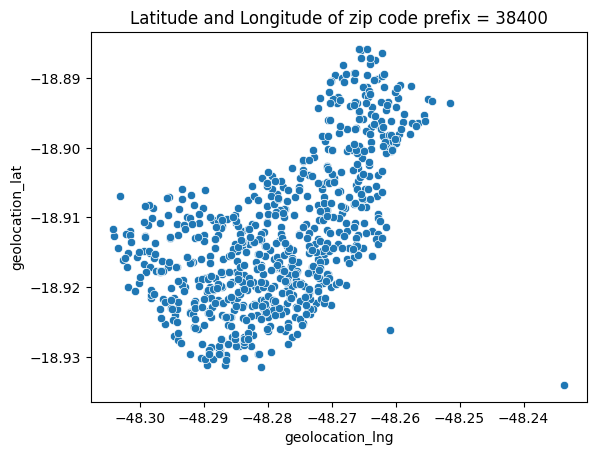

In [ ]:
plt.title('Latitude and Longitude of zip code prefix = 38400')
sns.scatterplot(data= geoloc[geoloc['geolocation_zip_code_prefix']==38400], y='geolocation_lat', x='geolocation_lng' )
plt.show()

-  có tổng cộng 19015 mã bưu điện khác nhau và có thể có nhiều cặp vĩ độ và kinh độ được liên kết với mã đó để phân biệt các địa điểm khác nhau trong cùng một mã bưu điện.

- Bắt đầu tạo một dataframe riêng biệt với giá trị trung bình của tọa độ vĩ độ và kinh độ cho mỗi tiền tố mã bưu điện

In [ ]:
coordinates= geoloc.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()

In [ ]:
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 445.8 KB


In [ ]:
coordinates.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
0                         1001          -23.550          -46.634
1                         1002          -23.548          -46.635
2                         1003          -23.549          -46.636
3                         1004          -23.550          -46.635
4                         1005          -23.550          -46.636

#### Merging the coordinates dataframe with the customer dataframe

In [ ]:
#merging coordinates and customer
customer_loc=pd.merge(left=customers, right=coordinates, left_on='customer_zip_code_prefix',
                      right_on='geolocation_zip_code_prefix', how='left')

In [ ]:
#checking info
customer_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   customer_city                99441 non-null  object 
 4   customer_state               99441 non-null  object 
 5   geolocation_zip_code_prefix  99163 non-null  float64
 6   geolocation_lat              99163 non-null  float64
 7   geolocation_lng              99163 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.1+ MB


In [ ]:
#drop unnecesary column
customer_loc.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

In [ ]:
#reading the head
customer_loc.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

   geolocation_lat  geolocation_lng  
0          -20.499          -47.397  
1          -23.728          -46.542  
2          -23.531          -46.657  
3          -23.501          -46.186  
4          -22.976          -47.143

In [ ]:
#renaming the coluumn name
customer_loc.rename(columns = {'geolocation_lat':'customer_lat', 'geolocation_lng': 'customer_lng' }, inplace = True)

In [ ]:
#checking the null values
customer_loc.isnull().sum()

customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
customer_lat                278
customer_lng                278
dtype: int64

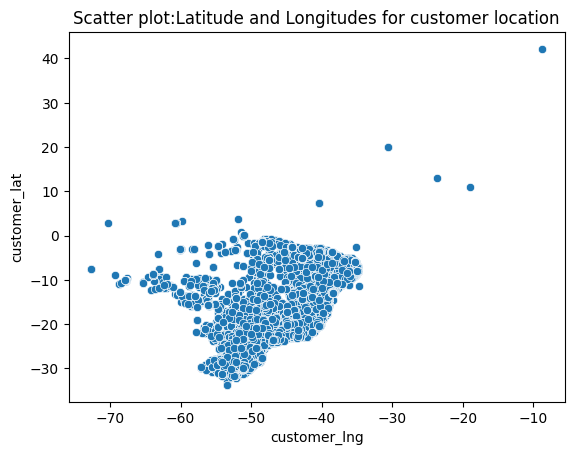

In [ ]:
sns.scatterplot(data=customer_loc, y='customer_lat', x='customer_lng')
plt.title('Scatter plot:Latitude and Longitudes for customer location')
plt.show()

In [ ]:
#separating the coordinates which have NAN
nan_coord=customer_loc[customer_loc['customer_lat'].isnull()]

In [ ]:
nan_coord.head()

customer_id                customer_unique_id  \
354   ecb1725b26e8b8c458181455dfa434ea  b55a113bb84fc10eaf58c6d09ec69794   
382   bcf86029aeed4ed8bac0e16eb14c22f5  7cd7974c9f79f75b77f323878ef87f43   
877   f4302056f0c58570522590f8181de2c7  67b05b597a66b5c449025000b9430abb   
1218  03bbe0ce5c28e05f22917607db798818  8f3dca4306d5a89e4ae2c65c110603a2   
1272  ad4950aded55c2ea376be59506456d68  aa2b96dd03307ea6dc4b763c0b5f0b39   

      customer_zip_code_prefix customer_city customer_state  customer_lat  \
354                      72300      brasilia             DF           NaN   
382                      11547       cubatao             SP           NaN   
877                      64605         picos             PI           NaN   
1218                     72465      brasilia             DF           NaN   
1272                      7729      caieiras             SP           NaN   

      customer_lng  
354            NaN  
382            NaN  
877            NaN  
1218           NaN  
1272           NaN

Cách tiếp cận để giải quyết giá trị rỗng trong cột kinh độ vĩ độ
- tổng hợp các cột dựa trên thành phố và tiểu bang của khách hàng và tính giá trị trung bình của vĩ độ và kinh độ có sẵn cho sự kết hợp thành phố và tiểu bang đó vào d_tally df
- Sử dụng các giá trị vĩ độ và kinh độ đã tính toán này, chúng ta sẽ điền vào các giá trị vĩ độ và kinh độ bị thiếu trong trường hợp thành phố và tiểu bang tương ứng.


In [ ]:
#a dataframe to save the mean of latitude and longitude for city-state combination
d_tally= customer_loc.groupby(['customer_city', 'customer_state'])[['customer_lat', 'customer_lng'] ].mean().reset_index()

In [ ]:
#checking for null
d_tally.isnull().sum()

customer_city      0
customer_state     0
customer_lat      51
customer_lng      51
dtype: int64

- Tiếp tục điền vào giá trị NaN bằng cách điền vào các giá trị này bằng cách sử dụng giá trị trung bình của vĩ độ và kinh độ cho nhóm tương ứng, tức là tiểu bang của khách hàng.

In [ ]:
#d_tally head
d_tally.head()

customer_city customer_state  customer_lat  customer_lng
0  abadia dos dourados             MG       -18.478       -47.406
1            abadiania             GO       -16.194       -48.709
2               abaete             MG       -19.158       -45.447
3           abaetetuba             PA        -1.724       -48.881
4              abaiara             CE        -7.356       -39.043

In [ ]:
# grouping by customer state and imputing the misisng latitude by mean of that group or customer state
d_tally['customer_lat']=d_tally.groupby('customer_state', sort=False)['customer_lat'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# grouping by customer state and imputing the misisng longitude by mean of that group or customer state
d_tally['customer_lng']=d_tally.groupby('customer_state', sort=False)['customer_lng'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
#checking for missing values
d_tally.isnull().sum()

customer_city     0
customer_state    0
customer_lat      0
customer_lng      0
dtype: int64

- Điền vào các giá trị vĩ độ và kinh độ bị thiếu bằng cách sử dụng giá trị vĩ độ và kinh độ có sẵn trong bảng d_tally nơi thành phố trùng khớp với thành phố trong bảng khách hàng.

In [ ]:
for i in nan_coord.index:
    customer_loc.loc[i, 'customer_lat']=d_tally[d_tally['customer_city']==customer_loc.loc[i, 'customer_city']]['customer_lat'].values[0]
    customer_loc.loc[i, 'customer_lng']=d_tally[d_tally['customer_city']==customer_loc.loc[i, 'customer_city']]['customer_lng'].values[0]

In [ ]:
#checking if we still have any null value
customer_loc.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
customer_lat                0
customer_lng                0
dtype: int64

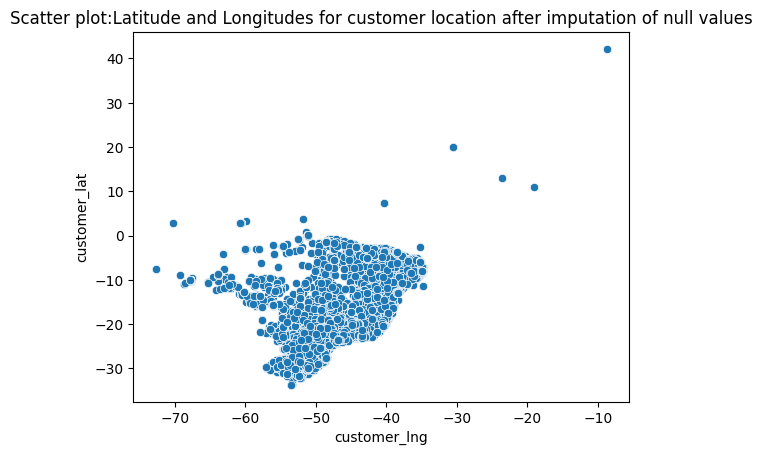

In [ ]:
sns.scatterplot(data=customer_loc, y='customer_lat', x='customer_lng')
plt.title('Scatter plot:Latitude and Longitudes for customer location after imputation of null values')
plt.show()

In [ ]:
#let us save it into a file
!mkdir -p /content/sample_data/data_cleaning
customer_loc.to_csv('/content/sample_data/data_cleaning/customer_cleaned.csv', index=False)

### 3.1.2. Sellers dataset

<a id = 'seller_dataset' ></a>

In [ ]:
#reading head and tail of the sellers dataframe
sm_sellers = dataframes['sellers']
sellers = sm_sellers.copy()
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:
sellers.tail()

seller_id  seller_zip_code_prefix seller_city  \
3090  98dddbc4601dd4443ca174359b237166                   87111     sarandi   
3091  f8201cab383e484733266d1906e2fdfa                   88137     palhoca   
3092  74871d19219c7d518d0090283e03c137                    4650   sao paulo   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080     pelotas   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   

     seller_state  
3090           PR  
3091           SC  
3092           SP  
3093           RS  
3094           SP

In [ ]:
#getting overview of datasets that we have.
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
#checking the null values
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
#checking duplicates across rows
sellers.duplicated().sum()

0

In [ ]:
#checking duplicates across columns
sellers.T.duplicated().sum()

0

In [ ]:
#checking the unique values in column unique id and customer id
sellers['seller_id'].nunique()

3095

#### Merging the coordinates dataframe with the seller dataframe

In [ ]:
#merging the dataframes
seller_loc=pd.merge(left=sellers, right=coordinates, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [ ]:
#dropping unnecessary column
seller_loc.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

In [ ]:
seller_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               3095 non-null   object 
 1   seller_zip_code_prefix  3095 non-null   int64  
 2   seller_city             3095 non-null   object 
 3   seller_state            3095 non-null   object 
 4   geolocation_lat         3088 non-null   float64
 5   geolocation_lng         3088 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 145.2+ KB


In [ ]:
#renaming column name
seller_loc.rename(columns = {'geolocation_lat':'seller_lat', 'geolocation_lng': 'seller_lng' }, inplace = True)

In [ ]:
#checking null values
seller_loc.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_lat                7
seller_lng                7
dtype: int64

In [ ]:
#cities which are missing coordinates.
seller_loc.loc[seller_loc['seller_lat'].isnull()]

seller_id  seller_zip_code_prefix  \
473   5962468f885ea01a1b6a97a218797b0a                   82040   
791   2aafae69bf4c41fbd94053d9413e87ee                   91901   
1672  2a50b7ee5aebecc6fd0ff9784a4747d6                   72580   
1931  2e90cb1677d35cfe24eef47d441b7c87                    2285   
2182  0b3f27369a4d8df98f7eb91077e438ac                    7412   
2986  42bde9fef835393bb8a8849cb6b7f245                   71551   
3028  870d0118f7a9d85960f29ad89d5d989a                   37708   

          seller_city seller_state  seller_lat  seller_lng  
473          curitiba           PR         NaN         NaN  
791      porto alegre           RS         NaN         NaN  
1672         brasilia           DF         NaN         NaN  
1931        sao paulo           SP         NaN         NaN  
2182            aruja           SP         NaN         NaN  
2986         brasilia           DF         NaN         NaN  
3028  pocos de caldas           MG         NaN         NaN

In [ ]:
seller_loc['seller_city'].value_counts()

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

In [ ]:
#checking if we have mean latitude and longitude values for these cities
seller_loc[(seller_loc['seller_city']== 'sao paulo') | (seller_loc['seller_city']== 'curitiba') |
(seller_loc['seller_city']== 'porto alegre') | (seller_loc['seller_city']== 'brasilia') |
(seller_loc['seller_city']== 'aruja') | (seller_loc['seller_city']== 'pocos de caldas')]. \
groupby('seller_city')[['seller_zip_code_prefix', 'seller_lat', 'seller_lng']].mean()

seller_zip_code_prefix  seller_lat  seller_lng
seller_city                                                    
aruja                          7404.667     -23.396     -46.319
brasilia                      71520.929     -15.806     -47.962
curitiba                      81194.370     -25.453     -49.277
pocos de caldas               37705.600     -21.812     -46.558
porto alegre                  90875.393     -30.036     -51.190
sao paulo                      3951.202     -23.548     -46.630

In [ ]:
#saving the calaculation from above in separate dataframe
sdb=seller_loc.groupby('seller_city')[['seller_zip_code_prefix', 'seller_lat', 'seller_lng']].mean().reset_index()

We can impute the missing latitude and longitude values with the mean latitude and longitude values at these cities.

In [ ]:
for i in seller_loc[seller_loc['seller_lat'].isnull()].index:
    seller_loc.loc[i, 'seller_lat']=sdb[sdb['seller_city']==seller_loc.loc[i, 'seller_city']]['seller_lat'].values[0]
    seller_loc.loc[i, 'seller_lng']=sdb[sdb['seller_city']==seller_loc.loc[i, 'seller_city']]['seller_lng'].values[0]

In [ ]:
#checking for null
seller_loc.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_lat                0
seller_lng                0
dtype: int64

In [ ]:
# save the cleaned data to file
seller_loc.to_csv('/content/sample_data/data_cleaning/seller_cleaned.csv', index=False)

### 3.1.3. Order item dataset

<a id = 'order_item_dataset' ></a>

In [ ]:
#reading head and tail of the order item dataframe
sm_order_items = dataframes['oder_items']
order_items = sm_order_items.copy()
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35  58.900         13.290  
1  2017-05-03 11:05:13 239.900         19.930  
2  2018-01-18 14:48:30 199.000         17.870  
3  2018-08-15 10:10:18  12.990         12.790  
4  2017-02-13 13:57:51 199.900         18.140

In [ ]:
order_items.tail()

order_id  order_item_id  \
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
112645  2018-05-02 04:11:01 299.990         43.410  
112646  2018-07-20 04:31:48 350.000         36.530  
112647  2017-10-30 17:14:25  99.900         16.950  
112648  2017-08-21 00:04:32  55.990          8.720  
112649  2018-06-12 17:10:13  43.000         12.790

In [ ]:
#getting overview of datasets that we have.
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
#checking the null values
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
#checking duplicates across rows
order_items.duplicated().sum()

0

In [ ]:
#checking duplicates across columns
order_items.T.duplicated().sum()

0

In [ ]:
#checking the unique values in column order_id and order_item_id
order_items['order_id'].nunique()

98666

In [ ]:
#difference in order number as compared to total orders
99441-98666

775

-

In [ ]:
order_items['order_item_id'].nunique()

21

### 3.1.4. Order dataset
<a id = 'order_dataset' ></a>

In [ ]:
#reading head and tail of the order dataframe
sm_orders = dataframes['orders']
orders = sm_orders.copy()
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
orders.tail()

order_id                       customer_id  \
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00

In [ ]:
#getting overview of datasets that we have.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
#checking the null values
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders.isnull().sum().sum()

4908

In [ ]:
#checking duplicates across rows
orders.duplicated().sum()

0

In [ ]:
#checking duplicates across columns
orders.T.duplicated().sum()

0

In [ ]:
#checking the unique values in order id and customer id
orders['order_id'].nunique()

99441

Có 3 cột null: order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date.
--> Cần xét mối quan hệ của 3 cột này với Order status

In [ ]:
#convert all the rows with date time data to date-time format.
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at']=pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date']=pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])

In [ ]:
#percentage of values that are missing
orders.isnull().mean()*100

order_id                        0.000
customer_id                     0.000
order_status                    0.000
order_purchase_timestamp        0.000
order_approved_at               0.161
order_delivered_carrier_date    1.793
order_delivered_customer_date   2.982
order_estimated_delivery_date   0.000
dtype: float64

- Giá trị bị thiếu ở cột carrier date và customer date có thể liên quan đến Order status, có thể do đơn hàng vận chuyển không thành công.


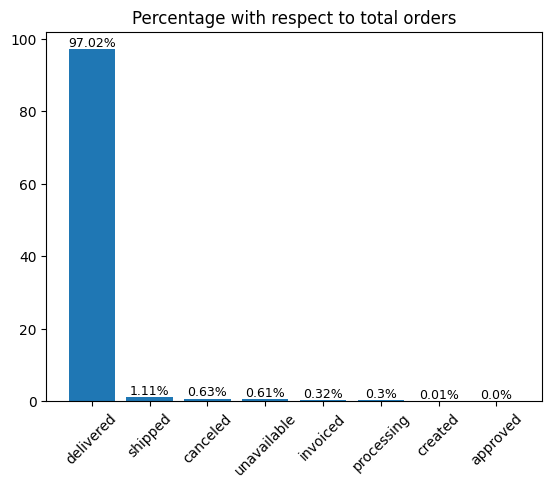

In [ ]:
#percentage of order according to different order status
order_st_per= round(orders['order_status'].value_counts(normalize=True)*100, 2)

#ploting the orders to visually check what all status do we have.
plt.figure()
graph=plt.bar(order_st_per.index, order_st_per.values)
plt.title("Percentage with respect to total orders")
plt.xticks(rotation=45)
for p in graph:
    height=p.get_height()
    plt.annotate( "{}%".format(height),(p.get_x() + p.get_width()/2, height+.05),ha="center",va="bottom",fontsize=9)
plt.show()

-  lọc các hàng có giá trị bị thiếu và kiểm tra trạng thái của đơn hàng đó để kiểm tra mối quan hệ giữa missing value và Order status

In [ ]:
#checking the status where all the values are missing
orders.loc[orders['order_delivered_customer_date'].isnull() & \
           orders['order_delivered_carrier_date'].isnull() & \
           orders['order_approved_at'].isnull() ]['order_status'].value_counts()

order_status
canceled    141
created       5
Name: count, dtype: int64

In [ ]:
#checking the status where both order delivered customer and delivered carrier are missing
orders.loc[orders['order_delivered_customer_date'].isnull() & \
           orders['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        1
Name: count, dtype: int64

In [ ]:
#checking the status where only order delivered customer is missing
orders.loc[orders['order_delivered_customer_date'].isnull()]['order_status'].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [ ]:
#checking the status where only order delivered carrier is missing
orders.loc[orders['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [ ]:
#checking the status where only order approved is missing
orders.loc[orders['order_approved_at'].isnull()]['order_status'].value_counts()

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [ ]:
#checking the status where both order approved and order delivered customer are missing
orders.loc[orders['order_approved_at'].isnull() &
           orders['order_delivered_customer_date'].isnull() ]['order_status'].value_counts()

order_status
canceled    141
created       5
Name: count, dtype: int64

#### Calculate misssing value


In [ ]:
#calculating difference in days between the purchase date and the columns with NANS
diff_est=((orders['order_estimated_delivery_date']-orders['order_purchase_timestamp'])/np.timedelta64(1, 'D')).astype(int)
diff_approved=((orders['order_approved_at']-orders['order_purchase_timestamp'])/np.timedelta64(1, 'D'))
diff_logist=((orders['order_delivered_carrier_date']-orders['order_purchase_timestamp'])/np.timedelta64(1, 'D'))
diff_del=((orders['order_delivered_customer_date']-orders['order_purchase_timestamp'] )/np.timedelta64(1, 'D'))

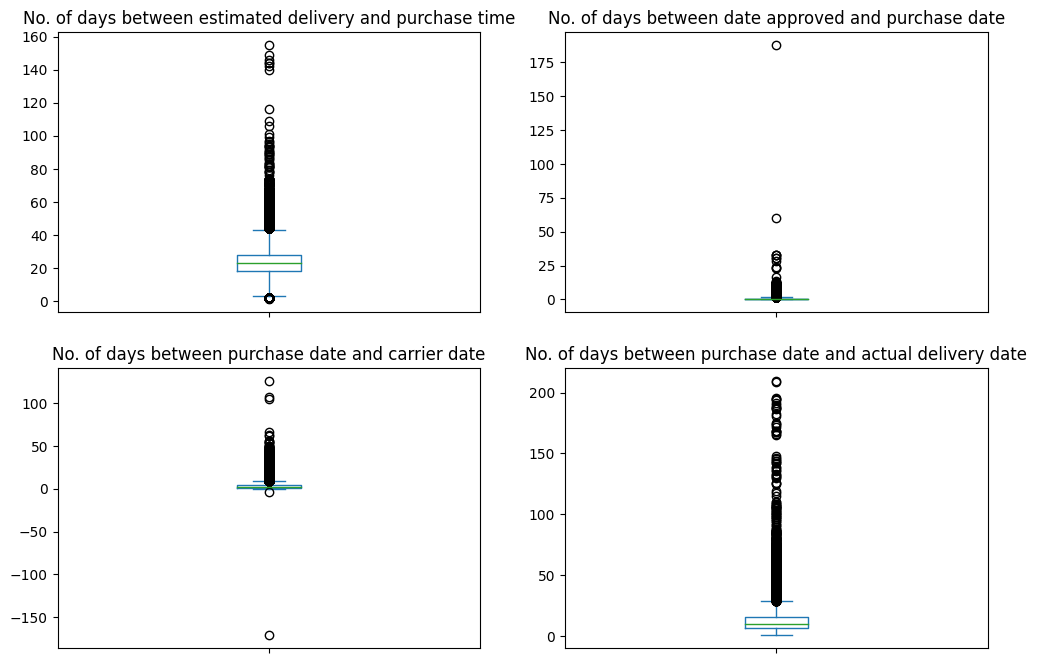

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
diff_est.plot.box(title='No. of days between estimated delivery and purchase time')

plt.subplot(2, 2, 2)
diff_approved.plot.box(title='No. of days between date approved and purchase date')

plt.subplot(2, 2, 3)
diff_logist.plot.box(title='No. of days between purchase date and carrier date')

plt.subplot(2, 2, 4)
diff_del.plot.box(title='No. of days between purchase date and actual delivery date')
plt.show()

- Khi nhìn vào biểu đồ hình hộp, chúng ta có rất nhiều giá trị ngoại lệ và do đó việc tính toán bằng cách sử dụng trung vị là cách tiếp cận phù hợp.
- Thực hiện drop columns vì không có giá trị cho model, tuy nhiên có thể tính toán tính số ngày trung vị từ mỗi diff_approved, diff_ologist, diff_del và thêm nó vào order_purchase_timestamp để có được order_approved_at, order_delivered_carrier_date, order_delivered_customer_date tương ứng.

In [ ]:
orders.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


### 3.1.5. Product dataset
<a id = 'product_dataset' ></a>

In [ ]:

#reading head and tail of the customer dataframe
sm_products = dataframes['products']
products = sm_products.copy()
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0               40.000                     287.000               1.000   
1               44.000                     276.000               1.000   
2               46.000                     250.000               1.000   
3               27.000                     261.000               1.000   
4               37.000                     402.000               4.000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0           225.000             16.000             10.000            14.000  
1          1000.000             30.000             18.000            20.000  
2           154.000             18.000              9.000            15.000  
3           371.000             26.000              4.000            26.000  
4           625.000             20.000             17.000            13.000

In [ ]:
products.tail()

product_id              product_category_name  \
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
32946               45.000                      67.000               2.000   
32947               41.000                     971.000               1.000   
32948               50.000                     799.000               1.000   
32949               60.000                     156.000               2.000   
32950               58.000                     309.000               1.000   

       product_weight_g  product_length_cm  product_height_cm  \
32946         12300.000             40.000             40.000   
32947          1700.000             16.000             19.000   
32948          1400.000             27.000              7.000   
32949           700.000             31.000             13.000   
32950          2083.000             12.000              2.000   

       product_width_cm  
32946            40.000  
32947            16.000  
32948            27.000  
32949            20.000  
32950             7.000

In [ ]:
#getting overview of datasets that we have.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
#checking the null values
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products.isnull().sum().sum()

2448

In [ ]:
#checking duplicates across rows
products.duplicated().sum()

0

In [ ]:
#checking duplicates across columns
products.T.duplicated().sum()

0

In [ ]:
#checking the unique values in column unique id and customer id
products['product_category_name'].nunique()

73

In [ ]:
products['product_id'].nunique()

32951

<Axes: xlabel='product_category_name'>

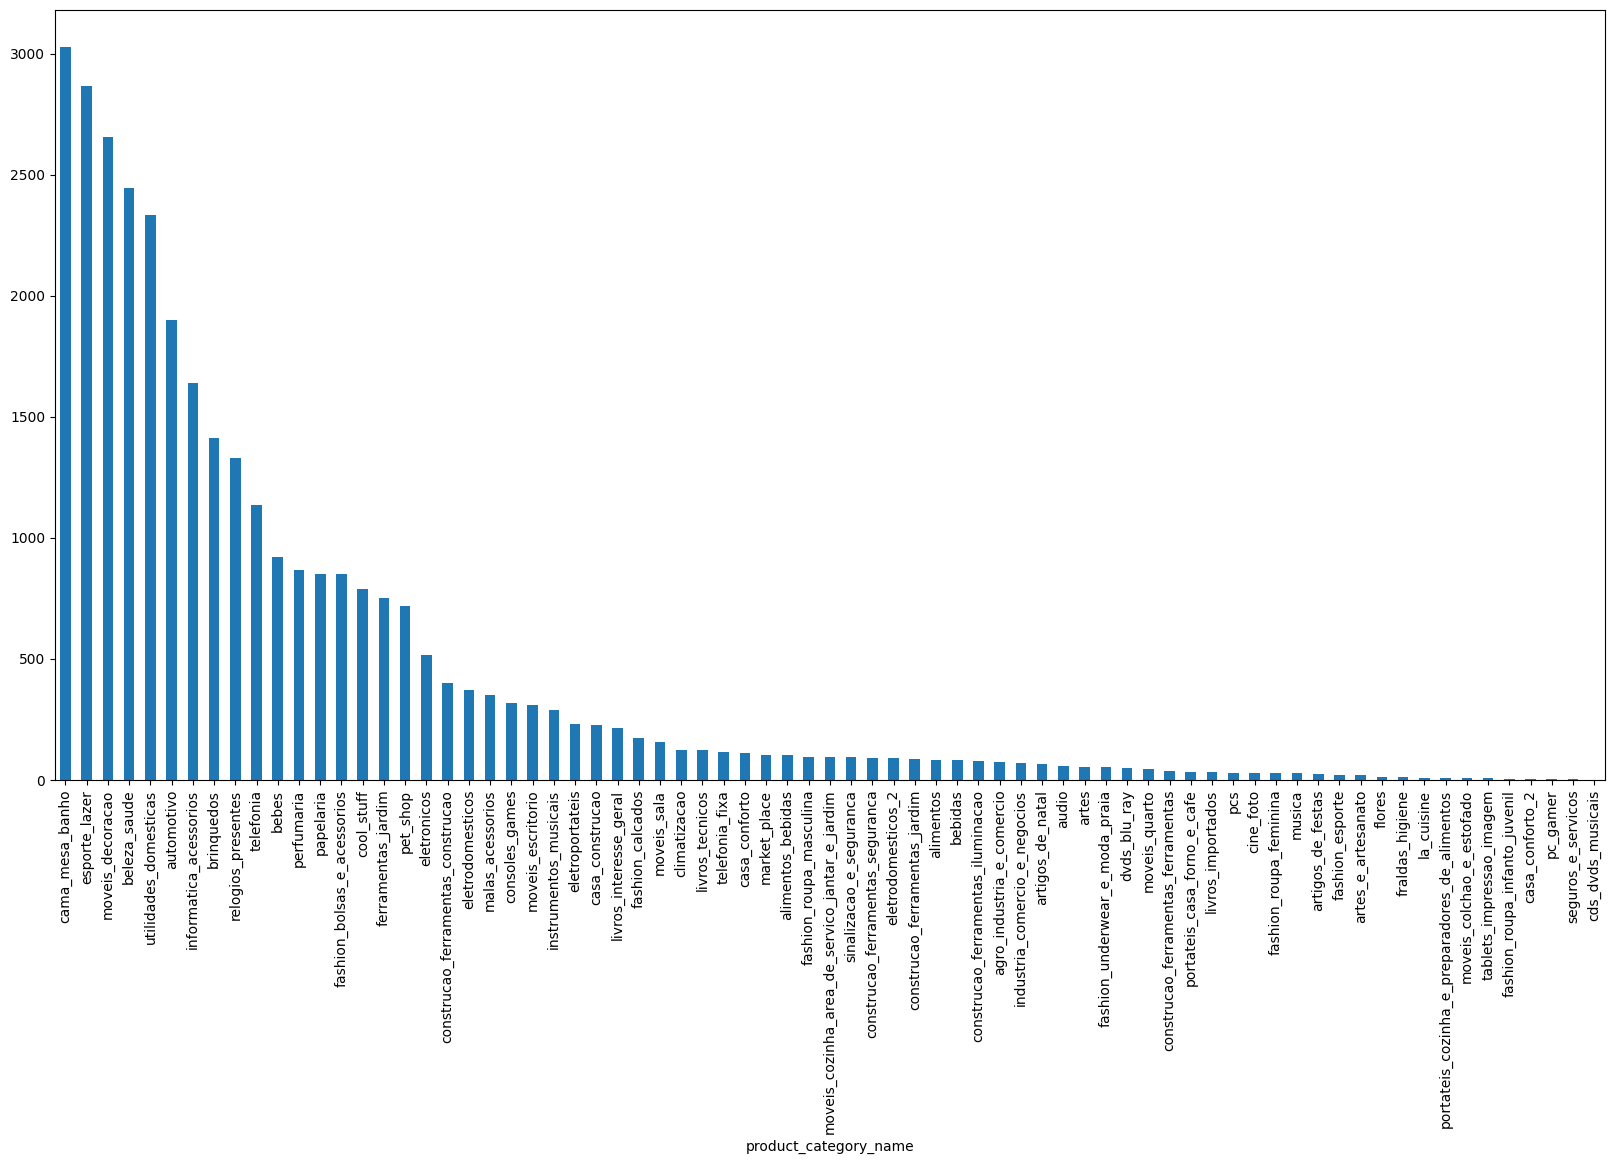

In [ ]:
#quickly checking the categories
products['product_category_name'].value_counts().plot(kind='bar', figsize=(20, 10),)

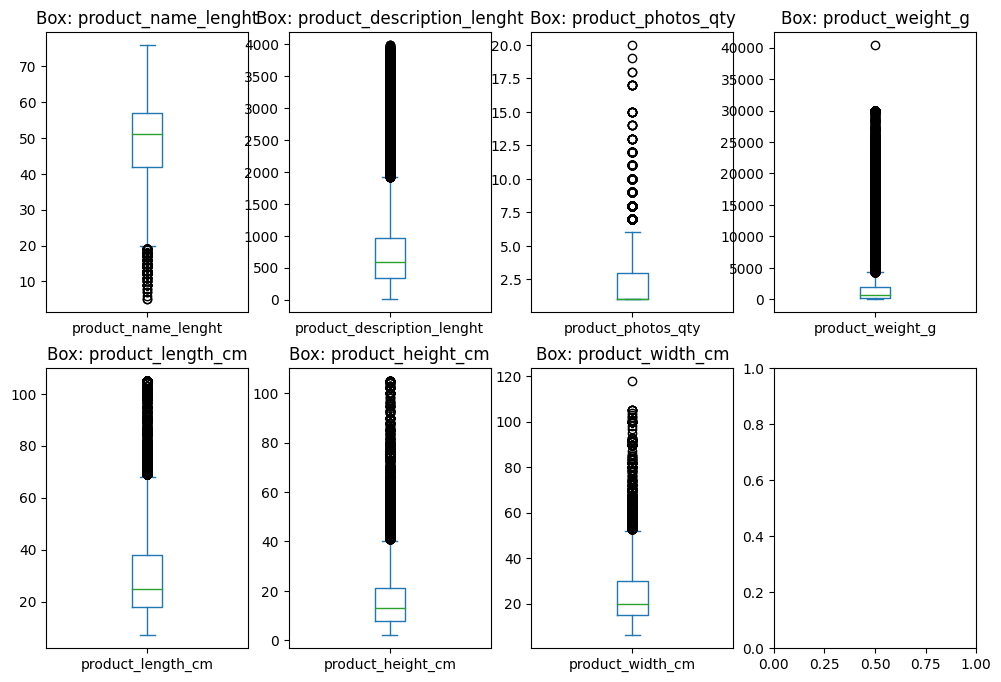

In [ ]:
# making box plots for all the numeric columns
fig, axes= plt.subplots(2,4, figsize=(12,8))
numeric=products.select_dtypes(include=np.number).columns
for i, val in enumerate(numeric):
    products[val].plot.box(title=f'Box: {val}', ax=axes.flat[i])


- Dùng giá trị mdeian để tính toán giá trị ngoại lai

In [ ]:
#separating the missing values and known values
missing=products[products['product_category_name'].isnull()]
all_values= products[products['product_category_name'].notnull()]

#getting the column names for 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
col=missing.columns[5:]

In [ ]:
col

Index(['product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

In [ ]:
#checking for match and saving the index and values in a dictionary
match=dict()
for i in missing.index:
    if ((all_values.iloc[:, 5]==missing.loc[i, col[0]]) & (all_values.iloc[:, 6]==missing.loc[i, col[1]]) & (all_values.iloc[:, 7]==missing.loc[i, col[2]]) & (all_values.iloc[:, 8]==missing.loc[i, col[3]])).sum()>0:
        #saving the product category which is most occuring
        match[i]=all_values[(all_values.iloc[:, 5]==missing.loc[i, col[0]]) & (all_values.iloc[:, 6]==missing.loc[i, col[1]]) & (all_values.iloc[:, 7]==missing.loc[i, col[2]]) & (all_values.iloc[:, 8]==missing.loc[i, col[3]])]['product_category_name'].value_counts().head(1).index
    else:
        match[i]='empty'

In [ ]:
#imputing the missing values
for i in match.keys():
    if match[i]!='empty':
        #where there is a match we are filling the value with median of columns for the category we are assigning
        products.loc[i, 'product_category_name']=match[i][0]
        products.loc[i, 'product_name_lenght']=round(products[products['product_category_name']== match[i][0]]['product_name_lenght'].median())
        products.loc[i, 'product_description_lenght']=round(products[products['product_category_name']== match[i][0]]['product_description_lenght'].median())
        products.loc[i, 'product_photos_qty']=round(products[products['product_category_name']== match[i][0]]['product_photos_qty'].median())
    else:
        #for no match we are filling with other
        products.loc[i, 'product_category_name']='Other'
        products.loc[i, 'product_name_lenght']=round(products['product_name_lenght'].median())
        products.loc[i, 'product_description_lenght']=round(products['product_description_lenght'].median())
        products.loc[i, 'product_photos_qty']=round(products['product_photos_qty'].median())

products['product_weight_g']=products['product_weight_g'].fillna(round(products['product_weight_g'].mean()))
products['product_length_cm']=products['product_length_cm'].fillna(round(products['product_length_cm'].mean()))
products['product_height_cm']=products['product_height_cm'].fillna(round(products['product_height_cm'].mean()))
products['product_width_cm']=products['product_width_cm'].fillna(round(products['product_width_cm'].mean()))

In [ ]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### 3.1.6. Review dataset

<a id = 'review_dataset' ></a>

In [ ]:
#reading head and tail of the review dataframe
sm_reviews= dataframes['order_reviews']
reviews = sm_reviews.copy()
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
reviews.tail()

review_id                          order_id  \
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49

In [ ]:
#getting overview of datasets that we have.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
#checking the null values
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
reviews.isnull().sum().sum()

145903

In [ ]:
#checking duplicates across rows
reviews.duplicated().sum()

0

In [ ]:
#checking duplicates across columns
reviews.T.duplicated().sum()

0

In [ ]:
#checking the unique values in column unique id and customer id
reviews['review_id'].nunique()

98410

In [ ]:
reviews.shape[0]-reviews['review_id'].nunique()

814

In [ ]:
reviews['order_id'].nunique()

98673

In [ ]:
98673-98410

263

- Tập dữ liệu đánh giá có thông tin về các đánh giá được đưa ra bởi khách hàng. Nó bao gồm điểm đánh giá, nhận xét, ngày tạo đánh giá và dấu thời gian gửi đánh giá.
- **Chúng tôi có tổng cộng 99224 id đánh giá trong đó 98410 là id đánh giá duy nhất. Nó có nghĩa là có 814 đánh giá đã được gửi lại. Đây là những vấn đề cần được giải quyết.**
- **Chúng tôi có 98673 id đơn hàng duy nhất và 98410 id đánh giá duy nhất. Điều đó có nghĩa là có 263 đánh giá có cùng mã đơn hàng. Có thể những đánh giá này dành cho các sản phẩm khác nhau được đặt hàng theo cùng một mã đơn hàng.**
- Tập dữ liệu này có **sáu** cột kiểu dữ liệu đối tượng và **một** cột kiểu dữ liệu số.
- Không có sự trùng lặp giữa các hàng và cột.
- Có 145903 giá trị null.

### 3.1.7. Product_eng dataset

<a id = 'eng_dataset' ></a>

In [ ]:
#reading head and tail of the customer dataframe
sm_translation = dataframes['product_category']
product_eng = sm_translation.copy()
product_eng.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
product_eng.tail()

product_category_name product_category_name_english
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

In [ ]:
#getting overview of datasets that we have.
product_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
#checking the null values
product_eng.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
#checking duplicates across rows
product_eng.duplicated().sum()

0

In [ ]:
#checking duplicates across columns
product_eng.T.duplicated().sum()

0

#### Merging Product_eng with products

Join danh mục sản phẩm với tên tiếng Anh của sản phẩm và bỏ tên danh mục sản phẩm ban đầu có tên bằng tiếng Bồ Đào Nha.

In [ ]:
products_final=pd.merge(left=products, right=product_eng, on='product_category_name', how='left')

In [ ]:
products_final.isnull().sum()

product_id                         0
product_category_name              0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
product_category_name_english    406
dtype: int64

In [ ]:
#checking the categores where we don't have english name
products_final[products_final['product_category_name_english'].isnull()]['product_category_name'].value_counts()

product_category_name
Other                                            393
portateis_cozinha_e_preparadores_de_alimentos     10
pc_gamer                                           3
Name: count, dtype: int64

In [ ]:
products_final.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0               40.000                     287.000               1.000   
1               44.000                     276.000               1.000   
2               46.000                     250.000               1.000   
3               27.000                     261.000               1.000   
4               37.000                     402.000               4.000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0           225.000             16.000             10.000            14.000   
1          1000.000             30.000             18.000            20.000   
2           154.000             18.000              9.000            15.000   
3           371.000             26.000              4.000            26.000   
4           625.000             20.000             17.000            13.000   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares


**portateis cozinha e preparadores de alimentos** : kitchen and food preparation racks <br/>
**Pc gamer** : PC games

In [ ]:
#filling english name of three categories.
products_final.loc[products_final['product_category_name']=='Other', 'product_category_name_english']='Other'
products_final.loc[products_final['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english']='kitchen_and_food_preparation_racks'
products_final.loc[products_final['product_category_name']=='pc_gamer', 'product_category_name_english']='PC_games'

In [ ]:
products_final.isnull().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [ ]:
#dropping the original product category name which is in portugese
products_final.drop(columns=['product_category_name'], inplace=True)

In [ ]:
#Saving the final dataset to csv
products_final.to_csv('/content/sample_data/data_cleaning/product_cleaned.csv', index=False)
orders.to_csv('/content/sample_data/data_cleaning/order_cleaned.csv', index=False)

### 3.1.8. Joining all the tables

<a id = 'joining_tables' ></a>

join the order_items and then the products dataset.

In [ ]:
#loading the cleaned orders dataset.
order_fin=pd.read_csv('/content/sample_data/data_cleaning/order_cleaned.csv')

Merging Orders and Order_items

In [ ]:
#We already have our orders_items data set loaded. Let us join the order_items to order_fin
order_comp= pd.merge(left=order_fin, right= order_items, on= 'order_id', how='inner')

In [ ]:
#basic overview
order_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_estimated_delivery_date  112650 non-null  object 
 5   order_item_id                  112650 non-null  int64  
 6   product_id                     112650 non-null  object 
 7   seller_id                      112650 non-null  object 
 8   shipping_limit_date            112650 non-null  object 
 9   price                          112650 non-null  float64
 10  freight_value                  112650 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 9.5+ MB


Merging Products table with Order_comp

In [ ]:
#loading the final product dataset.
product_fin=pd.read_csv('/content/sample_data/data_cleaning/product_cleaned.csv')

In [ ]:
#let us join it with order_comp
Order_cons=pd.merge(left=order_comp, right=product_fin, on='product_id', how='inner')

In [ ]:
#basic overview
Order_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_estimated_delivery_date  112650 non-null  object 
 5   order_item_id                  112650 non-null  int64  
 6   product_id                     112650 non-null  object 
 7   seller_id                      112650 non-null  object 
 8   shipping_limit_date            112650 non-null  object 
 9   price                          112650 non-null  float64
 10  freight_value                  112650 non-null  float64
 11  product_name_lenght            112650 non-null  float64
 12  product_description_lenght    

Merging Sellers datset with the Order_cons

In [ ]:
#load the cleaned seller data form cap_data\seller_loc_cleaned_dataset.csv
seller_fin= pd.read_csv('/content/sample_data/data_cleaning/seller_cleaned.csv')

In [ ]:
#merge the data
order_with_seller=pd.merge(left=Order_cons, right=seller_fin, on='seller_id', how='left')

In [ ]:
order_with_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_estimated_delivery_date  112650 non-null  object 
 5   order_item_id                  112650 non-null  int64  
 6   product_id                     112650 non-null  object 
 7   seller_id                      112650 non-null  object 
 8   shipping_limit_date            112650 non-null  object 
 9   price                          112650 non-null  float64
 10  freight_value                  112650 non-null  float64
 11  product_name_lenght            112650 non-null  float64
 12  product_description_lenght    

Merging Customer dataset

In [ ]:
customer_fin=pd.read_csv('/content/sample_data/data_cleaning/customer_cleaned.csv')

In [ ]:
#merging the data
order_with_customer=pd.merge(left=order_with_seller, right=customer_fin, on='customer_id', how='left')

In [ ]:
order_with_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_estimated_delivery_date  112650 non-null  object 
 5   order_item_id                  112650 non-null  int64  
 6   product_id                     112650 non-null  object 
 7   seller_id                      112650 non-null  object 
 8   shipping_limit_date            112650 non-null  object 
 9   price                          112650 non-null  float64
 10  freight_value                  112650 non-null  float64
 11  product_name_lenght            112650 non-null  float64
 12  product_description_lenght    

Merging the Reviews dataset

In [ ]:
#merging the review dataset
olist_cons=pd.merge(left=order_with_customer, right=reviews, on='order_id', how='inner')

In [ ]:
olist_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112372 non-null  object 
 1   customer_id                    112372 non-null  object 
 2   order_status                   112372 non-null  object 
 3   order_purchase_timestamp       112372 non-null  object 
 4   order_estimated_delivery_date  112372 non-null  object 
 5   order_item_id                  112372 non-null  int64  
 6   product_id                     112372 non-null  object 
 7   seller_id                      112372 non-null  object 
 8   shipping_limit_date            112372 non-null  object 
 9   price                          112372 non-null  float64
 10  freight_value                  112372 non-null  float64
 11  product_name_lenght            112372 non-null  float64
 12  product_description_lenght    

In [ ]:
olist_cons.to_csv('/content/sample_data/data_cleaning/master_data.csv')

## 3.2. Data cleaning

### Checking data



> Shape and Cardinality



In [ ]:
model_1 = olist_cons.copy()
model_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112372 non-null  object 
 1   customer_id                    112372 non-null  object 
 2   order_status                   112372 non-null  object 
 3   order_purchase_timestamp       112372 non-null  object 
 4   order_estimated_delivery_date  112372 non-null  object 
 5   order_item_id                  112372 non-null  int64  
 6   product_id                     112372 non-null  object 
 7   seller_id                      112372 non-null  object 
 8   shipping_limit_date            112372 non-null  object 
 9   price                          112372 non-null  float64
 10  freight_value                  112372 non-null  float64
 11  product_name_lenght            112372 non-null  float64
 12  product_description_lenght    

In [ ]:
for col in model_1.columns:
 print(f"{col}: {model_1[col].nunique()}")
print("------------------------------------")
# Print top 7 unique values of all the columns with ascending order of cardinality
for col in model_1.columns:
 if model_1[col].nunique() < 10:
  print(f"{col}: {model_1[col].unique()}")


order_id: 97917
customer_id: 97917
order_status: 7
order_purchase_timestamp: 97371
order_estimated_delivery_date: 450
order_item_id: 21
product_id: 32789
seller_id: 3090
shipping_limit_date: 92643
price: 5948
freight_value: 6976
product_name_lenght: 66
product_description_lenght: 2958
product_photos_qty: 19
product_weight_g: 2201
product_length_cm: 99
product_height_cm: 102
product_width_cm: 95
product_category_name_english: 74
seller_zip_code_prefix: 2245
seller_city: 611
seller_state: 23
seller_lat: 2244
seller_lng: 2244
customer_unique_id: 94721
customer_zip_code_prefix: 14955
customer_city: 4108
customer_state: 27
customer_lat: 14849
customer_lng: 14849
review_id: 97709
review_score: 5
review_comment_title: 4497
review_comment_message: 35692
review_creation_date: 633
review_answer_timestamp: 97547
------------------------------------
order_status: ['delivered' 'shipped' 'invoiced' 'canceled' 'processing' 'unavailable'
 'approved']
review_score: [4 5 3 1 2]



> Missing value and duplicate row




In [ ]:
#checking for missing values
model_1.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
product_category_name_english        0
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
seller_lat                           0
seller_lng                           0
customer_unique_id                   0
customer_zip_code_prefix 

In [ ]:
#checking for duplicate values
model_1.duplicated().sum()

0

In [ ]:
#dropping not needed column.
olist_cons.drop(columns=['review_comment_title','review_comment_message'], inplace=True)

In [ ]:
#this is the final dataset with only delivered orders.
model_1=model_1.loc[olist_cons['order_status']=='delivered']

In [ ]:
model_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110013 entries, 0 to 112371
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_status                   110013 non-null  object 
 3   order_purchase_timestamp       110013 non-null  object 
 4   order_estimated_delivery_date  110013 non-null  object 
 5   order_item_id                  110013 non-null  int64  
 6   product_id                     110013 non-null  object 
 7   seller_id                      110013 non-null  object 
 8   shipping_limit_date            110013 non-null  object 
 9   price                          110013 non-null  float64
 10  freight_value                  110013 non-null  float64
 11  product_name_lenght            110013 non-null  float64
 12  product_description_lenght     1100



###Removing few more columns





In [ ]:
#removing the redundant columns from the final dataset
model_1=model_1.drop(columns=['order_status', 'seller_zip_code_prefix', 'customer_zip_code_prefix', 'review_creation_date', 'review_answer_timestamp'])

In [ ]:
#checking info
model_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110013 entries, 0 to 112371
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_purchase_timestamp       110013 non-null  object 
 3   order_estimated_delivery_date  110013 non-null  object 
 4   order_item_id                  110013 non-null  int64  
 5   product_id                     110013 non-null  object 
 6   seller_id                      110013 non-null  object 
 7   shipping_limit_date            110013 non-null  object 
 8   price                          110013 non-null  float64
 9   freight_value                  110013 non-null  float64
 10  product_name_lenght            110013 non-null  float64
 11  product_description_lenght     110013 non-null  float64
 12  product_photos_qty             1100



> Đổi tên order_item_id thành 'qty' vì nó cho  biết về số lượng mặt hàng đã mua



In [ ]:
#rename the order_item_id to qty as it hold the quantity of items in each category.
model_1.rename(columns = {'order_item_id':'qty' }, inplace = True)

In [ ]:
#removing another column
model_1.drop(columns='review_id', inplace=True)

### Feature egineering


> Creating column revenue



In [ ]:
#creating column total_amount
model_1['total_amount']=model_1['qty']*model_1['price']

In [ ]:
model_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110013 entries, 0 to 112371
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_purchase_timestamp       110013 non-null  object 
 3   order_estimated_delivery_date  110013 non-null  object 
 4   qty                            110013 non-null  int64  
 5   product_id                     110013 non-null  object 
 6   seller_id                      110013 non-null  object 
 7   shipping_limit_date            110013 non-null  object 
 8   price                          110013 non-null  float64
 9   freight_value                  110013 non-null  float64
 10  product_name_lenght            110013 non-null  float64
 11  product_description_lenght     110013 non-null  float64
 12  product_photos_qty             1100

 **Chuyển đổi kiểu dữ liệu**
> the 'order_purchase_timestamp' has incorrect format. We will start with converting this column to date-time format and we will try to extract some features from dates for analysis.





In [ ]:
#converting date columns which are in object format to datetime format
model_1['order_purchase_timestamp']=pd.to_datetime(model_1['order_purchase_timestamp'])

In [ ]:
#converting date columns which are in object format to datetime format
model_1['purchase_year']=pd.to_datetime(model_1['order_purchase_timestamp']).dt.year
model_1['purchase_month']=pd.to_datetime(model_1['order_purchase_timestamp']).dt.month
model_1['purchase_MMYYYY']=pd.to_datetime(model_1['order_purchase_timestamp']).dt.strftime('%m-%Y')
model_1['purchase_week']=pd.to_datetime(model_1['order_purchase_timestamp']).dt.isocalendar().week
model_1['purchase_dayofweek']=pd.to_datetime(model_1['order_purchase_timestamp']).dt.weekday
model_1['purchase_dayofmonth']=pd.to_datetime(model_1['order_purchase_timestamp']).dt.day



> **aggregate the revenue by dates so that we can get a time series**



In [ ]:
# Creating new DataFrame with daily frequency and number of orders
df_revenue = model_1.groupby(pd.Grouper(key='order_purchase_timestamp', freq='D'))['total_amount'].sum().reset_index()
df_revenue.set_index('order_purchase_timestamp', inplace=True)

df_revenue.index.freq = 'D' # To keep pandas inference in check!
df_revenue = df_revenue.rename_axis('date')
df_revenue.rename(columns={'total_amount': 'revenue'}, inplace=True)
#reading top five rows
print(df_revenue.head())

# checking the mean, max and count values.
print(df_revenue.describe())

            revenue
date               
2016-09-15  269.940
2016-09-16    0.000
2016-09-17    0.000
2016-09-18    0.000
2016-09-19    0.000
         revenue
count    714.000
mean   20881.443
std    16038.400
min        0.000
25%     9275.570
50%    19772.815
75%    30819.713
max   184834.170


In [ ]:
#checking the info
df_revenue

revenue
date                
2016-09-15   269.940
2016-09-16     0.000
2016-09-17     0.000
2016-09-18     0.000
2016-09-19     0.000
...              ...
2018-08-25 10891.400
2018-08-26  8526.190
2018-08-27  5542.900
2018-08-28  4088.370
2018-08-29  2670.540

[714 rows x 1 columns]

In [ ]:
df_revenue

revenue
date                
2016-09-15   269.940
2016-09-16     0.000
2016-09-17     0.000
2016-09-18     0.000
2016-09-19     0.000
...              ...
2018-08-25 10891.400
2018-08-26  8526.190
2018-08-27  5542.900
2018-08-28  4088.370
2018-08-29  2670.540

[714 rows x 1 columns]

In [ ]:
#checking head
df_revenue.head()

revenue
date               
2016-09-15  269.940
2016-09-16    0.000
2016-09-17    0.000
2016-09-18    0.000
2016-09-19    0.000

In [ ]:
#checking head
df_revenue.count()

revenue    714
dtype: int64



> 714 observations 2016-09-15	to 2018-08-29



In [ ]:
model_1.to_csv('/content/sample_data/data_cleaning/master_dataset.csv', index=False)

## 3.3. Scraping holiday data

<a id = 'scraping' ></a>

Nhóm thực hiện thu thập thông tin các ngày lễ Ngày lễ Quốc gia Brazil từ trang web này: https://www.officeholidays.com/countries/brazil/ để giúp mô hình hiểu được tác động của các ngày lễ.


In [ ]:
# For web scraping (the requests package allows you to send HTTP requests using Python)
import requests
from bs4 import BeautifulSoup

# For performing regex operations
import re

# For adding delays so that we don't spam requests
import time

In [ ]:
#define empty dictionary to save content
content={}

#scaping holiday information for pages 2017 and 2018
for i in [2017, 2018]:
    url = 'https://www.officeholidays.com/countries/brazil/'
    url = url+str(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    content[i]=soup.find_all('time')

In [ ]:
#extracting Holiday information from the scarpped data
#empty list
holidays=[]
for key in content:
    dict_size=len(content[key])
    dict_val=content[key]
    for j in range(0,dict_size):
        holidays.append(dict_val[j].attrs['datetime'])

In [ ]:
#creating a dataframe for the holiday information

holidays_df=pd.DataFrame(index=[holidays], data=np.ones(len(holidays)), columns=['is_holiday'])

In [ ]:
holidays_df.head()

is_holiday
2017-01-01       1.000
2017-02-27       1.000
2017-02-28       1.000
2017-03-01       1.000
2017-04-14       1.000

In [ ]:
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, ('2017-01-01',) to ('2018-12-25',)
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   is_holiday  36 non-null     float64
dtypes: float64(1)
memory usage: 1.7+ KB


Khung dữ liệu này chỉ có một cột 'is_holiday', có nghĩa là ngày lễ. Chỉ số là những ngày nghỉ lễ.


In [ ]:
#saving the holiday dataframe as csv file
holidays_df.to_csv('/content/sample_data/data_cleaning/holiday.csv')

In [ ]:
sm_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#4.EDA


##4.1.Import data

In [ ]:
import pandas as pd

# Đường dẫn đến tệp CSV
csv_path = '/content/sample_data/data_cleaning/master_dataset.csv'

# Đọc tệp CSV thành DataFrame
master_data = pd.read_csv(csv_path)

# Hiển thị dữ liệu
display(master_data.head())  # In ra vài dòng đầu tiên để xem dữ liệu


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_purchase_timestamp order_estimated_delivery_date  qty  \
0      2017-10-02 10:56:33                    2017-10-18    1   
1      2017-08-15 18:29:31                    2017-08-28    1   
2      2017-08-02 18:24:47                    2017-08-15    1   
3      2017-10-23 23:26:46                    2017-11-13    1   
4      2018-07-24 20:41:37                    2018-08-13    1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   

   shipping_limit_date   price  freight_value  product_name_lenght  \
0  2017-10-06 11:07:15  29.990          8.720               40.000   
1  2017-08-21 20:05:16  29.990          7.780               40.000   
2  2017-08-08 18:37:31  29.990          7.780               40.000   
3  2017-10-31 02:14:11  29.990         14.100               40.000   
4  2018-07-30 03:24:27 118.700         22.760               29.000   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                     268.000               4.000           500.000   
1                     268.000               4.000           500.000   
2                     268.000               4.000           500.000   
3                     268.000               4.000           500.000   
4                     178.000               1.000           400.000   

   product_length_cm  product_height_cm  product_width_cm  \
0             19.000              8.000            13.000   
1             19.000              8.000            13.000   
2             19.000              8.000            13.000   
3             19.000              8.000            13.000   
4             19.000             13.000            19.000   

  product_category_name_english     seller_city seller_state  seller_lat  \
0                    housewares            maua           SP     -23.681   
1                    housewares            maua           SP     -23.681   
2                    housewares            maua           SP     -23.681   
3                    housewares            maua           SP     -23.681   
4                     perfumery  belo horizonte           SP     -19.808   

   seller_lng                customer_unique_id  customer_city customer_state  \
0     -46.444  7c396fd4830fd04220f754e42b4e5bff      sao paulo             SP   
1     -46.444  3a51803cc0d012c3b5dc8b7528cb05f7      sao paulo             SP   
2     -46.444  ef0996a1a279c26e7ecbd737be23d235      sao paulo             SP   
3     -46.444  e781fdcc107d13d865fc7698711cc572  florianopolis             SC   
4     -43.981  af07308b275d755c9edb36a90c618231      barreiras             BA   

   customer_lat  customer_lng  review_score review_comment_title  \
0       -23.577       -46.587             4                  NaN   
1       -23.565       -46.534             4                  NaN   
2       -23.600       -46.655             5                  NaN   
3       -27.547       -48.498             3                  NaN   
4       -12.187       -44.540             4     Muito boa a loja   

                              review_comment_message  total_amount  \
0  Não testei o produto ainda, mas ele veio corre...        29.990   
1  Deveriam embalar melhor o produto. A caixa vei.

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110013 entries, 0 to 110012
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_purchase_timestamp       110013 non-null  object 
 3   order_estimated_delivery_date  110013 non-null  object 
 4   qty                            110013 non-null  int64  
 5   product_id                     110013 non-null  object 
 6   seller_id                      110013 non-null  object 
 7   shipping_limit_date            110013 non-null  object 
 8   price                          110013 non-null  float64
 9   freight_value                  110013 non-null  float64
 10  product_name_lenght            110013 non-null  float64
 11  product_description_lenght     110013 non-null  float64
 12  product_photos_qty            

##4.2.Univariate analysis

###Price

In [ ]:
# Xóa các sản phẩm trùng lặp để chỉ giữ mỗi sản phẩm một lần
unique_products = master_data.drop_duplicates(subset=['product_id'])

# Tạo biểu đồ phân bố giá với sự tương tác
fig = px.histogram(unique_products, x='price', nbins=50, marginal='rug', title='Price Distribution for Unique Products')

# Cập nhật nhãn và tiêu đề
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Frequency"
)

# Hiển thị biểu đồ tương tác
fig.show()

# Tính giá trị trung bình của phân bố giá
average_price = unique_products['price'].mean()

print("Giá trị trung bình của phân bố giá là:", average_price)

Giá trị trung bình của phân bố giá là: 144.12384416313296


###Review score

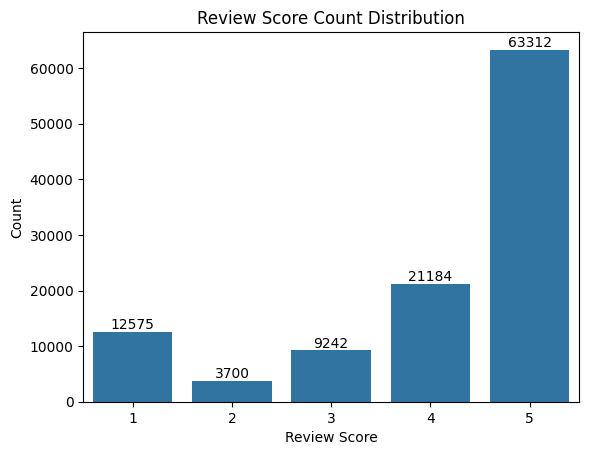

In [ ]:

# Vẽ biểu đồ đếm theo 'review_score'
ax = sns.countplot(data=master_data, x='review_score')  # Tạo biểu đồ

# Thiết lập tiêu đề và nhãn trục
plt.title('Review Score Count Distribution')  # Tiêu đề
plt.xlabel('Review Score')  # Nhãn trục x
plt.ylabel('Count')  # Nhãn trục y

# Thêm số lên đầu cột
for p in ax.patches:  # Vòng lặp qua các cột trong biểu đồ
    ax.annotate(
        f'{int(p.get_height())}',  # Chuyển chiều cao thành số nguyên
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí annotation
        ha='center',  # Căn giữa theo chiều ngang
        va='center',  # Căn giữa theo chiều dọc
        xytext=(0, 5),  # Khoảng cách so với vị trí gốc
        textcoords='offset points'  # Định dạng tọa độ
    )

# Hiển thị biểu đồ
plt.show()  # Hiển thị biểu đồ với các annotation



###Total amout

In [ ]:
import plotly.express as px

# Tạo biểu đồ phân bố với sự tương tác
fig = px.histogram(master_data, x='total_amount', marginal='box', title='Revenue Distribution')

# Cập nhật nhãn và tiêu đề
fig.update_layout(
    xaxis_title="Total Amount",
    yaxis_title="Frequency"
)

# Hiển thị biểu đồ tương tác
fig.show()

###Which year, month, day sells the most?

In [ ]:

import plotly.subplots as sp

# Biểu đồ 1: Purchases by Year bằng Plotly (thay vì Seaborn)
year_distribution = master_data['purchase_year'].value_counts().sort_index()

trace_year = px.bar(
    x=year_distribution.index,
    y=year_distribution.values,
    labels={'x': 'Year', 'y': 'Count'},
    title='Purchases by Year',
).data[0]

# Tạo bố cục với 3 biểu đồ trên cùng một hàng ngang
fig = sp.make_subplots(
    rows=1, cols=3, subplot_titles=['Purchases by Year', 'Purchases by Month', 'Purchases by Day'],
    horizontal_spacing=0.1
)

# Thêm biểu đồ 1 vào bố cục Plotly
fig.add_trace(trace_year, row=1, col=1)

# Biểu đồ 2: Purchases by Month
month_distribution = master_data['purchase_month'].value_counts().sort_index()

trace_month = px.line(
    x=month_distribution.index,
    y=month_distribution.values,
    labels={'x': 'Month', 'y': 'Count'},
    markers=True
).data[0]

fig.add_trace(trace_month, row=1, col=2)

# Biểu đồ 3: Purchases by Day of Month
day_distribution = master_data['purchase_dayofmonth'].value_counts().sort_index()

trace_day = px.line(
    x=day_distribution.index,
    y=day_distribution.values,
    labels={'x': 'Day', 'y': 'Count'},
    markers=True
).data[0]

fig.add_trace(trace_day, row=1, col=3)

# Cập nhật bố cục để giữ cho các biểu đồ nằm trên cùng một hàng ngang
fig.update_layout(
    width=1600,  # Chiều rộng tổng thể
    height=400,  # Chiều cao tổng thể
    showlegend=False,  # Không hiển thị chú thích
    plot_bgcolor='white',  # Nền trắng
    paper_bgcolor='white',  # Nền trắng
    title_x=0.5,  # Tiêu đề ở giữa
)

# Hiển thị bố cục subplot
fig.show()

##4.3.Bivariate analysis

###Total revenue frequency by day for 2016 to 2018

In [ ]:
import plotly.express as px

# Tạo biểu đồ histogram
fig = px.histogram(df_revenue, x='revenue')

# Tùy chỉnh biểu đồ
fig.update_layout(
    yaxis_title="Frequency",
    xaxis_title="Revenue in Brazilian Real",
    legend_title="",
    title="Daily Revenue distribution from Sept 2016 to Aug 2018"
)

# Hiển thị biểu đồ
fig.show()

There is a peak on the chart at the zero value, which occurs because there is no revenue data for most of the days in 2016. In other words, during this period, many days had no transactions or revenue figures.

###Line chart showing total daily revenue from 2016 to 2018

In [ ]:

# Vẽ đồ thị dạng đường để có cái nhìn tổng thể về doanh thu hàng ngày
fig = px.line(df_revenue, x=df_revenue.index, y='revenue')

# Thiết lập nhãn trục và tiêu đề
fig.update_layout(
    yaxis_title="Total Revenue earned (Brazilian Real)",
    legend_title="",
    title="Daily Revenue from Sept 2016 to Aug 2018"
)

# Kích hoạt thanh trượt trên trục x
fig.update_xaxes(rangeslider_visible=True)

# Chú thích điểm cao nhất
fig.add_annotation(
    x='2017-11-24',
    y=184834.17,
    text='Black Friday Sale',
    yanchor='bottom',
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=-20,
    ay=-30,
    font=dict(size=15, color="green", family="Courier New, monospace"),
    align="left",
    bordercolor="green",
    borderwidth=2,
    bgcolor="#CFECEC",
    opacity=0.8
)

# Hiển thị biểu đồ
fig.show()


Based on the observations, the sales data shows a generally positive trend. However, there was almost no sales activity from October 10, 2016, to January 2017, suggesting that this period might have been during an initial test phase. It appears that the business really started to gain momentum from January 1, 2017.

The data also highlights some notable peaks. The highest spike occurred on November 24, 2017, likely due to Black Friday. There's another noticeable spike on September 29, 2017, although the reason for this spike isn't immediately clear. At this point, it's difficult to identify any distinct seasonality in the sales data.

###Revenue patterns by day of the week.

In [ ]:
#removing the rows before Jan 01 2017
daily_data=df_revenue.loc[df_revenue.index>='2017-01-01', :]
daily_data.tail()

revenue
date                
2018-08-25 10891.400
2018-08-26  8526.190
2018-08-27  5542.900
2018-08-28  4088.370
2018-08-29  2670.540

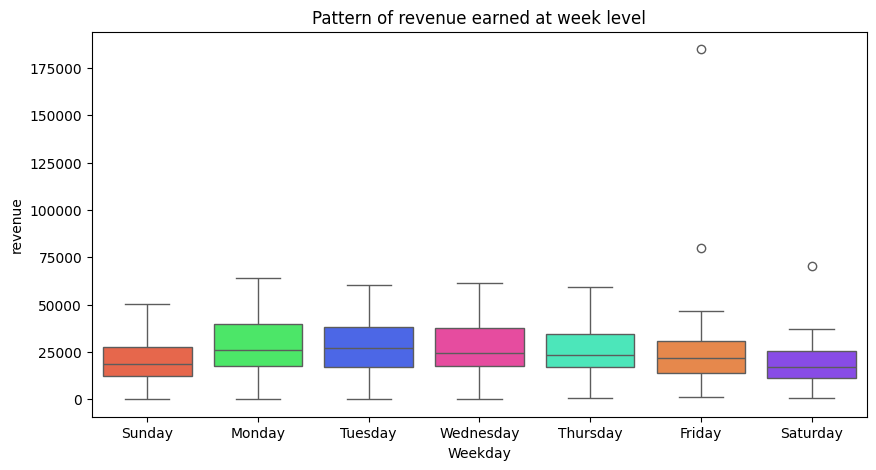

In [ ]:
# Set figure size
plt.subplots(figsize=(10, 5))

# Title for the plot
plt.title('Pattern of revenue earned at week level')

# Copying data and extracting weekday
df_week_check = daily_data.copy()
df_week_check['Weekday'] = df_week_check.index.weekday
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_week_check['Weekday'] = df_week_check['Weekday'].apply(lambda x: week_day[x])

# Custom palette for different colors for each day
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFC5', '#FF8333', '#8333FF']

# Create boxplot with custom colors
sns.boxplot(data=df_week_check, x='Weekday', y='revenue', palette=colors)

# Show the plot
plt.show()

The revenue data indicates a pattern where earnings are higher at the beginning of the week, particularly on Mondays and Tuesdays. As the week progresses, the revenue tends to decline, reaching its lowest point towards the weekend. However, there are occasional spikes on Fridays and Saturdays, likely due to holidays or other special events.

In [ ]:
# Tính tổng doanh thu theo tuần trong năm và theo ngày trong tháng
df1 = master_data.groupby('purchase_week')['total_amount'].sum()
df2 = master_data.groupby('purchase_dayofmonth')['total_amount'].sum()

# Tạo các ô phụ để hiển thị doanh thu theo tuần và theo ngày trong tháng
fig = make_subplots(rows=1, cols=2, subplot_titles=("Revenue by weeks", "Revenue by days of month"))

# Thêm dữ liệu vào ô phụ đầu tiên (doanh thu theo tuần)
fig.add_trace(go.Scatter(name='Weekly', x=df1.index, y=df1.values), row=1, col=1)

# Thêm dữ liệu vào ô phụ thứ hai (doanh thu theo ngày trong tháng)
fig.add_trace(go.Scatter(name='Monthly', x=df2.index, y=df2.values), row=1, col=2)

# Cập nhật các thiết lập và hiển thị biểu đồ
fig.update_layout(
    height=500,
    width=1000,
    title_text="Understanding patterns of revenue earned at weekly and monthly level"
)

# Hiển thị biểu đồ
fig.show()

###Revenue by product category


In [ ]:
# Các danh mục sản phẩm có doanh thu cao nhất
df = master_data.groupby('product_category_name_english')['total_amount'].sum().sort_values(ascending=False)

# Tạo biểu đồ thanh để hiển thị doanh thu theo danh mục sản phẩm
fig = px.bar(
    df,
    x=df.index,
    y=df.values,
    labels={'y': 'Sales amount'},
    title='Product Category by sales amount',
    width=1500,
    height=700
)

# Cập nhật góc của nhãn trục x
fig.update_xaxes(tickangle=-90)

# Hiển thị biểu đồ mà không cần sử dụng định dạng SVG
fig.show()



The top product categories by sales amount are health and beauty, watches and gifts, bed, bath and table, computer accessories, and sports and leisure. On the other hand, the categories with the lowest earnings are PC games, CDs/DVDs/musicals, and fashion for children's clothing.
Removing the data before Jan 01 2017 because there are a lot of consecutive days with zero sales. It may be because the period of Sept 2016 to Dec 2016 was an experimental phase. Including them in our model may impact our forecasting. We can find that we have continuous sales after Jan 2017.

### Bar plot to display average rating by product category.

In [ ]:
df = master_data.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)

fig = px.bar(
    df,
    x=df.index,
    y=df.values,
    labels={'y': 'Average Rating'},
    title='Product Category by Average Rating',
    width=1400,
    height=700
)

fig.update_xaxes(tickangle=-90)

fig.show()


##4.4.Multivariate analysis

### Number of orders and total revenue by month-year index series (MMYYYY).

In [ ]:
# Chúng ta tạo bảng tổng hợp với ba chỉ mục year, month và chuỗi MMYYY và lấy tổng của total_amount và số lượng đơn hàng
sales_df = master_data.pivot_table(
    values=['order_id', 'total_amount'],
    index=['purchase_year', 'purchase_month', 'purchase_MMYYYY'],
    aggfunc={'order_id': 'nunique', 'total_amount': 'sum'}
)

from plotly.subplots import make_subplots

# Để vẽ số lượng đơn hàng theo MMYYY
trace1 = go.Bar(
    x=sales_df.index.get_level_values(2),
    y=sales_df['order_id'],
    name='Orders',
    marker=dict(color='rgb(34,163,192)')
)

# Để vẽ tổng total_amount theo MMYYY
trace2 = go.Scatter(
    x=sales_df.index.get_level_values(2),
    y=sales_df['total_amount'],
    name='Revenue',
    yaxis='y2' # Sử dụng trục y phụ bên phải
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2, secondary_y=True)
fig['layout'].update(
    height=600, width=1000,
    title='Revenue and Orders by Month-Year',
    xaxis=dict(tickangle=-90, title='Purchase Month'),
    yaxis=dict(title='Number of Orders'),
    yaxis2=dict(title='Revenue amount')
)

# Hiển thị biểu đồ
fig.show()


###Seasonal decomposition analyzes a time series and creates a chart showing the different components of that time series.

In [ ]:
# Decompose the time series
decomposition = tsa.seasonal_decompose(daily_data, model='additive')

# Saving copy to new dataframe
daily_df = daily_data.copy()

# Add the decomposition data
daily_df['Trend'] = decomposition.trend
daily_df['Seasonal'] = decomposition.seasonal
daily_df['Residual'] = decomposition.resid

# Plotting the actual and decomposed components of time series
cols = ["revenue", "Trend", "Seasonal", "Residual"]

# Create subplot with 4 rows and 1 column
fig = make_subplots(rows=4, cols=1, subplot_titles=cols)

# Add traces for each component
for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=daily_df.index, y=daily_df[col]),
        row=i + 1,
        col=1
    )

# Update layout settings
fig.update_layout(height=800, width=1200, showlegend=False)

# Show the plot
fig.show()  # This will render the plot without SVG or Kaleido dependencies

There is a modest upward trend in the data. The trend reaches a peak on November 26, 2017, likely due to the Black Friday sale that took place on November 24, 2017. While it declines afterward, the trend begins to rise again. Despite being an outlier, the Black Friday spike should be factored into our analysis, as it represents a significant event.

A weekly pattern is evident, with the trend generally peaking once during the week before declining. The residuals do not exhibit a consistent pattern but do capture notable spikes on November 24, 2017, and September 29, 2017.

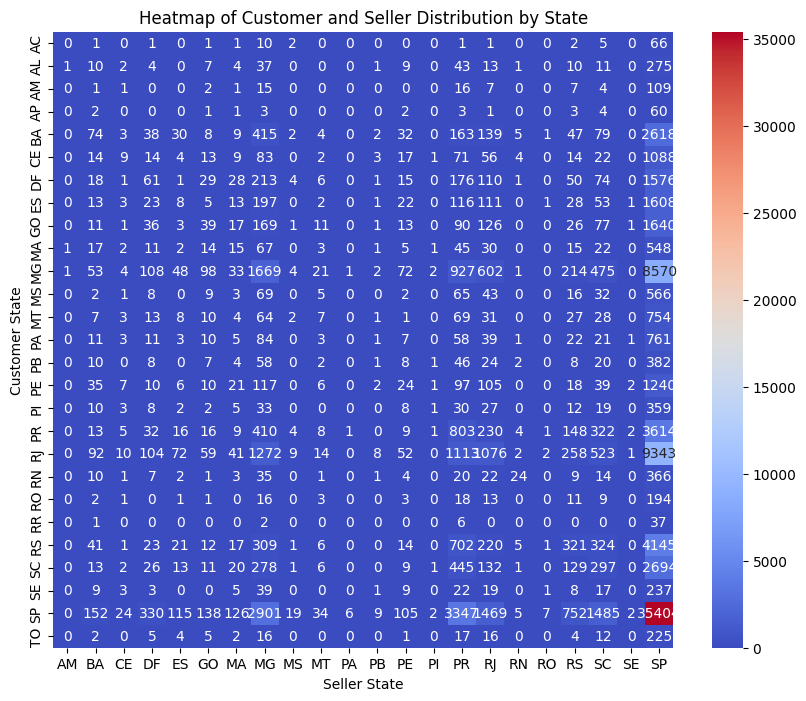

In [ ]:
# Tạo ma trận phân phối giữa customer_state và seller_state
state_distribution = pd.crosstab(master_data['customer_state'], master_data['seller_state'])

# Vẽ heatmap thể hiện sự phân bố của khách hàng và seller theo state
plt.figure(figsize=(10, 8))
sns.heatmap(state_distribution, cmap='coolwarm', annot=True, fmt='d')  # Bảng màu coolwarm dễ nhìn
plt.title('Heatmap of Customer and Seller Distribution by State')
plt.xlabel('Seller State')
plt.ylabel('Customer State')
plt.show()

# 5.Sale Prediction

### 5.1. Libraries

In [ ]:
!pip install pmdarima

In [ ]:
# Data manipulation libraries
import pandas                               as pd
import numpy                                as np

# Data visualization libraries
import seaborn                              as sns
import matplotlib                           as mpl
import matplotlib.pyplot                    as plt

# Time series libraries
import statsmodels                          as sm

# Decomposition of time series
from statsmodels.tsa.seasonal               import seasonal_decompose
# ACF and PACF
from statsmodels.graphics.tsaplots          import plot_acf, plot_pacf
# Stationarity tests
from statsmodels.tsa.stattools              import adfuller, kpss
# Models
from pmdarima.arima                         import auto_arima
from statsmodels.tsa.arima.model            import ARIMA
from statsmodels.tsa.statespace.sarimax     import SARIMAX

# Metrics
from sklearn.metrics                        import mean_absolute_error, mean_squared_error

# Other libraries
import warnings

In [ ]:
#some built in functions
import itertools
from datetime import datetime, timedelta

import warnings
#to supress warning generated for fb prophet using .append method by default
# warnings.simplefilter(action='ignore', category=FutureWarning)
#to suppress warnings in Sarima model
# warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore', InterpolationWarning)

#importing high level interactive plotting libraries
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# importing time series stats model
import statsmodels.api as sm
from statsmodels.api import tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#importing Sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

#sklearn library
from sklearn.preprocessing import MinMaxScaler

#importing LSTM libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

#importing XG Boost
import xgboost as xgb
from xgboost import plot_importance, plot_tree



In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

### 5.2. Settings

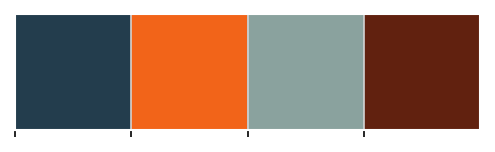

In [ ]:
# Ignoring warnings
warnings.filterwarnings('ignore')

# Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

# Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['figure.titlesize']    = 25
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['font.size']           = 12
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

# Palette Seting
ts_palette = ['#233D4D', '#F26419', '#8AA29E', '#61210F']
kde_palette = ['#233D4D', '#61210F']

sns.set_palette(sns.color_palette(ts_palette))
sns.palplot(sns.color_palette(ts_palette))

# Random Seed
SEED = 42

### 5.3. Functions

In [ ]:
def df_shape(df):
    """
    Summary: The function prints the number of rows and columns of a given DataFrame.

    Args:
        df: the DataFrame we want to know more about.

    Returns: a text indicating the number of rows and columns of the DataFrame.
    """

    print('Number of rows: {:,}'.format(df.shape[0]))
    print('Number of columns: {:,}'.format(df.shape[1]))

    return None

def set_image(fig, title, xlabel, ylabel):
    """
    Summary:
        This function sets the image configuration

    Args:
        fig: the figure we want to set the configuration
        title: the title of the plot
        xlabel: the label for the x axis
        ylabel: the label for the y axis

    Returns: None
    """
    fig.set_title(title)
    fig.set_xlabel(xlabel, color='black')
    fig.set_ylabel(ylabel, color='black')
    fig.tick_params(left=False, bottom=False)

    return None

## 5.4. Data Description

In [ ]:
df_revenue.head()


revenue
date               
2016-09-15  269.940
2016-09-16    0.000
2016-09-17    0.000
2016-09-18    0.000
2016-09-19    0.000

In [ ]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 714 entries, 2016-09-15 to 2018-08-29
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [ ]:
df_revenue.tail()

revenue
date                
2018-08-25 10891.400
2018-08-26  8526.190
2018-08-27  5542.900
2018-08-28  4088.370
2018-08-29  2670.540

### 1.1. Shape

In [ ]:
df_shape(df_revenue)

Number of rows: 714
Number of columns: 1


### 1.2. Transformations

In [ ]:

# Setting frequency as daily
df_revenue = df_revenue.asfreq('D')


In [ ]:
# Taking a look at the dataframe, we can see the dates as DatetimeIndex in daily frequency and prices as float64
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 714 entries, 2016-09-15 to 2018-08-29
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [ ]:
# Remove rows with revenue equal to 0
df_revenue = df_revenue.loc['2017-01-05':]

# Print the modified DataFrame
print(df_revenue)

             revenue
date                
2017-01-05   396.900
2017-01-06   916.380
2017-01-07  1750.900
2017-01-08   449.780
2017-01-09   712.290
...              ...
2018-08-25 10891.400
2018-08-26  8526.190
2018-08-27  5542.900
2018-08-28  4088.370
2018-08-29  2670.540

[602 rows x 1 columns]


In [ ]:
df_revenue.to_csv('/content/sample_data/test.csv')

In [ ]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 602 entries, 2017-01-05 to 2018-08-29
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  602 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


## 5.5. Hold-out

After visualizing all the data, it will be splitted into train and test to introduce the forecasting. Hold-out on the last 14 days (2 weeks), data that will be forecasted.

In [ ]:
df_revenue

revenue
date                
2017-01-05   396.900
2017-01-06   916.380
2017-01-07  1750.900
2017-01-08   449.780
2017-01-09   712.290
...              ...
2018-08-25 10891.400
2018-08-26  8526.190
2018-08-27  5542.900
2018-08-28  4088.370
2018-08-29  2670.540

[602 rows x 1 columns]

In [ ]:
df_train = df_revenue['2017-01-05':'2018-07-31']
df_test  = df_revenue['2018-08-01':'2018-08-14']

### 2.5. Descriptive statistics

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 2017-01-05 to 2018-07-31
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [ ]:
df_train.describe().T

count      mean       std     min       25%       50%       75%  \
revenue 573.000 24318.746 14370.918 396.900 14231.490 22514.020 31824.210   

               max  
revenue 184834.170

## 5.6 Model

## 5.6.1. Auto ARIMA Model

The `auto_arima` function is designed to select the optimal ARIMA model. It will be used to find the values for p, q and Seasonal orders given the context of the previous tests like ADF, KPSS, ACF and PACF plots. Also, the explication of each parameter is inside the code box.

In [ ]:
fit_arima = auto_arima(
    df_train,                       # dataset
    max_p=3,                        # limiting the number of autoregressive terms so the model don't overfit
    max_q=3,                        # limiting the number of moving average terms so the model don't overfit
    m=7,                            # number of periods in the seasonal cycle
    seasonal=True,                  # try for seasonal data
    seasonal_test='ocsb',           # use the OCSB test
    d=1,                            # number of differencing equals to 1 because of ADF and KPSS results
    trace=False,                    # to don't print the progress of the model
    information_criterion='bic',    # choose the best model based on Bayesian information criterion
    stepwise=False                  # testing all possible combinations
)

### 5.6.1.1 Summary

In [ ]:
# Print the summary of the best model
print(fit_arima.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  573
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -6035.850
Date:                                Tue, 07 May 2024   AIC                          12085.701
Time:                                        09:20:49   BIC                          12116.145
Sample:                                    01-05-2017   HQIC                         12097.577
                                         - 07-31-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4678      5.889      0.079      0.937     -11.075      12.010
ar.

### 5.6.1.2. Forecast

After analysing the results on `fit_arima.summary()`, the fitted model is used to forecast the next 14 days of revenue on `test_forecast` and its confidence interval of upper and lower limits on `conf_int`.





In [ ]:
# Forecast future values
test_forecast, conf_int = fit_arima.predict(n_periods=14, return_conf_int=True)

In [ ]:
# Predicted values on the next 14 days
test_forecast

2018-08-01   44400.740
2018-08-02   41873.082
2018-08-03   38519.610
2018-08-04   32755.666
2018-08-05   34869.501
2018-08-06   42654.794
2018-08-07   42651.652
2018-08-08   41795.013
2018-08-09   41421.727
2018-08-10   38832.503
2018-08-11   33230.037
2018-08-12   35388.593
2018-08-13   43022.617
2018-08-14   42789.305
Freq: D, dtype: float64

In [ ]:
# Confidence interval
conf_int

array([[24639.75996343, 64161.72019495],
       [20302.92974093, 63443.2352102 ],
       [16246.67999563, 60792.53990314],
       [ 9994.68721561, 55516.64518911],
       [11678.01542768, 58060.98746228],
       [19053.16953708, 66256.41778382],
       [18650.29422326, 66653.00986264],
       [17130.51903834, 66459.50606539],
       [16268.39945253, 66575.05514525],
       [13238.86335524, 64426.1423789 ],
       [ 7213.98885012, 59246.08478873],
       [ 8959.73169182, 61817.45464461],
       [16188.07092858, 69857.16357032],
       [15555.3303326 , 70023.28038917]])

### 5.6.1.3. Evaluating metrics

To evaluate the results, we will use Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE)

In [ ]:
# Transforming the dataframes to numpy array
y_true = np.array(df_test)
y_pred = np.array(test_forecast)

# Creating metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print metrics
print('Mean Absolute Error (MAE): {}'.format(mae))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Percentage Error (MAPE): {}'.format(mape))

Mean Absolute Error (MAE): 5866.78243908184
Root Mean Squared Error (RMSE): 8476.183719698342
Mean Absolute Percentage Error (MAPE): 17.814409623116394


In [ ]:
# Creating metrics
actual_sum      = df_test.sum()
predicted_sum   = test_forecast.sum()
difference      = actual_sum - predicted_sum
relative_error  = difference / actual_sum

# Print metrics
print('Actual Sum of Revenue for the next 14 days: ${:,.2f}'.format(actual_sum[0]))
print('Predicted Sum of Revenue for the next 14 days: ${:,.2f}'.format(predicted_sum))
print('Diiference: ${:,.2f}'.format(difference[0]))
print('Relative Error of: {:.2f}%'.format(relative_error[0]*100))

Actual Sum of Revenue for the next 14 days: $610,866.45
Predicted Sum of Revenue for the next 14 days: $554,204.84
Diiference: $56,661.61
Relative Error of: 9.28%


### 5.6.1.4. Visualizing the forecast

The next figure shows the 2018 data in blue, the results of the forecast in red, the confidence interval in light red and the real data in dashed black.

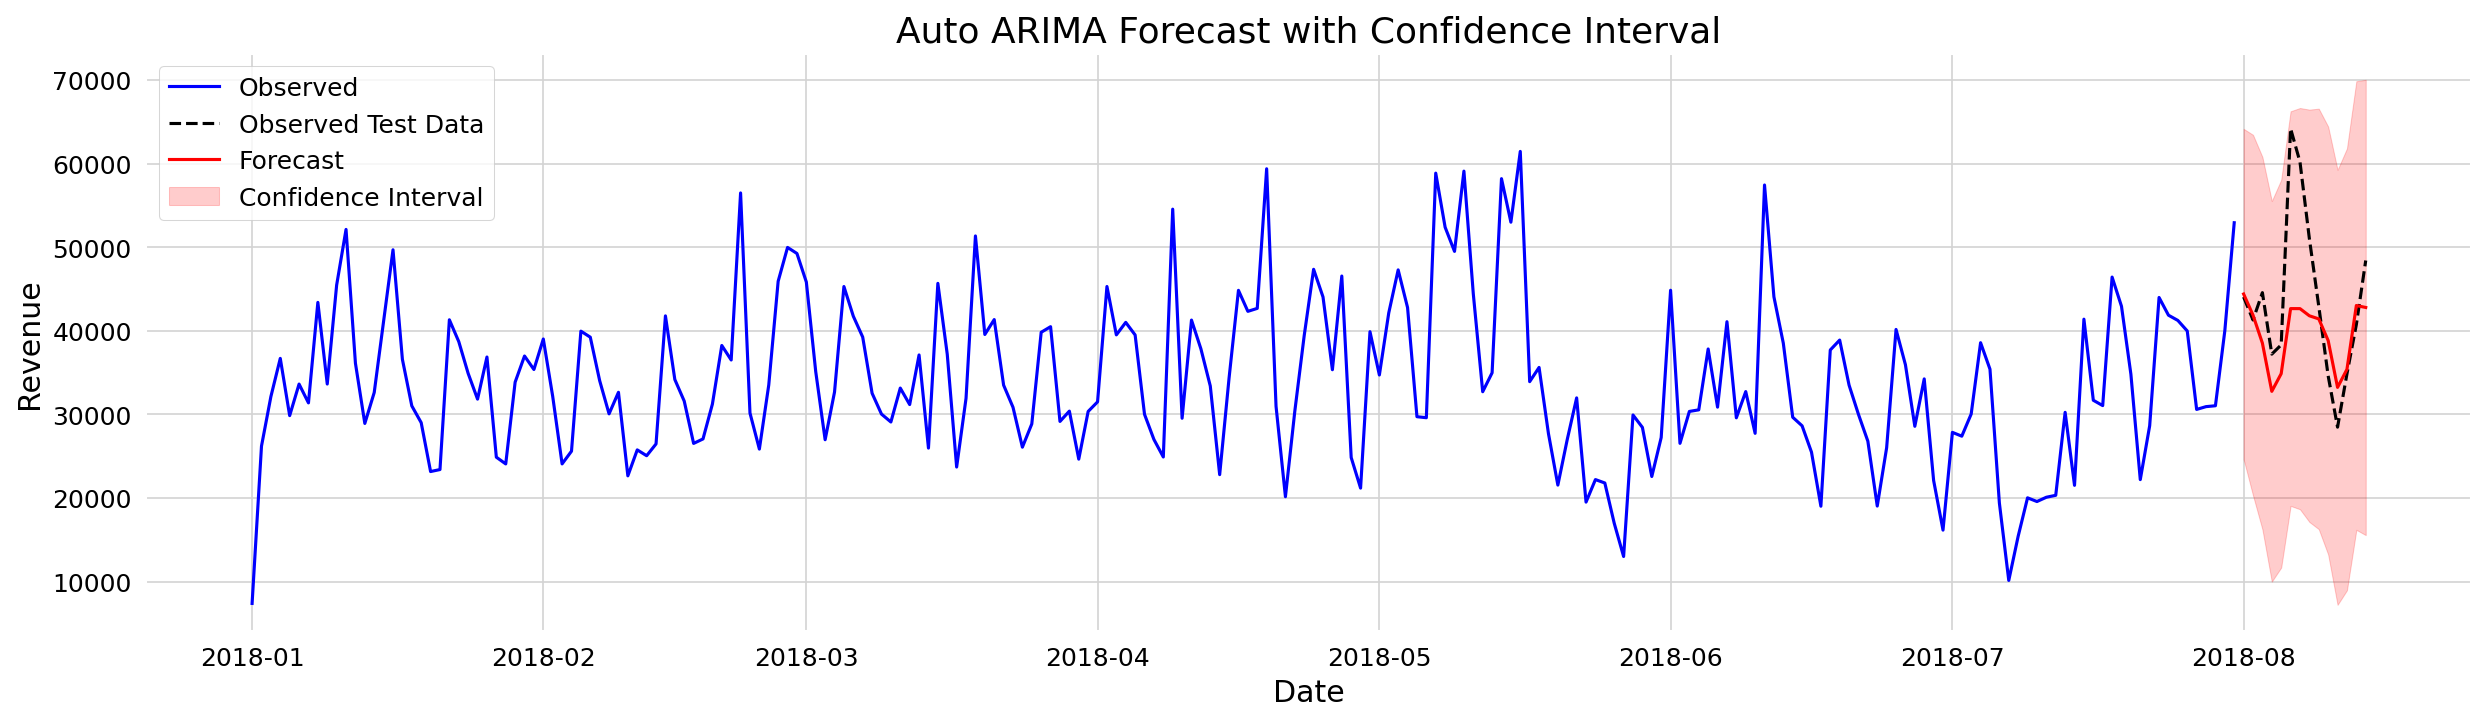

In [ ]:
# Create Figure
fig, ax = plt.subplots()

# Time series data
ax.plot(df_train.loc['2018'], label='Observed', color='blue')
ax.plot(df_test.index, df_test, label='Observed Test Data', color='black', linestyle='--')

# Forecast
ax.plot(df_test.index, test_forecast, color='red', label='Forecast')

# Confidence interval
ax.fill_between(df_test.index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2, label='Confidence Interval')

# Display the legend
ax.legend()

# Customizing
set_image(ax, 'Auto ARIMA Forecast with Confidence Interval', 'Date', 'Revenue')

## 5.6.2. ARIMA Model

In [ ]:
# Modeling
arima_model   = ARIMA(df_train, order=(1, 1, 1))
# Fitting
arima_results = arima_model.fit()

### 5.6.2.1 Summary

In [ ]:
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  573
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6063.494
Date:                Tue, 07 May 2024   AIC                          12132.987
Time:                        09:20:50   BIC                          12146.035
Sample:                    01-05-2017   HQIC                         12138.077
                         - 07-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3464      0.039      8.849      0.000       0.270       0.423
ma.L1         -0.9016      0.026    -34.890      0.000      -0.952      -0.851
sigma2       1.02e+08   3.88e-10   2.63e+17      0.0

### 5.6.2.2. Forecast

In [ ]:
arima_forecast_values = arima_results.predict(start='2018-08-01', end='2018-08-14')
arima_forecast_values

2018-08-01   42266.215
2018-08-02   38573.819
2018-08-03   37294.887
2018-08-04   36851.905
2018-08-05   36698.470
2018-08-06   36645.324
2018-08-07   36626.917
2018-08-08   36620.541
2018-08-09   36618.332
2018-08-10   36617.567
2018-08-11   36617.302
2018-08-12   36617.211
2018-08-13   36617.179
2018-08-14   36617.168
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
arima_forecast = arima_results.get_forecast(steps=14)

In [ ]:
conf_int = arima_forecast.conf_int()
conf_int

lower revenue  upper revenue
2018-08-01      22473.645      62058.784
2018-08-02      16912.097      60235.540
2018-08-03      15064.519      59525.256
2018-08-04      14319.425      59384.385
2018-08-05      13936.972      59459.967
2018-08-06      13678.719      59611.930
2018-08-07      13464.196      59789.637
2018-08-08      13265.789      59975.292
2018-08-09      13073.949      60162.716
2018-08-10      12885.353      60349.782
2018-08-11      12698.830      60535.774
2018-08-12      12513.954      60720.467
2018-08-13      12330.555      60903.802
2018-08-14      12148.555      61085.780

### 5.6.2.3. Evaluating metrics

In [ ]:
# Transforming the dataframes to numpy array
y_true = np.array(df_test)
y_pred = np.array(arima_forecast_values)

# Creating metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print metrics
print('Mean Absolute Error (MAE): {}'.format(mae))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Percentage Error (MAPE): {}'.format(mape))

Mean Absolute Error (MAE): 8102.432469175532
Root Mean Squared Error (RMSE): 11520.684119477286
Mean Absolute Percentage Error (MAPE): 17.62880388308559


In [ ]:
# Creating metrics
actual_sum      = df_test.sum()
predicted_sum   = arima_forecast_values.sum()
difference      = actual_sum - predicted_sum
relative_error  = difference / actual_sum

# Print metrics
print('Actual Sum of Revenue for the next 14 days: ${:,.2f}'.format(actual_sum[0]))
print('Predicted Sum of Revenue for the next 14 days: ${:,.2f}'.format(predicted_sum))
print('Diiference: ${:,.2f}'.format(difference[0]))
print('Relative Error of: {:.2f}%'.format(relative_error[0]*100))

Actual Sum of Revenue for the next 14 days: $610,866.45
Predicted Sum of Revenue for the next 14 days: $521,282.84
Diiference: $89,583.61
Relative Error of: 14.67%


The ARIMA function shows that predicting the same value for next 14 days, *not following the oscillations according to the original data*, might still reproduce good results looking at the big picture.

### 5.6.2.4. Visualizing the forecast

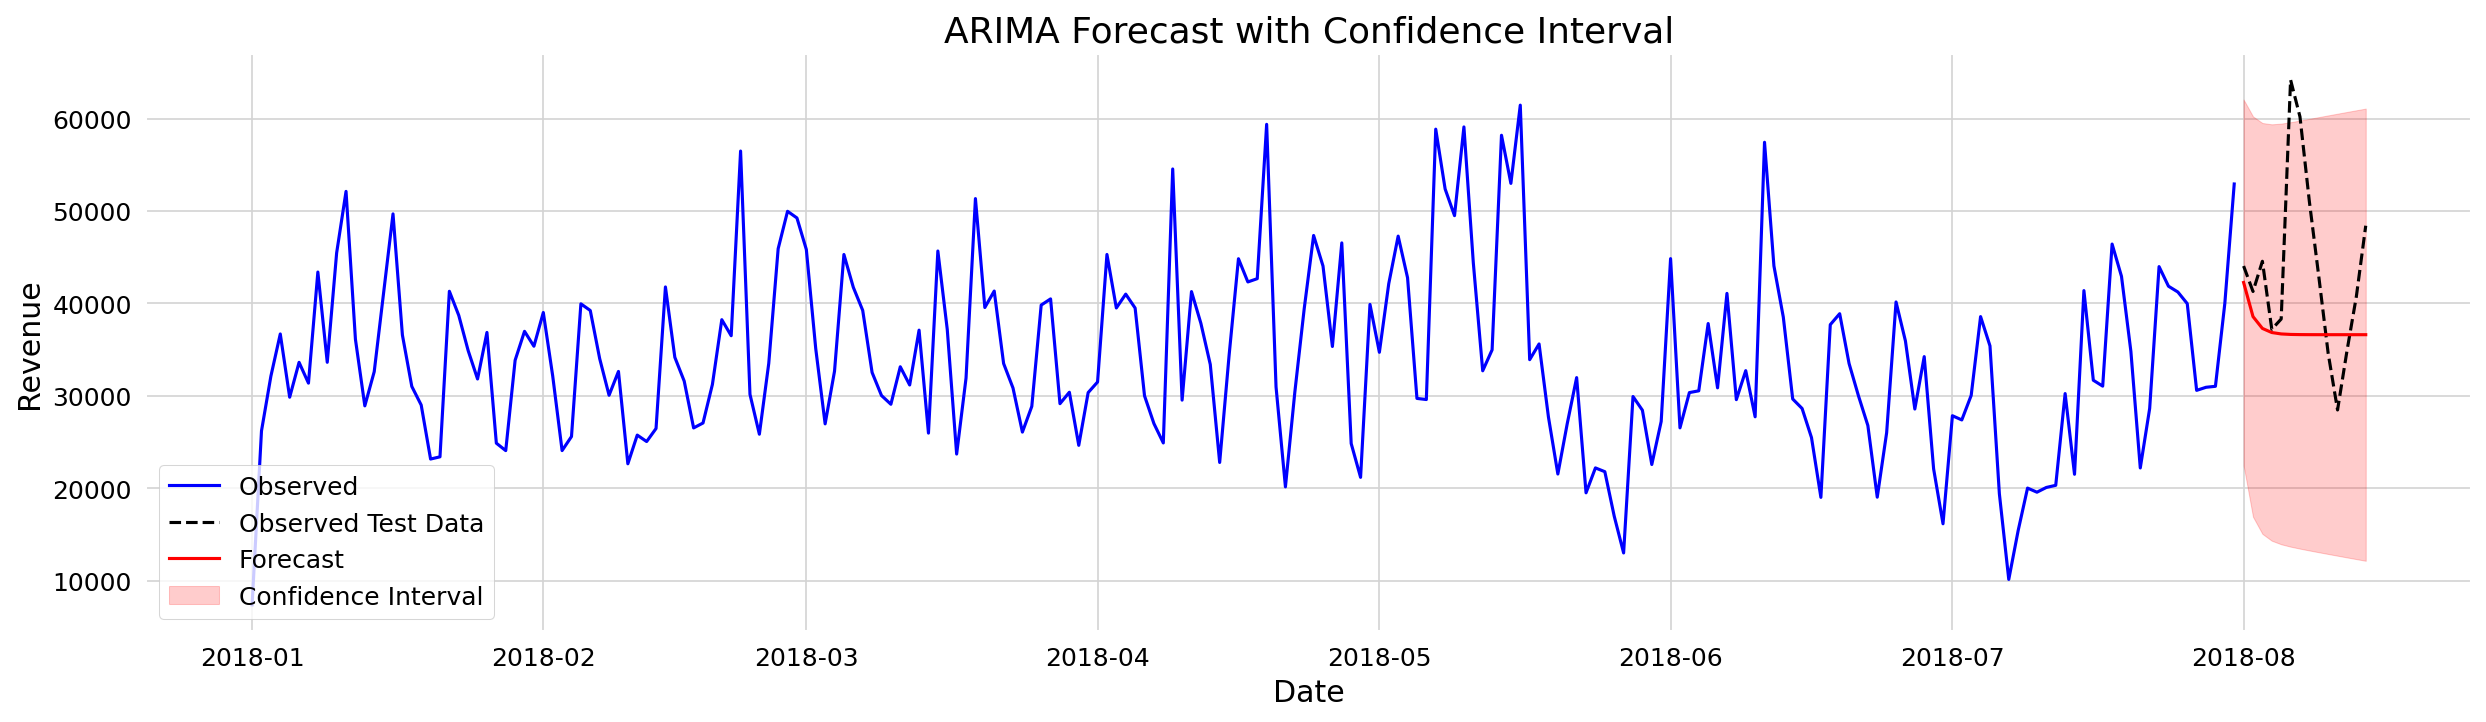

In [ ]:
# Create Figure
fig, ax = plt.subplots()

# Time series data
ax.plot(df_train.loc['2018'], label='Observed', color='blue')
ax.plot(df_test.index, df_test, label='Observed Test Data', color='black', linestyle='--')

# Forecast
ax.plot(df_test.index, arima_forecast_values, color='red', label='Forecast')

# Confidence interval
ax.fill_between(df_test.index, conf_int['lower revenue'], conf_int['upper revenue'], color='red', alpha=0.2, label='Confidence Interval')

# Display the legend
ax.legend()

# Customizing
set_image(ax, 'ARIMA Forecast with Confidence Interval', 'Date', 'Revenue')

- The AIC and BIC values are slightly higher than the Auto ARIMA model
- MAE and RMSE are **higher** than the Auto ARIMA model
- MAPE is slightly **lower** than the Auto ARIMA model, indicating that forecasting the mean of the time series data might obtain better results
- The monetary results are better than the `auto_arima` function
- However, the `statsmodel` ARIMA function was unable to capture the movements of the time series data, predicting a straight line

## 5.6.3. SARIMA Model

Using the orders of `auto_arima` to compare the results with `statsmodels.tsa.statespace.sarimax`:

In [ ]:
# Fit the same orders from Auto ARIMA to compare the models
sarima_model   = SARIMAX(df_train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 7))
sarima_results = sarima_model.fit()

### 5.6.3.1 Summary

In [ ]:
print(sarima_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           revenue   No. Observations:                  573
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -6035.657
Date:                           Tue, 07 May 2024   AIC                          12081.314
Time:                                   09:32:47   BIC                          12103.060
Sample:                               01-05-2017   HQIC                         12089.797
                                    - 07-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2689      0.051      5.297      0.000       0.169       0.368
ma.L1         -0.8357      0.038    -21.936

### 5.6.3.2. Forecast

In [ ]:
sarima_forecast = sarima_results.get_forecast(steps=14)

In [ ]:
sarima_forecast_values = sarima_forecast.predicted_mean
sarima_forecast_values

2018-08-01   44351.625
2018-08-02   41955.319
2018-08-03   38753.344
2018-08-04   31981.174
2018-08-05   34229.492
2018-08-06   43060.816
2018-08-07   42725.035
2018-08-08   41843.894
2018-08-09   41517.668
2018-08-10   38898.334
2018-08-11   32342.747
2018-08-12   34608.081
2018-08-13   43360.635
2018-08-14   43031.135
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
conf_int = sarima_forecast.conf_int()
conf_int

lower revenue  upper revenue
2018-08-01      24559.284      64143.967
2018-08-02      20385.063      63525.575
2018-08-03      16478.326      61028.363
2018-08-04       9205.851      54756.498
2018-08-05      11008.163      57450.820
2018-08-06      19413.052      66708.580
2018-08-07      18661.318      66788.753
2018-08-08      17184.248      66503.540
2018-08-09      16384.480      66650.855
2018-08-10      13327.151      64469.516
2018-08-11       6347.901      58337.593
2018-08-12       8198.199      61017.964
2018-08-13      16542.622      70178.648
2018-08-14      15811.238      70251.032

### 5.6.3.3. Evaluating metrics

In [ ]:
# Transforming the dataframes to numpy array
y_true = np.array(df_test)
y_pred = np.array(sarima_forecast_values)

# Creating metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print metrics
print('Mean Absolute Error (MAE): {}'.format(mae))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Percentage Error (MAPE): {}'.format(mape))

Mean Absolute Error (MAE): 5835.363656179614
Root Mean Squared Error (RMSE): 8392.276067653682
Mean Absolute Percentage Error (MAPE): 18.222063434009417


In [ ]:
# Creating metrics
actual_sum      = df_test.sum()
predicted_sum   = sarima_forecast_values.sum()
difference      = actual_sum - predicted_sum
relative_error  = difference / actual_sum

# Print metrics
print('Actual Sum of Revenue for the next 14 days: ${:,.2f}'.format(actual_sum[0]))
print('Predicted Sum of Revenue for the next 14 days: ${:,.2f}'.format(predicted_sum))
print('Diiference: ${:,.2f}'.format(difference[0]))
print('Relative Error of: {:.2f}%'.format(relative_error[0]*100))

Actual Sum of Revenue for the next 14 days: $610,866.45
Predicted Sum of Revenue for the next 14 days: $552,659.30
Diiference: $58,207.15
Relative Error of: 9.53%


### 5.6.3.4. Visualizing the forecast

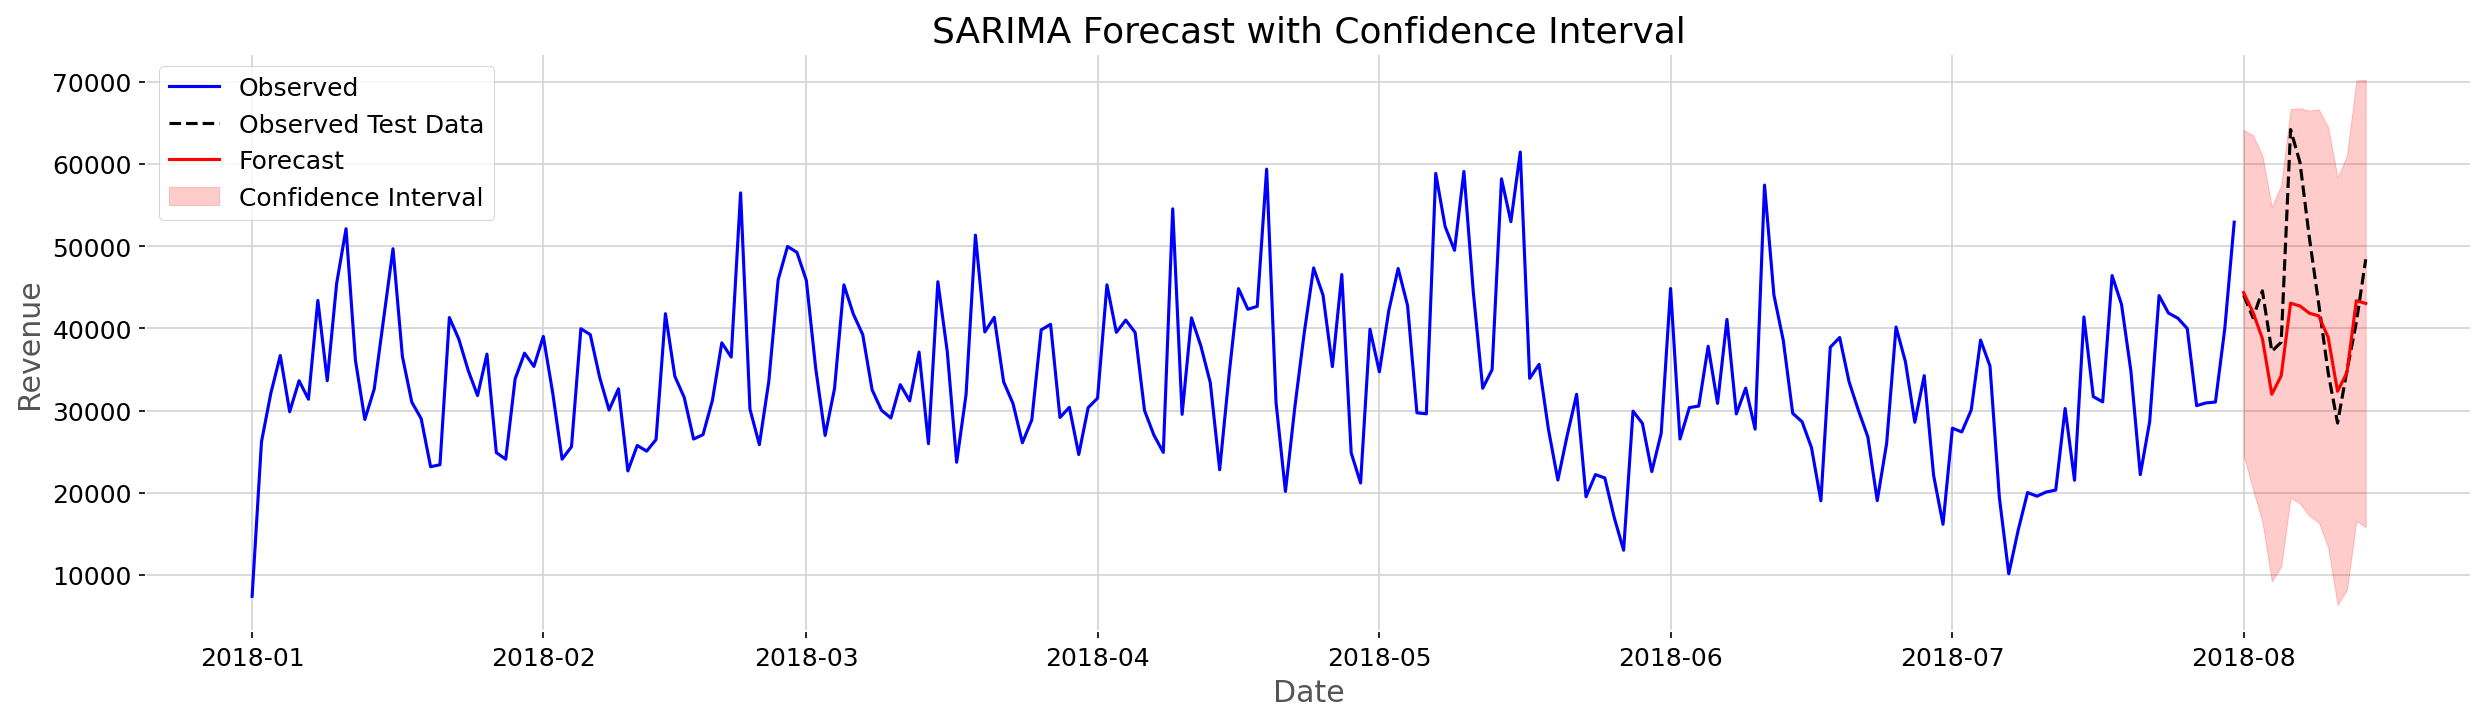

In [ ]:
import matplotlib.pyplot as plt

# Create Figure
fig, ax = plt.subplots()

# Time series data
ax.plot(df_train.loc['2018'], label='Observed', color='blue')
ax.plot(df_test.index, df_test, label='Observed Test Data', color='black', linestyle='--')

# Forecast
ax.plot(df_test.index, sarima_forecast_values, color='red', label='Forecast')

# Confidence interval
ax.fill_between(df_test.index, conf_int['lower revenue'], conf_int['upper revenue'], color='red', alpha=0.2, label='Confidence Interval')

# Customize the plot
ax.set_title('SARIMA Forecast with Confidence Interval')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')

# Display the legend
ax.legend()

# Show the plot
plt.show()

##5.6.4. SARIMAX

###5.6.4.1. Adding holiday exogenous variable

In [ ]:
#reading the data from holiday file
holiday=pd.read_csv('/content/sample_data/data_cleaning/holiday.csv', index_col=0)

In [ ]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2017-01-01 to 2018-12-25
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   is_holiday  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [ ]:
#converting index to date time format
holiday.index=pd.to_datetime(holiday.index)

In [ ]:
#fill the missing dates
idx = pd.date_range('2017-01-05', '2018-12-31')
holiday = holiday.reindex(idx, fill_value=0)

#converting is_holiday column to int type
holiday['is_holiday']=holiday['is_holiday'].astype(int)

In [ ]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726 entries, 2017-01-05 to 2018-12-31
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   is_holiday  726 non-null    int64
dtypes: int64(1)
memory usage: 11.3 KB


In [ ]:
#adding some more days as holidays like valentine day and black friday
#feb 14, Nov 24 2017 and Nov-23 2018
holiday.loc[((holiday.index.day== 14) & (holiday.index.month==2)),:]=1
holiday.loc[((holiday.index== '2017-11-24') | (holiday.index== '2018-11-23') ),:]=1

In [ ]:
#filtering the holidays only upto the end of our test data period.
holiday_df=holiday.loc[holiday.index<='2018-08-29']

In [ ]:
#adding the holiday data to our new dataframe.
dfex=pd.concat([df_revenue, holiday_df], axis=1)

In [ ]:
dfex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 602 entries, 2017-01-05 to 2018-08-29
Freq: D
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   revenue     602 non-null    float64
 1   is_holiday  602 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 30.3 KB


### 5.6.4.2. Training SARIMAX with exogenous variable

In [ ]:
dfex_train = dfex['2017-01-05':'2018-07-31']
dfex_test  = dfex['2018-08-01':'2018-08-14']

In [ ]:
dfex_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 2017-01-05 to 2018-07-31
Freq: D
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   revenue     573 non-null    float64
 1   is_holiday  573 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 13.4 KB


In [ ]:
# Set Hyper-parameters
p, d, q = 0, 1, 1
P, D, Q = 1, 0, 1
s = 7

# Fit SARIMA
sarimax_model = SARIMAX(dfex_train['revenue'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, s),
                       exog=(dfex_train[['is_holiday']]))
sarimax_model_fit = sarimax_model.fit(disp=0)
print(sarimax_model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           revenue   No. Observations:                  573
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -6044.938
Date:                           Tue, 07 May 2024   AIC                          12099.877
Time:                                   09:31:11   BIC                          12121.622
Sample:                               01-05-2017   HQIC                         12108.360
                                    - 07-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
is_holiday  2478.1203   1001.679      2.474      0.013     514.866    4441.375
ma.L1         -0.6652      0.023    -28.567

In [ ]:
#predicting
pred_start_date = df_test.index[0]
pred_end_date = df_test.index[-1]

# sarimax_predictions = sarimax_model_fit.predict(start=pred_start_date, end=pred_end_date, exog=(dfex_test[['is_holiday']]))
# Get predictions and confidence intervals
sarimax_predictions = sarimax_model_fit.get_prediction(start=pred_start_date, end=pred_end_date, exog=(dfex_test[['is_holiday']]))
conf_int_sarimax = sarimax_predictions.conf_int()

In [ ]:
conf_int_sarimax

lower revenue  upper revenue
2018-08-01      23524.676      63098.911
2018-08-02      16798.239      60756.627
2018-08-03      11568.357      56620.837
2018-08-04       4203.301      49610.570
2018-08-05       6115.574      51678.166
2018-08-06      14382.101      60036.542
2018-08-07      14069.399      59792.372
2018-08-08      13102.643      59038.772
2018-08-09      12483.190      58534.663
2018-08-10       9597.136      55729.458
2018-08-11       3277.744      49477.262
2018-08-12       8052.901      54313.805
2018-08-13      13910.515      60230.221
2018-08-14      13682.075      60059.392

## 5.6.4.3. Evaluating metrics

In [ ]:
# Transforming the dataframes to numpy array
y_true = np.array(df_test)
y_pred = sarimax_predictions.predicted_mean.values
# Creating metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print metrics
print('Mean Absolute Error (MAE): {}'.format(mae))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Percentage Error (MAPE): {}'.format(mape))

Mean Absolute Error (MAE): 5633.997705349796
Root Mean Squared Error (RMSE): 7644.783231715482
Mean Absolute Percentage Error (MAPE): 17.91760734670498


In [ ]:
# Creating metrics
actual_sum      = dfex_test.sum()
predicted_sum = sarimax_predictions.predicted_mean.sum()
difference      = actual_sum - predicted_sum
relative_error  = difference / actual_sum

# Print metrics
print('Actual Sum of Revenue for the next 14 days: ${:,.2f}'.format(actual_sum[0]))
print('Predicted Sum of Revenue for the next 14 days: ${:,.2f}'.format(predicted_sum))
print('Diiference: ${:,.2f}'.format(difference[0]))
print('Relative Error of: {:.2f}%'.format(relative_error[0]*100))

Actual Sum of Revenue for the next 14 days: $610,866.45
Predicted Sum of Revenue for the next 14 days: $578,650.16
Diiference: $32,216.29
Relative Error of: 5.27%


In [ ]:
dfex_train

revenue  is_holiday
2017-01-05   396.900           0
2017-01-06   916.380           0
2017-01-07  1750.900           0
2017-01-08   449.780           0
2017-01-09   712.290           0
...              ...         ...
2018-07-27 30593.890           0
2018-07-28 30925.640           0
2018-07-29 31031.310           0
2018-07-30 40003.500           0
2018-07-31 52926.510           0

[573 rows x 2 columns]

###5.6.4.4. Visualizing the forecast

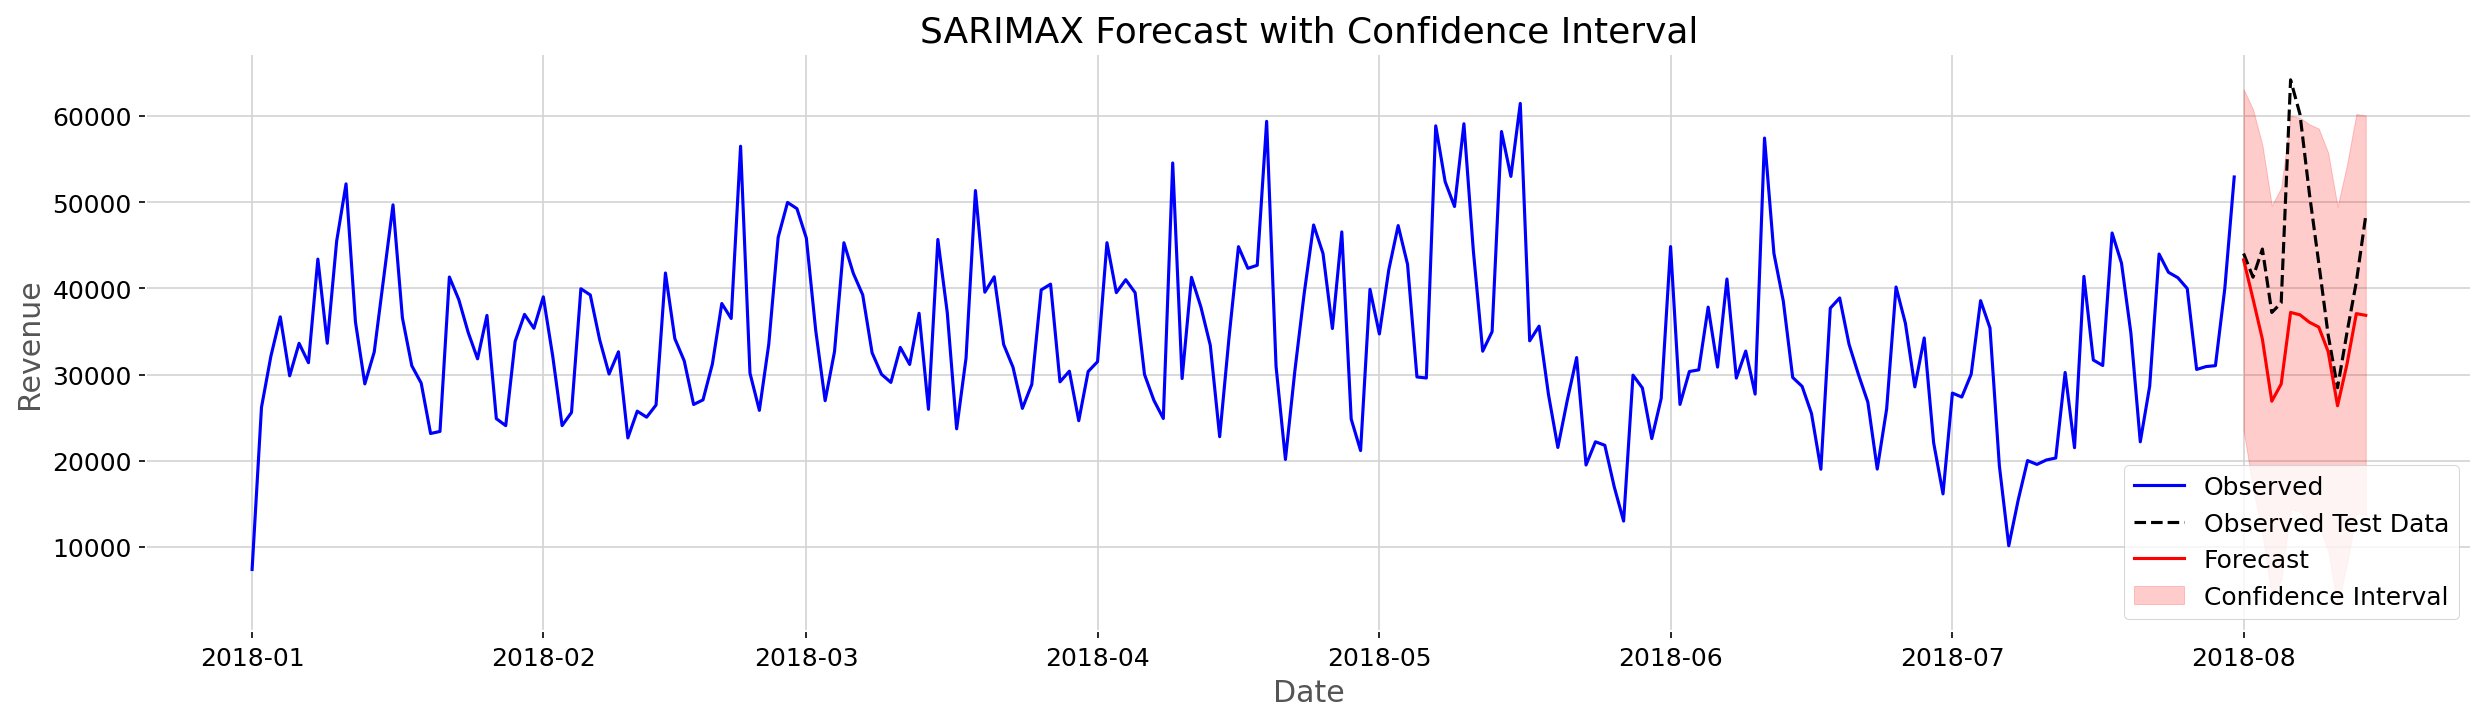

In [ ]:
import matplotlib.pyplot as plt

# Create Figure
fig, ax = plt.subplots()

# Filter data from 2018
dfex_train_2018 = dfex_train[dfex_train.index.year >= 2018]

# Time series data
ax.plot(dfex_train_2018.index, dfex_train_2018['revenue'], label='Observed', color='blue')
ax.plot(dfex_test.index, dfex_test['revenue'], label='Observed Test Data', color='black', linestyle='--')

# Forecast
ax.plot(dfex_test.index, sarimax_predictions.predicted_mean, color='red', label='Forecast')

# Confidence interval
ax.fill_between(dfex_test.index, conf_int_sarimax['lower revenue'], conf_int_sarimax['upper revenue'], color='red', alpha=0.2, label='Confidence Interval')

# Customize the plot
ax.set_title('SARIMAX Forecast with Confidence Interval')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')

# Display the legend
ax.legend()

# Show the plot
plt.show()

##5.6.5. XGBoost Regression

### 5.6.5.1. Extracts feature and spilitting data

In [ ]:
 #function to extract features from date
def create_features(dataframe, label=None):
    df=dataframe.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    X = df[['dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
#creating dataframe with only required columns
df_xgb=dfex[['revenue', 'is_holiday']]

In [ ]:
df_xgb.head()

revenue  is_holiday
2017-01-05  396.900           0
2017-01-06  916.380           0
2017-01-07 1750.900           0
2017-01-08  449.780           0
2017-01-09  712.290           0

In [ ]:
#Separating X and y
X, y= create_features(df_xgb, label='revenue')
X['is_holiday']=df_xgb['is_holiday']

In [ ]:
train_end = '2018-7-31'
test_end = '2018-8-14'
train_mask = (df_xgb.index <= train_end)
test_mask = (df_xgb.index > train_end) & (df_xgb.index <= test_end)

X_train = X[train_mask]
y_train = y[train_mask]

X_test = X[test_mask]
y_test = y[test_mask]

In [ ]:
X_train

dayofweek  quarter  month  year  dayofyear  dayofmonth  \
2017-01-05          3        1      1  2017          5           5   
2017-01-06          4        1      1  2017          6           6   
2017-01-07          5        1      1  2017          7           7   
2017-01-08          6        1      1  2017          8           8   
2017-01-09          0        1      1  2017          9           9   
...               ...      ...    ...   ...        ...         ...   
2018-07-27          4        3      7  2018        208          27   
2018-07-28          5        3      7  2018        209          28   
2018-07-29          6        3      7  2018        210          29   
2018-07-30          0        3      7  2018        211          30   
2018-07-31          1        3      7  2018        212          31   

            weekofyear  is_holiday  
2017-01-05           1           0  
2017-01-06           1           0  
2017-01-07           1           0  
2017-01-08           1           0  
2017-01-09           2           0  
...                ...         ...  
2018-07-27          30           0  
2018-07-28          30           0  
2018-07-29          30           0  
2018-07-30          31           0  
2018-07-31          31           0  

[573 rows x 8 columns]

In [ ]:
y_train

2017-01-05     396.900
2017-01-06     916.380
2017-01-07    1750.900
2017-01-08     449.780
2017-01-09     712.290
                ...   
2018-07-27   30593.890
2018-07-28   30925.640
2018-07-29   31031.310
2018-07-30   40003.500
2018-07-31   52926.510
Freq: D, Name: revenue, Length: 573, dtype: float64

In [ ]:
X_test

dayofweek  quarter  month  year  dayofyear  dayofmonth  \
2018-08-01          2        3      8  2018        213           1   
2018-08-02          3        3      8  2018        214           2   
2018-08-03          4        3      8  2018        215           3   
2018-08-04          5        3      8  2018        216           4   
2018-08-05          6        3      8  2018        217           5   
2018-08-06          0        3      8  2018        218           6   
2018-08-07          1        3      8  2018        219           7   
2018-08-08          2        3      8  2018        220           8   
2018-08-09          3        3      8  2018        221           9   
2018-08-10          4        3      8  2018        222          10   
2018-08-11          5        3      8  2018        223          11   
2018-08-12          6        3      8  2018        224          12   
2018-08-13          0        3      8  2018        225          13   
2018-08-14          1        3      8  2018        226          14   

            weekofyear  is_holiday  
2018-08-01          31           0  
2018-08-02          31           0  
2018-08-03          31           0  
2018-08-04          31           0  
2018-08-05          31           0  
2018-08-06          32           0  
2018-08-07          32           0  
2018-08-08          32           0  
2018-08-09          32           0  
2018-08-10          32           0  
2018-08-11          32           0  
2018-08-12          32           1  
2018-08-13          33           0  
2018-08-14          33           0

### 5.6.5.2. Tuning XGBoost

In [ ]:
num_estimators= [i for i in range(100, 1010, 100)]
depth=[i for i in range(3, 15, 2)]
learning=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

In [ ]:
XGB_summary=pd.DataFrame(columns=['n_estimators', 'max_depth', 'learning_rate', 'MAPE', 'RMSE' ])

for i in num_estimators:
    for j in depth:
        for k in learning:
            model_reg= xgb.XGBRegressor(n_estimators=i, max_depth=j, learning_rate=k )
            model_reg.fit(X_train, y_train)
            predictions_xgb = model_reg.predict(X_test)
            mape_xgb=np.mean(np.abs((y_test - predictions_xgb)/y_test))*100
            rmse_xgb = np.sqrt(np.mean((y_test-predictions_xgb)**2))
            data_param={'n_estimators': i,
                        'max_depth': j,
                        'learning_rate': k,
                        'MAPE': mape_xgb,
                        'RMSE' : rmse_xgb }
            XGB_summary=pd.concat([XGB_summary, pd.DataFrame(data_param, columns=XGB_summary.columns, index=[1])], ignore_index=True)


In [ ]:
XGB_summary.sort_values(by ='MAPE', ascending=True).head(10)

n_estimators max_depth  learning_rate   MAPE     RMSE
76           300         3          0.200 10.997 7331.831
112          400         3          0.200 11.080 7209.644
147          500         3          0.100 11.164 7391.184
40           200         3          0.200 11.224 7787.932
148          500         3          0.200 11.256 7173.902
183          600         3          0.100 11.289 7304.064
111          400         3          0.100 11.301 7458.187
184          600         3          0.200 11.324 7223.942
219          700         3          0.100 11.467 7205.550
152          500         5          0.010 11.484 7745.205

In [ ]:
#instantiate the XGBoost Model
reg_tuned = xgb.XGBRegressor(n_estimators=300, max_depth=3, learning_rate=0.200)
reg_tuned.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)

[0]	validation_0-rmse:12962.78425	validation_1-rmse:19392.78801
[1]	validation_0-rmse:11939.44902	validation_1-rmse:18371.00001
[2]	validation_0-rmse:11185.33756	validation_1-rmse:17216.35863
[3]	validation_0-rmse:10482.34632	validation_1-rmse:16663.90189
[4]	validation_0-rmse:9886.09538	validation_1-rmse:15905.97646
[5]	validation_0-rmse:9542.36140	validation_1-rmse:15520.42430
[6]	validation_0-rmse:8999.21156	validation_1-rmse:14383.75155
[7]	validation_0-rmse:8622.91801	validation_1-rmse:13966.24842
[8]	validation_0-rmse:8341.65678	validation_1-rmse:13606.83108
[9]	validation_0-rmse:7973.34733	validation_1-rmse:13386.02634
[10]	validation_0-rmse:7855.80149	validation_1-rmse:13198.02704
[11]	validation_0-rmse:7670.93646	validation_1-rmse:13044.71769
[12]	validation_0-rmse:7356.84652	validation_1-rmse:12822.64861
[13]	validation_0-rmse:7181.87071	validation_1-rmse:12688.91402
[14]	validation_0-rmse:7113.13922	validation_1-rmse:12598.60887
[15]	validation_0-rmse:6991.86283	validation_1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = reg_tuned.predict(X_test)

In [ ]:
y_train_pred = reg_tuned.predict(X_train)

In [ ]:
y_test

2018-08-01   44047.220
2018-08-02   41294.700
2018-08-03   44563.280
2018-08-04   37203.410
2018-08-05   38313.650
2018-08-06   64198.590
2018-08-07   60200.480
2018-08-08   51027.790
2018-08-09   42938.310
2018-08-10   34610.100
2018-08-11   28470.550
2018-08-12   34846.210
2018-08-13   40742.120
2018-08-14   48410.040
Freq: D, Name: revenue, dtype: float64

In [ ]:
y_test

2018-08-01   44047.220
2018-08-02   41294.700
2018-08-03   44563.280
2018-08-04   37203.410
2018-08-05   38313.650
2018-08-06   64198.590
2018-08-07   60200.480
2018-08-08   51027.790
2018-08-09   42938.310
2018-08-10   34610.100
2018-08-11   28470.550
2018-08-12   34846.210
2018-08-13   40742.120
2018-08-14   48410.040
Freq: D, Name: revenue, dtype: float64

### 5.6.5.3. Evaluating metrics

In [ ]:
# Transforming the dataframes to numpy array
y_true = np.array(y_train)
y_pred = np.array(y_train_pred)

# Creating metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print metrics
print('Mean Absolute Error (MAE): {}'.format(mae))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Percentage Error (MAPE): {}'.format(mape))

Mean Absolute Error (MAE): 1927.2872549731403
Root Mean Squared Error (RMSE): 2500.3244367882326
Mean Absolute Percentage Error (MAPE): 10.937315998701205


In [ ]:
# Transforming the dataframes to numpy array
y_true = np.array(y_test)
y_pred = np.array(y_test_pred)

# Creating metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print metrics
print('Mean Absolute Error (MAE): {}'.format(mae))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Percentage Error (MAPE): {}'.format(mape))

Mean Absolute Error (MAE): 5327.954715401786
Root Mean Squared Error (RMSE): 7331.83109075106
Mean Absolute Percentage Error (MAPE): 10.99748517666974


In [ ]:
# Creating metrics
actual_sum      = y_test.sum()
predicted_sum   = y_test_pred.sum()
difference      = actual_sum - predicted_sum
relative_error  = difference / actual_sum

# Print metrics
print('Actual Sum of Revenue for the next 14 days: ${:,.2f}'.format(actual_sum))
print('Predicted Sum of Revenue for the next 14 days: ${:,.2f}'.format(predicted_sum))
print('Diiference: ${:,.2f}'.format(difference))
print('Relative Error of: {:.2f}%'.format(relative_error*100))

Actual Sum of Revenue for the next 14 days: $610,866.45
Predicted Sum of Revenue for the next 14 days: $561,881.06
Diiference: $48,985.39
Relative Error of: 8.02%


###5.6.5.4.Visualizing the forecast

In [ ]:
n_bootstrap = 100  # Số lượng tập dữ liệu con được tạo
bootstrap_predictions = []

for i in range(n_bootstrap):
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[indices]
    y_bootstrap = y_train.iloc[indices]

    reg_bootstrap = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
    reg_bootstrap.fit(X_bootstrap, y_bootstrap)

    bootstrap_predictions.append(reg_bootstrap.predict(X_test))

# Tính toán khoảng tin cậy từ các dự đoán của các mô hình con
lower_revenue = np.percentile(bootstrap_predictions, 2.5, axis=0)
upper_revenue = np.percentile(bootstrap_predictions, 97.5, axis=0)



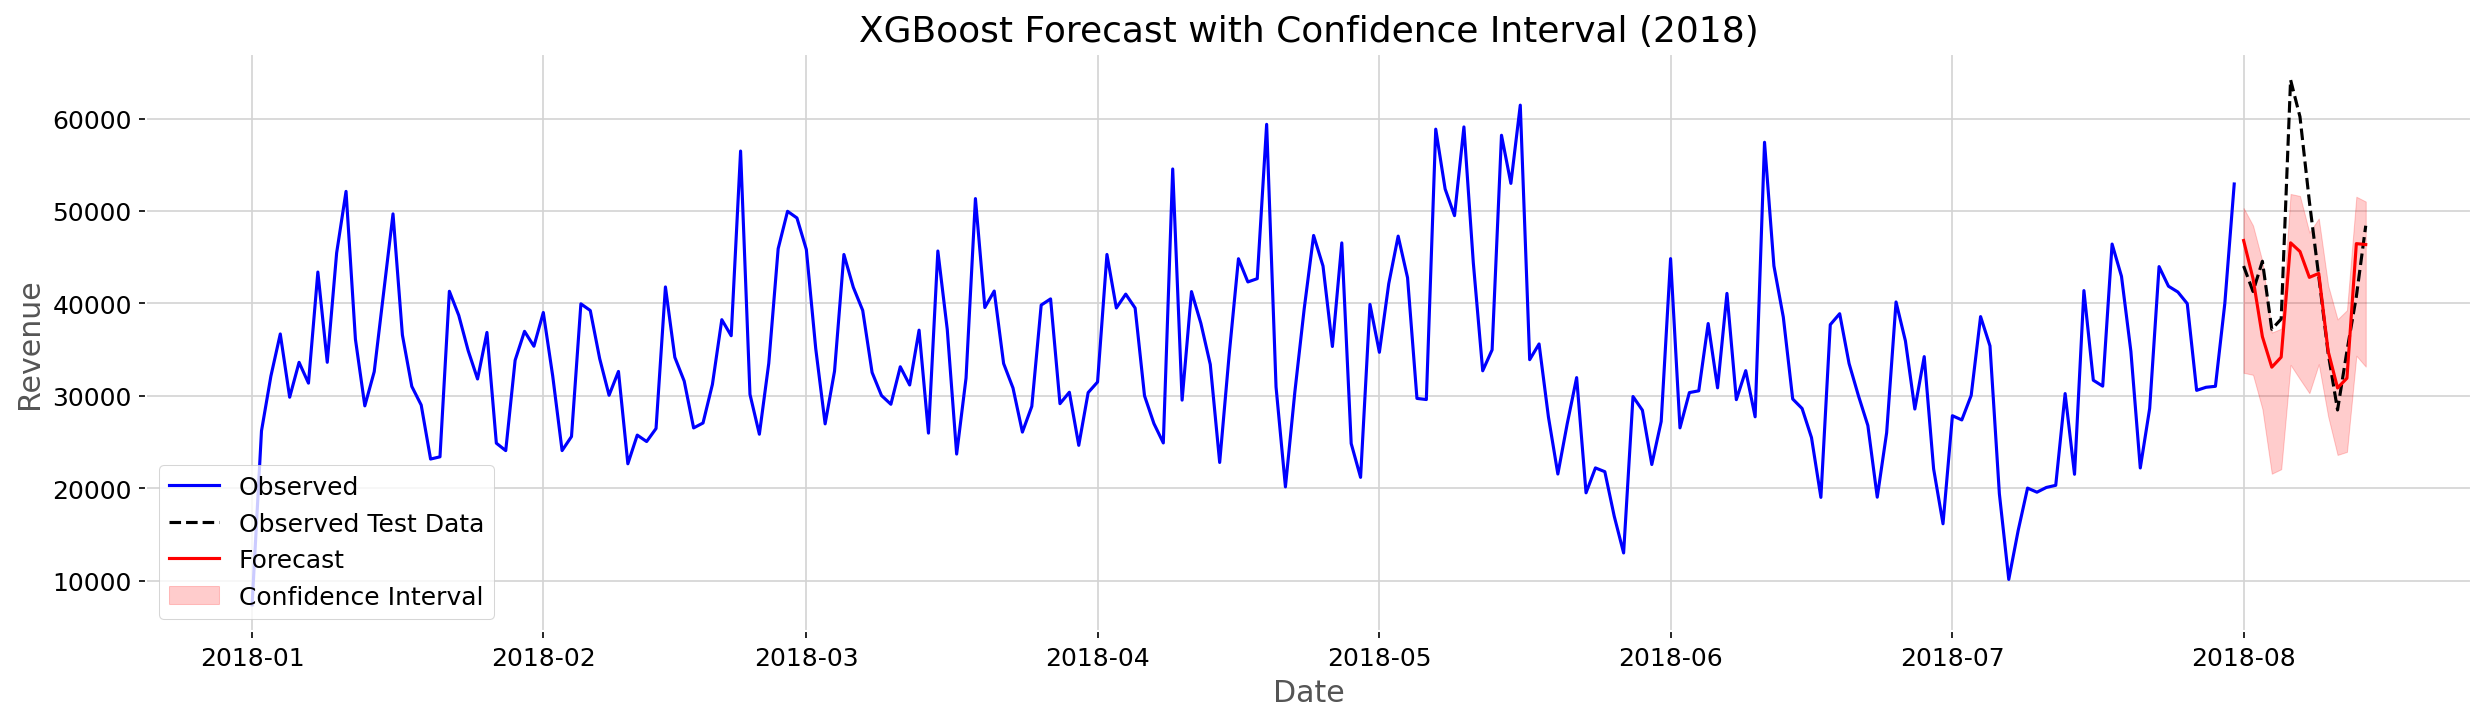

In [ ]:
import matplotlib.pyplot as plt

# Create Figure
fig, ax = plt.subplots()

# Filter y_train for 2018
y_train_2018 = y_train.loc[y_train.index.year >= 2018]

# Time series data for 2018
ax.plot(y_train_2018.index, y_train_2018, label='Observed', color='blue')


# Observed test data
ax.plot(y_test.index, y_test, label='Observed Test Data', color='black', linestyle='--')

# Forecast for 2018
forecast_2018 = pd.DataFrame({'ds': X_test.index, 'yhat': y_test_pred})
ax.plot(forecast_2018['ds'], forecast_2018['yhat'], color='red', label='Forecast')

# # Confidence interval for 2018
ax.fill_between(forecast_2018['ds'], lower_revenue, upper_revenue, color='red', alpha=0.2, label='Confidence Interval')

# Display the legend
ax.legend()

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.set_title('XGBoost Forecast with Confidence Interval (2018)')

# Show the plot
plt.show()

##5.6.6. Prophet

In [ ]:
!pip install Prophet

### 5.6.6.1. Splitting data from df with exogenous variable

In [ ]:

#preparing the dataframe for fbProphet
prophet_df=dfex['revenue'].reset_index()
prophet_df.rename(columns={"index": "ds", "revenue": "y"}, inplace=True)

#using our original train_df and test_df we will convert them into prophet train andt test set.
prophet_train = df_train["revenue"].reset_index()
prophet_train.rename(columns={"date": "ds", "revenue": "y"}, inplace=True)
prophet_test = df_test["revenue"].reset_index()
prophet_test.rename(columns={"date": "ds", "revenue": "y"}, inplace=True)

In [ ]:
prophet_train.tail()

ds         y
568 2018-07-27 30593.890
569 2018-07-28 30925.640
570 2018-07-29 31031.310
571 2018-07-30 40003.500
572 2018-07-31 52926.510

In [ ]:
print(prophet_train.columns)

Index(['ds', 'y'], dtype='object')


###5.6.6.2. Tunning hyper parameter

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1, 0.4, 0.5],
               'holidays_prior_scale':[0.4, 0.5, 0.6, 0.8, 10]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)


Total Possible Models 30


In [ ]:
prophet_test

ds         y
0  2018-08-01 44047.220
1  2018-08-02 41294.700
2  2018-08-03 44563.280
3  2018-08-04 37203.410
4  2018-08-05 38313.650
5  2018-08-06 64198.590
6  2018-08-07 60200.480
7  2018-08-08 51027.790
8  2018-08-09 42938.310
9  2018-08-10 34610.100
10 2018-08-11 28470.550
11 2018-08-12 34846.210
12 2018-08-13 40742.120
13 2018-08-14 48410.040

In [ ]:
from prophet import Prophet

In [ ]:
#preparing the holiday dataframe as per prophet
holiday_df_fb = pd.DataFrame({
  'holiday': 'Brazil holidays',
  'ds': pd.to_datetime(holiday_df.loc[holiday_df['is_holiday']==1].index)})

In [ ]:

#hyper parameter optimization for FB Prophet
tunning_summary = pd.DataFrame(columns=['Param', 'RMSE', 'MAPE'])
import random
val=pd.DataFrame()
for p in grid:
#     print(p)
    random.seed(0)
    train_model =Prophet(growth='linear',
                         changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         seasonality_mode = p['seasonality_mode'],
                         seasonality_prior_scale=10,
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday_df_fb)
    train_model.add_country_holidays(country_name='BR')
    train_model.fit(prophet_train)
    grid_forecast = train_model.make_future_dataframe(periods=14, freq='D',include_history = False)
    grid_forecast = train_model.predict(grid_forecast)
    val_df=grid_forecast[['ds','yhat']]
    mapes=np.mean(np.abs((prophet_test['y']-val_df['yhat'])/prophet_test['y']))*100
    rmses = np.sqrt(np.mean((prophet_test['y']-val_df['yhat'])**2))
    # Find the best parameters
    data= {"Param": f'{p}',
           "RMSE": rmses,
           "MAPE": mapes }

    tunning_summary=pd.concat([tunning_summary, pd.DataFrame(data, columns=tunning_summary.columns, index=[1])], ignore_index=True)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzduvro94/6p70vax8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzduvro94/fkqjnf2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75315', 'data', 'file=/tmp/tmpzduvro94/6p70vax8.json', 'init=/tmp/tmpzduvro94/fkqjnf2g.json', 'output', 'file=/tmp/tmpzduvro94/prophet_modelf2g4nhd8/prophet_model-20240507092834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzduvro94/9j1ddeua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzduvro94/o2g7sjkv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
#reading the summary
tunning_summary

Param      RMSE   MAPE
0   {'changepoint_prior_scale': 0.1, 'holidays_pri... 11316.355 19.491
1   {'changepoint_prior_scale': 0.1, 'holidays_pri... 12662.746 21.430
2   {'changepoint_prior_scale': 0.1, 'holidays_pri... 11685.464 20.471
3   {'changepoint_prior_scale': 0.1, 'holidays_pri... 12628.068 21.328
4   {'changepoint_prior_scale': 0.1, 'holidays_pri... 11725.111 20.714
5   {'changepoint_prior_scale': 0.1, 'holidays_pri... 12748.443 21.691
6   {'changepoint_prior_scale': 0.1, 'holidays_pri... 12098.538 21.565
7   {'changepoint_prior_scale': 0.1, 'holidays_pri... 12733.461 21.643
8   {'changepoint_prior_scale': 0.1, 'holidays_pri... 12054.192 21.502
9   {'changepoint_prior_scale': 0.1, 'holidays_pri... 12767.268 21.726
10  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12385.277 22.320
11  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12492.378 20.913
12  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12518.984 22.665
13  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12476.945 20.858
14  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12564.925 22.777
15  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12465.058 20.815
16  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12720.740 23.184
17  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12529.254 21.015
18  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12502.773 22.628
19  {'changepoint_prior_scale': 0.4, 'holidays_pri... 12519.830 20.981
20  {'changepoint_prior_scale': 0.5, 'holidays_pri... 12444.282 22.463
21  {'changepoint_prior_scale': 0.5, 'holidays_pri... 11150.334 16.975
22  {'changepoint_prior_scale': 0.5, 'holidays_pri... 12474.701 22.532
23  {'changepoint_prior_scale': 0.5, 'holidays_pri... 11584.971 18.123
24  {'changepoint_prior_scale': 0.5, 'holidays_pri... 12798.491 23.395
25  {'changepoint_prior_scale': 0.5, 'holidays_pri... 11473.699 17.830
26  {'changepoint_prior_scale': 0.5, 'holidays_pri... 12710.359 23.163
27  {'changepoint_prior_scale': 0.5, 'holidays_pri... 11193.923 17.080
28  {'changepoint_prior_scale': 0.5, 'holidays_pri... 18010.485 33.485
29  {'changepoint_prior_scale': 0.5, 'holidays_pri... 11294.804 17.345

In [ ]:
#filtering the row with minimum MAPE
tunning_summary.loc[tunning_summary['MAPE']==tunning_summary['MAPE'].min(),:]

Param      RMSE   MAPE
21  {'changepoint_prior_scale': 0.5, 'holidays_pri... 11150.334 16.975

In [ ]:
#getting the parameter values
tunning_summary.iloc[21, :]['Param']

"{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'seasonality_mode': 'additive'}"

### 5.6.6.3. Training model

In [ ]:
from prophet import Prophet
#fitting the model on tuned parameters
fb_tuned = Prophet(growth='linear',
                   changepoint_prior_scale= 0.5,
                   holidays_prior_scale= 0.4,
                   seasonality_mode= 'additive',
                   seasonality_prior_scale=10,
                   holidays=holiday_df_fb,
                   yearly_seasonality=True,
                   daily_seasonality=True,
                   weekly_seasonality=True).add_country_holidays(country_name='BR')
fb_tuned.fit(prophet_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzduvro94/nib7cyt3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzduvro94/yzj2dmns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7320', 'data', 'file=/tmp/tmpzduvro94/nib7cyt3.json', 'init=/tmp/tmpzduvro94/yzj2dmns.json', 'output', 'file=/tmp/tmpzduvro94/prophet_model7tdstke2/prophet_model-20240507094943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:49:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#forecasting
forecast_tuned = fb_tuned.predict(prophet_test)

In [ ]:
forecast_tuned [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
9  2018-08-10 35489.136   25457.304   47354.126
10 2018-08-11 28069.561   16852.996   38317.641
11 2018-08-12 33695.994   23071.256   44300.933
12 2018-08-13 37057.497   25759.712   47740.753
13 2018-08-14 36573.862   25740.775   47078.372

In [ ]:
prophet_forecast = forecast_tuned[['ds', 'yhat']]

### 5.6.6.4. Evaluate performance

In [ ]:
# Transforming the dataframes to numpy array
y_true = np.array(prophet_test['y'])
y_pred = np.array(forecast_tuned['yhat'])

# Creating metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print metrics
print('Mean Absolute Error (MAE): {}'.format(mae))
print('Root Mean Squared Error (RMSE): {}'.format(rmse))
print('Mean Absolute Percentage Error (MAPE): {}'.format(mape))

Mean Absolute Error (MAE): 8408.376064977545
Root Mean Squared Error (RMSE): 11150.334126903479
Mean Absolute Percentage Error (MAPE): 16.975303363538558


In [ ]:
# Creating metrics
actual_sum = prophet_test['y'].sum()
predicted_sum = forecast_tuned['yhat'].sum()
difference      = actual_sum - predicted_sum
relative_error  = difference / actual_sum

# Print metrics
print('Actual Sum of Revenue for the next 14 days: ${:,.2f}'.format(actual_sum))
print('Predicted Sum of Revenue for the next 14 days: ${:,.2f}'.format(predicted_sum))
print('Diiference: ${:,.2f}'.format(difference))
print('Relative Error of: {:.2f}%'.format(relative_error*100))

Actual Sum of Revenue for the next 14 days: $610,866.45
Predicted Sum of Revenue for the next 14 days: $494,907.26
Diiference: $115,959.19
Relative Error of: 18.98%


### 5.6.6.5.Visualizing the forecast

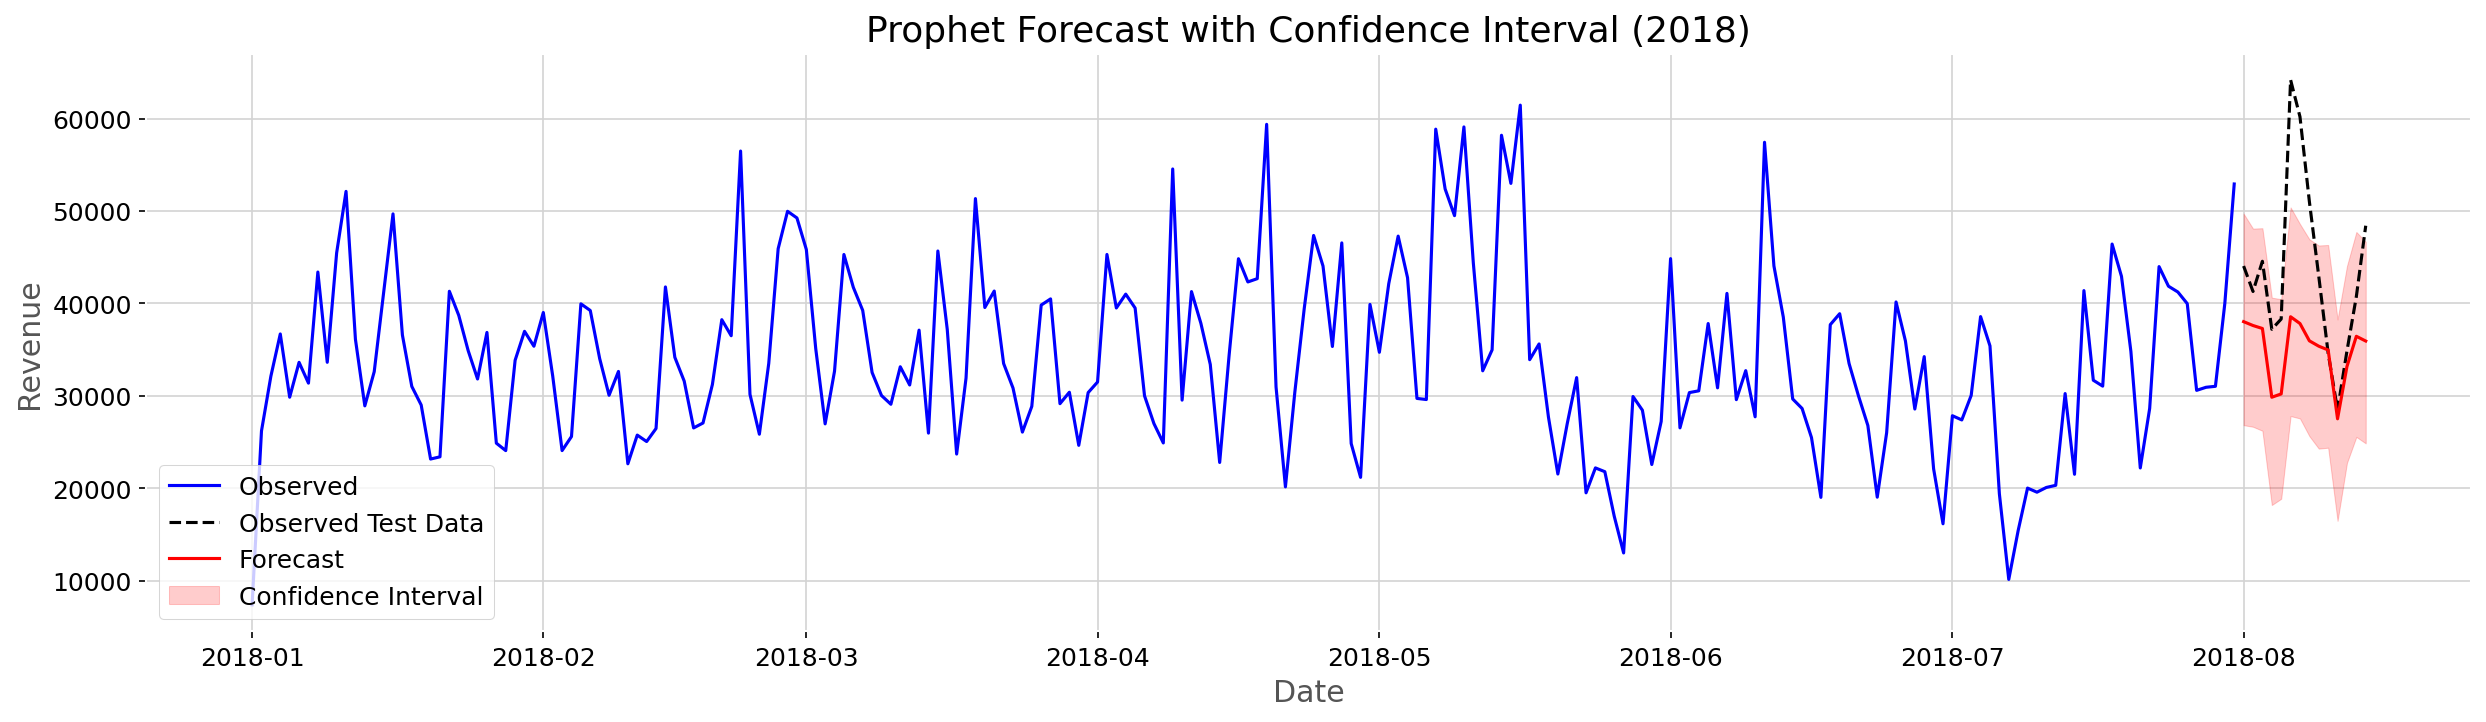

In [ ]:
import matplotlib.pyplot as plt

# Create Figure
fig, ax = plt.subplots()

# Time series data for 2018
observed_2018 = prophet_train.loc[prophet_train['ds'].dt.year == 2018]
ax.plot(observed_2018['ds'], observed_2018['y'], label='Observed', color='blue')

# Observed test data
ax.plot(prophet_test['ds'], prophet_test['y'], label='Observed Test Data', color='black', linestyle='--')

# Forecast for 2018
forecast_2018 = forecast_tuned.loc[forecast_tuned['ds'].dt.year == 2018]
ax.plot(forecast_2018['ds'], forecast_2018['yhat'], color='red', label='Forecast')

# Confidence interval for 2018
conf_int_2018 = forecast_tuned.loc[forecast_tuned['ds'].dt.year == 2018][['ds', 'yhat_lower', 'yhat_upper']]
ax.fill_between(conf_int_2018['ds'], conf_int_2018['yhat_lower'], conf_int_2018['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')

# Display the legend
ax.legend()

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.set_title('Prophet Forecast with Confidence Interval (2018)')

# Show the plot
plt.show()

## 5.6.7. Final Results

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Creating lists
forecast_values_list = [test_forecast, arima_forecast_values, sarima_forecast_values]
forecast_names = ['Auto ARIMA', 'ARIMA', 'SARIMA', 'XGBoost Regression', 'Prophet']

# Creating an empty dataframe to store results
final_results = pd.DataFrame(columns=['Forecast', 'MAE', 'RMSE', 'MAPE', 'Actual Sum', 'Predicted Sum', 'Difference', 'Relative Error'])

# Looping through forecast_values
for i, forecast_values in enumerate(forecast_values_list):
    y_true = np.array(df_test)
    y_pred = np.array(forecast_values)

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    actual_sum = df_test.sum()[0]
    predicted_sum = forecast_values.sum()
    difference = (actual_sum - predicted_sum)
    relative_error = (difference / actual_sum) * 100

    # Append results
    row = {
        'Forecast': forecast_names[i],
        'MAE': '${:,.2f}'.format(mae),
        'RMSE': '${:,.2f}'.format(rmse),
        'MAPE': '{:.2f}%'.format(mape),
        'Actual Sum': '${:,.2f}'.format(actual_sum),
        'Predicted Sum': '${:,.2f}'.format(predicted_sum),
        'Difference': '${:,.2f}'.format(difference),
        'Relative Error': '{:.2f}%'.format(relative_error)
    }
    final_results = pd.concat([final_results, pd.DataFrame(row, index=[0])], ignore_index=True)

# Transforming the dataframes to numpy array for XGBoost
y_true_xgboost = np.array(y_test)
y_pred_xgboost = np.array(y_test_pred)
xgboost_mae = mean_absolute_error(y_true_xgboost, y_pred_xgboost)
xgboost_rmse = np.sqrt(mean_squared_error(y_true_xgboost, y_pred_xgboost))
xgboost_mape = np.mean(np.abs((y_true_xgboost - y_pred_xgboost) / y_true_xgboost)) * 100
xgboost_actual_sum = y_test.sum()
xgboost_predicted_sum = y_test_pred.sum()
xgboost_difference = xgboost_actual_sum - xgboost_predicted_sum
xgboost_relative_error = xgboost_difference / xgboost_actual_sum

# Append results for XGBoost to the final_results dataframe
xgboost_row = {
    'Forecast': forecast_names[3],
    'MAE': '${:,.2f}'.format(xgboost_mae),
    'RMSE': '${:,.2f}'.format(xgboost_rmse),
    'MAPE': '{:.2f}%'.format(xgboost_mape),
    'Actual Sum': '${:,.2f}'.format(xgboost_actual_sum),
    'Predicted Sum': '${:,.2f}'.format(xgboost_predicted_sum),
    'Difference': '${:,.2f}'.format(xgboost_difference),
    'Relative Error': '{:.2f}%'.format(xgboost_relative_error)
}
final_results = pd.concat([final_results, pd.DataFrame(xgboost_row, index=[0])], ignore_index=True)

# Transforming the dataframes to numpy array for Prophet
y_true_prophet = np.array(prophet_test['y'])
y_pred_prophet = np.array(forecast_tuned['yhat'])
prophet_mae = mean_absolute_error(y_true_prophet, y_pred_prophet)
prophet_rmse = np.sqrt(mean_squared_error(y_true_prophet, y_pred_prophet))
prophet_mape = np.mean(np.abs((y_true_prophet - y_pred_prophet) / y_true_prophet)) * 100
prophet_actual_sum = prophet_test['y'].sum()
prophet_predicted_sum = forecast_tuned['yhat'].sum()
prophet_difference = prophet_actual_sum - prophet_predicted_sum
prophet_relative_error = prophet_difference / prophet_actual_sum

# Append results for Prophet to the final_results dataframe
prophet_row = {
    'Forecast': forecast_names[4],
    'MAE': '${:,.2f}'.format(prophet_mae),
    'RMSE': '${:,.2f}'.format(prophet_rmse),
    'MAPE': '{:.2f}%'.format(prophet_mape),
    'Actual Sum': '${:,.2f}'.format(prophet_actual_sum),
    'Predicted Sum': '${:,.2f}'.format(prophet_predicted_sum),
    'Difference': '${:,.2f}'.format(prophet_difference),
    'Relative Error': '{:.2f}%'.format(prophet_relative_error)
}
final_results = pd.concat([final_results, pd.DataFrame(prophet_row, index=[0])], ignore_index=True)

# Display the updated final_results dataframe
final_results

Forecast        MAE        RMSE    MAPE   Actual Sum  \
0          Auto ARIMA  $5,866.78   $8,476.18  17.81%  $610,866.45   
1               ARIMA  $8,102.43  $11,520.68  17.63%  $610,866.45   
2              SARIMA  $5,835.36   $8,392.28  18.22%  $610,866.45   
3  XGBoost Regression  $5,327.95   $7,331.83  11.00%  $610,866.45   
4             Prophet  $8,775.33  $11,473.70  17.83%  $610,866.45   

  Predicted Sum   Difference Relative Error  
0   $554,204.84   $56,661.61          9.28%  
1   $521,282.84   $89,583.61         14.67%  
2   $552,659.30   $58,207.15          9.53%  
3   $561,881.06   $48,985.39          0.08%  
4   $488,719.25  $122,147.20          0.20%

#6.Customer segment

##6.1 Xử lý từng bảng


###6.1.1. Order review


In [ ]:
def replace_na_with_text(df, column, new_text):
    '''replace missing text with preferred description'''

    # change missing data to appropriate label
    df[column] = df[column].replace(np.nan, new_text)

In [ ]:
replace_na_with_text(df=sm_reviews, column='review_comment_title', new_text='no title')
replace_na_with_text(df=sm_reviews, column='review_comment_message', new_text='no comment given')

In [ ]:
def timestamp_to_datetime(df, columns):

    for col in columns:
        df[col] = pd.to_datetime(df[col])

In [ ]:
columns = ['review_creation_date', 'review_answer_timestamp']
timestamp_to_datetime(sm_reviews, columns)

In [ ]:
def lowercase(df, columns):
    '''change all text to lowercase'''
    for col in columns:
        df[col] = df[col].str.lower()

In [ ]:
columns = ['review_comment_title', 'review_comment_title']
lowercase(sm_reviews, columns)

In [ ]:
sm_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4             no title   
1             5             no title   
2             5             no title   
3             5             no title   
4             5             no title   

                              review_comment_message review_creation_date  \
0                                   no comment given           2018-01-18   
1                                   no comment given           2018-03-10   
2                                   no comment given           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

###6.1.2.Order

In [ ]:
# drop rows containing NaN values, this corresponds to no delivery
sm_orders.dropna(inplace = True)

# drop canceled orders (3 remaining) and reset index
index_to_drop = sm_orders[sm_orders.order_status == 'canceled'].index
sm_orders.drop(index_to_drop, inplace=True)
sm_orders.reset_index(drop=True, inplace=True)

In [ ]:
columns_to_datetime = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', \
                          'order_delivered_customer_date', 'order_estimated_delivery_date']
timestamp_to_datetime(sm_orders, columns_to_datetime)

In [ ]:
sm_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 5.9+ MB


In [ ]:
sm_orders.describe(exclude=object).T

count                          mean  \
order_purchase_timestamp       96455 2018-01-02 00:26:23.673806336   
order_approved_at              96455 2018-01-02 10:43:03.401710592   
order_delivered_carrier_date   96455 2018-01-05 05:53:41.200134656   
order_delivered_customer_date  96455 2018-01-14 13:49:28.328526336   
order_estimated_delivery_date  96455 2018-01-25 18:04:03.421284864   

                                              min                     25%  \
order_purchase_timestamp      2016-09-15 12:16:38 2017-09-14 09:39:02.500   
order_approved_at             2016-09-15 12:16:38 2017-09-14 14:42:23.000   
order_delivered_carrier_date  2016-10-08 10:34:01 2017-09-18 17:06:18.500   
order_delivered_customer_date 2016-10-11 13:46:32 2017-09-25 22:56:47.000   
order_estimated_delivery_date 2016-10-04 00:00:00 2017-10-05 00:00:00.000   

                                              50%                     75%  \
order_purchase_timestamp      2018-01-20 20:00:12 2018-05-05 18:53:33.000   
order_approved_at             2018-01-22 13:49:24 2018-05-06 10:52:57.500   
order_delivered_carrier_date  2018-01-24 16:28:58 2018-05-08 14:34:30.000   
order_delivered_customer_date 2018-02-02 19:52:30 2018-05-15 23:09:15.500   
order_estimated_delivery_date 2018-02-16 00:00:00 2018-05-28 00:00:00.000   

                                              max  
order_purchase_timestamp      2018-08-29 15:00:37  
order_approved_at             2018-08-29 15:10:26  
order_delivered_carrier_date  2018-09-11 19:48:28  
order_delivered_customer_date 2018-10-17 13:22:46  
order_estimated_delivery_date 2018-10-25 00:00:00

In [ ]:
orders.describe(exclude='datetime').T

count unique                               top   freq
order_id      99441  99441  e481f51cbdc54678b7cc49136f2d6af7      1
customer_id   99441  99441  9ef432eb6251297304e76186b10a928d      1
order_status  99441      8                         delivered  96478

###6.1.3. Products

In [ ]:
sm_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
sm_products.tail()

product_id              product_category_name  \
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0

In [ ]:
sm_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# drop products with no description
sm_products.dropna(inplace = True)
sm_products.reset_index(drop = True, inplace = True)

In [ ]:
def translate_column_with_df(df_original, df_translation, column_original, column_translation):
    '''Translate column, given df with translation'''

    # convert translation to dictionary to extract key, value pairs
    df_translation = df_translation.set_index(column_original)
    df_translation = df_translation.to_dict('dict')

    # map translations
    df_original[column_original] = df_original[column_original]\
                                               .replace(df_translation[column_translation])

In [ ]:
translate_column_with_df(sm_products, sm_translation, 'product_category_name', 'product_category_name_english')

In [ ]:
sm_products.describe(exclude=float).T

count unique                               top  freq
product_id             32340  32340  1e9e8ef04dbcff4541ed26657ea517e5     1
product_category_name  32340     73                    bed_bath_table  3029

In [ ]:
sm_products.describe(exclude=object).T

count         mean          std  min    25%  \
product_name_lenght         32340.0    48.476592    10.245699  5.0   42.0   
product_description_lenght  32340.0   771.492393   635.124831  4.0  339.0   
product_photos_qty          32340.0     2.188961     1.736787  1.0    1.0   
product_weight_g            32340.0  2276.956586  4279.291845  0.0  300.0   
product_length_cm           32340.0    30.854545    16.955965  7.0   18.0   
product_height_cm           32340.0    16.958813    13.636115  2.0    8.0   
product_width_cm            32340.0    23.208596    12.078762  6.0   15.0   

                              50%     75%      max  
product_name_lenght          51.0    57.0     76.0  
product_description_lenght  595.0   972.0   3992.0  
product_photos_qty            1.0     3.0     20.0  
product_weight_g            700.0  1900.0  40425.0  
product_length_cm            25.0    38.0    105.0  
product_height_cm            13.0    21.0    105.0  
product_width_cm             20.0    30.0    118.0

###6.1.4.Seller

In [ ]:
sm_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:
sm_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


###6.1.5.Customer

In [ ]:
sm_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

###6.1.6.Order item

In [ ]:
timestamp_to_datetime(sm_order_items, ['shipping_limit_date'])

In [ ]:

sm_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [ ]:
sm_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


###6.1.7.Location

In [ ]:
sm_location.drop_duplicates(subset = ['geolocation_zip_code_prefix'], keep = 'first', inplace = True)

In [ ]:
sm_location.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 999846
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 891.3+ KB


###6.1.8.Payments

In [ ]:
sm_payments = dataframes['order_payment']
sm_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [ ]:
sm_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


##6.2. Data integration


In [ ]:
def merge_multiple_df_on_key(dfs, key):

    from functools import reduce

    new_df = reduce(lambda left,right: pd.merge(left,right, how = 'inner', on=key), dfs)

    return new_df

In [ ]:
sm_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [ ]:
sm_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
# dfs to merge with order_id column
dfs = [sm_orders, sm_order_items, sm_reviews]
# merge on key
customer_purchases = merge_multiple_df_on_key(dfs, key = 'order_id')

In [ ]:
customer_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109989 entries, 0 to 109988
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109989 non-null  object        
 1   customer_id                    109989 non-null  object        
 2   order_status                   109989 non-null  object        
 3   order_purchase_timestamp       109989 non-null  datetime64[ns]
 4   order_approved_at              109989 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109989 non-null  datetime64[ns]
 6   order_delivered_customer_date  109989 non-null  datetime64[ns]
 7   order_estimated_delivery_date  109989 non-null  datetime64[ns]
 8   order_item_id                  109989 non-null  int64         
 9   product_id                     109989 non-null  object        
 10  seller_id                      109989 non-null  object        
 11  

In [ ]:
def drop_duplicates_ignore_cols(df, cols_to_ignore, keep = 'first'):
    '''drop duplicates but ignore certain columns'''
    df.drop_duplicates(keep = keep, \
                       subset=df.columns.difference(cols_to_ignore), \
                       inplace=True)

In [ ]:
# drop duplicate rows based on all columns except these
cols_to_ignore = ['review_id', 'review_answer_timestamp', 'review_creation_date']

# call function
drop_duplicates_ignore_cols(customer_purchases, cols_to_ignore)

In [ ]:
cols_to_drop = sm_orders.columns.difference(['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
customer_purchases = customer_purchases.drop(cols_to_drop, axis=1)

In [ ]:
# Đặt các cột cần loại bỏ sau khi kết hợp với vị trí và khách hàng
cols_to_drop = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']

# Kết hợp với khách hàng và vị trí
customer_info = pd.merge(pd.merge(customer_purchases, sm_customers, on='customer_id'),
                         sm_location, left_on='customer_zip_code_prefix',
                         right_on='geolocation_zip_code_prefix', how='left')

# Loại bỏ các cột không cần thiết từ DataFrame customer_info
customer_info.drop(columns=cols_to_drop, inplace=True)

# Đặt lại chỉ số của DataFrame
customer_info.reset_index(drop=True, inplace=True)


In [ ]:
# need to merge product info to pull the product_category_name
customer_info = customer_info.merge(sm_products, on ='product_id')

In [ ]:
# merge all dfs associated with seller
seller_info = pd.merge(pd.merge(pd.merge(pd.merge(sm_order_items, \
                        sm_sellers, on = 'seller_id'), \
                        sm_products, on = 'product_id'), \
                        sm_reviews, on = 'order_id'), \
                        sm_location, how = 'inner', \
                                  left_on ='seller_zip_code_prefix', \
                                  right_on = 'geolocation_zip_code_prefix')

In [ ]:
cols_to_drop = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state', 'freight_value']
seller_info = seller_info.drop(cols_to_drop, axis=1)
seller_info.reset_index(drop=True, inplace=True)


In [ ]:
cols_to_ignore = ['review_id', 'review_answer_timestamp', 'review_creation_date']
drop_duplicates_ignore_cols(seller_info, cols_to_ignore)

In [ ]:
seller_info.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  130898c0987d1801452a8ed92a670612              1   
2  532ed5e14e24ae1f0d735b91524b98b9              1   
3  6f8c31653edb8c83e1a739408b5ff750              1   
4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

  shipping_limit_date  price  seller_zip_code_prefix    seller_city  \
0 2017-09-19 09:45:35   58.9                   27277  volta redonda   
1 2017-07-05 02:44:11   55.9                   27277  volta redonda   
2 2018-05-23 10:56:25   64.9                   27277  volta redonda   
3 2017-08-07 18:55:08   58.9                   27277  volta redonda   
4 2017-08-16 22:05:11   58.9                   27277  volta redonda   

  seller_state product_category_name  ...  product_height_cm  \
0           SP            cool_stuff  ...                9.0   
1           SP            cool_stuff  ...                9.0   
2           SP            cool_stuff  ...                9.0   
3           SP            cool_stuff  ...                9.0   
4           SP            cool_stuff  ...                9.0   

   product_width_cm                         review_id  review_score  \
0              14.0  97ca439bc427b48bc1cd7177abe71365             5   
1              14.0  b11cba360bbe71410c291b764753d37f             5   
2              14.0  af01c4017c5ab46df6cc810e069e654a             4   
3              14.0  8304ff37d8b16b57086fa283fe0c44f8             5   
4              14.0  426f43a82185969503fb3c86241a9535             5   

   review_comment_title                             review_comment_message  \
0              no title     Perfeito, produto entregue antes do combinado.   
1              no title  lannister como sempre, entregou certinho e den...   
2       super recomendo                              carrinho muito bonito   
3              no title                                   no comment given   
4              no title                                   no comment given   

   review_creation_date review_answer_timestamp  geolocation_lat  \
0            2017-09-21     2017-09-22 10:57:03       -22.498183   
1            2017-07-14     2017-07-17 12:50:07       -22.498183   
2            2018-06-05     2018-06-06 21:41:12       -22.498183   
3            2017-08-10     2017-08-13 03:35:17       -22.498183   
4            2017-08-25     2017-08-28 00:51:18       -22.498183   

  geolocation_lng  
0      -44.123614  
1      -44.123614  
2      -44.123614  
3      -44.123614  
4      -44.123614  

[5 rows x 25 columns]

In [ ]:
# set dfs to have common orders between them
sm_sellers = seller_info[seller_info.order_id.isin(customer_info.order_id)]
sm_customers = customer_info[customer_info.order_id.isin(seller_info.order_id)]

In [ ]:
sm_sellers = sm_sellers.dropna(subset = ['product_category_name']).reset_index(drop=True)
sm_customers = sm_customers.dropna(subset=['product_category_name']).reset_index(drop=True)

In [ ]:
datetime_cols = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

for col in datetime_cols:
    sm_sellers[col] = sm_sellers[col].astype('object')

In [ ]:
datetime_cols = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp',\
                'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in datetime_cols:
    sm_customers[col] = sm_customers[col].astype('object')

In [ ]:
# Đường dẫn đến thư mục chứa tệp CSV
directory_sm = '/content/sample_data/data_segment'

# Tạo thư mục nếu nó không tồn tại
os.makedirs(directory_sm, exist_ok=True)

# Lưu DataFrame vào tệp CSV
sm_customers.to_csv('/content/sample_data/data_segment/customers.csv', index=True)
sm_sellers.to_csv('/content/sample_data/data_segment/sellers.csv', index=True)


##6.3. Master df

In [ ]:
seller_dt_cols = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']
customer_dt_cols = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp',\
                'order_delivered_customer_date', 'order_estimated_delivery_date']

sm_customers = pd.read_csv('/content/sample_data/data_segment/customers.csv',
                        index_col=0, delimiter = ',',
                        parse_dates = customer_dt_cols,
                        infer_datetime_format = True,
                        low_memory=False)



In [ ]:
sellers_selected = sm_sellers[['order_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']]

In [ ]:
master_df = sm_customers.merge(sellers_selected, on ='order_id', ).drop(['order_delivered_customer_date',
                                                          'order_estimated_delivery_date', 'shipping_limit_date',
                                                         'freight_value', 'review_comment_title', 'review_creation_date',
                                                          'review_answer_timestamp', 'geolocation_lat', 'geolocation_lng',
                                                         'product_name_lenght', 'product_description_lenght', 'product_length_cm',
                                                          'product_height_cm', 'product_width_cm', 'review_id'], axis=1)

In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151461 entries, 0 to 151460
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  151461 non-null  object        
 1   customer_id               151461 non-null  object        
 2   order_purchase_timestamp  151461 non-null  datetime64[ns]
 3   order_item_id             151461 non-null  int64         
 4   product_id                151461 non-null  object        
 5   seller_id                 151461 non-null  object        
 6   price                     151461 non-null  float64       
 7   review_score              151461 non-null  int64         
 8   review_comment_message    151461 non-null  object        
 9   customer_unique_id        151461 non-null  object        
 10  customer_zip_code_prefix  151461 non-null  int64         
 11  customer_city             151461 non-null  object        
 12  cu

In [ ]:
master_df.to_csv('/content/sample_data/data_segment/master_df.csv', index=True)

##6.4.Clustering

In [ ]:
master_df = pd.read_csv('/content/sample_data/data_segment/master_df.csv', index_col=0)

In [ ]:
master_df = master_df.drop_duplicates(['order_id', 'order_item_id']).dropna().reset_index(drop=True)

In [ ]:
master_df.product_category_name.value_counts()[:20]

product_category_name
bed_bath_table              10830
health_beauty                9402
sports_leisure               8375
furniture_decor              8075
computers_accessories        7607
housewares                   6747
watches_gifts                5813
telephony                    4387
garden_tools                 4239
auto                         4098
toys                         3975
cool_stuff                   3652
perfumery                    3329
baby                         2958
electronics                  2624
stationery                   2444
fashion_bags_accessories     1975
pet_shop                     1898
office_furniture             1654
consoles_games               1079
Name: count, dtype: int64

###6.4.1. Create user product interaction

In [ ]:
item_features = master_df[['customer_unique_id', 'customer_id','product_id', 'order_id', 'product_category_name', 'order_item_id', 'seller_id', 'review_score',
                          'review_comment_message', 'seller_city', 'seller_state', 'price']]

In [ ]:
# Create product_count column for the rating
item_features['product_category_count'] = item_features[['product_category_name', 'customer_unique_id', 'order_item_id']]\
                                                            .groupby(['customer_unique_id', 'product_category_name'])['order_item_id']\
                                                            .transform('count')

In [ ]:
user_to_product_category = item_features[['product_category_name', 'customer_unique_id', 'product_category_count']]\
                                        .sort_values(by='customer_unique_id')\
                                        .reset_index(drop=True)

In [ ]:
user_to_product_category['product_count'] = 1

In [ ]:
user_to_product_category = user_to_product_category.drop(['product_category_count'], axis=1)

In [ ]:
def get_user_list(df, user_column):
    """

    creating a list of user from dataframe df, user_column is a column
    consisting of users in the dataframe df

    """

    return np.sort(df[user_column].unique())

def get_item_list(df, item_name_column):

    """

    creating a list of items from dataframe df, item_column is a column
    consisting of items in the dataframe df

    return to item_id_list and item_id2name_mapping

    """

    item_list = df[item_name_column].unique()


    return item_list

In [ ]:
def id_mappings(user_list, item_list):
    """

    Create id mappings to convert user_id, item_id, and feature_id

    """
    user_to_index_mapping = {}
    index_to_user_mapping = {}
    for user_index, user_id in enumerate(user_list):
        user_to_index_mapping[user_id] = user_index
        index_to_user_mapping[user_index] = user_id

    item_to_index_mapping = {}
    index_to_item_mapping = {}
    for item_index, item_id in enumerate(item_list):
        item_to_index_mapping[item_id] = item_index
        index_to_item_mapping[item_index] = item_id


    return user_to_index_mapping, index_to_user_mapping, \
           item_to_index_mapping, index_to_item_mapping

In [ ]:
from scipy import sparse
def get_interaction_matrix(df, df_column_as_row, df_column_as_col, df_column_as_value, row_indexing_map,
                          col_indexing_map):

    row = df[df_column_as_row].apply(lambda x: row_indexing_map[x]).values
    col = df[df_column_as_col].apply(lambda x: col_indexing_map[x]).values
    value = df[df_column_as_value].values

    return sparse.coo_matrix((value, (row, col)), shape = (len(row_indexing_map), len(col_indexing_map)))

In [ ]:
user_list = get_user_list(user_to_product_category, 'customer_unique_id')
item_list = get_item_list(user_to_product_category, 'product_category_name')

In [ ]:
user_to_index_mapping, index_to_user_mapping, \
           item_to_index_mapping, index_to_item_mapping = id_mappings(user_list, item_list)

In [ ]:
user_to_product_category_interaction = get_interaction_matrix(user_to_product_category, "customer_unique_id",
                                                           "product_category_name", "product_count",
                                                           user_to_index_mapping, item_to_index_mapping)

In [ ]:
product_category_to_user_interaction = get_interaction_matrix(user_to_product_category, "product_category_name",
                                                             "customer_unique_id", "product_count",
                                                             item_to_index_mapping, user_to_index_mapping)

###6.4.2. User clustering

In [ ]:
table = pd.DataFrame(user_to_product_category_interaction.todense())

In [ ]:
table1 = pd.DataFrame(product_category_to_user_interaction.todense())

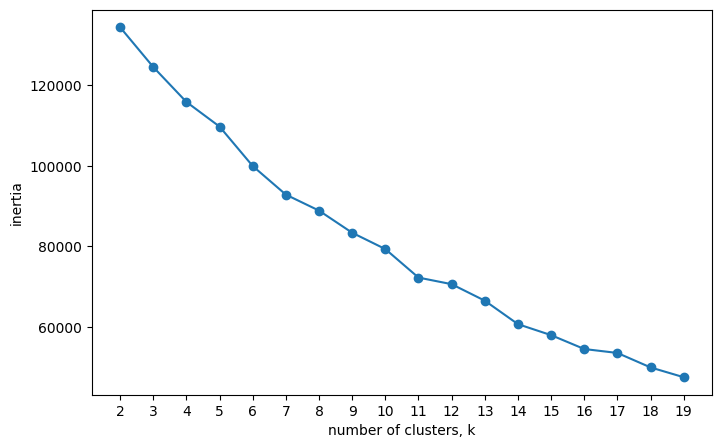

In [ ]:
from sklearn.cluster import KMeans

# Create table of values only
x_cols = table.values
ks = range(2, 20)
inertias = []

for k in ks:
    # create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters = k, random_state=3)
    # fit model to samples
    kmeans.fit(x_cols)
    # append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

# plot ks vs inertias
plt.figure(figsize=(8,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

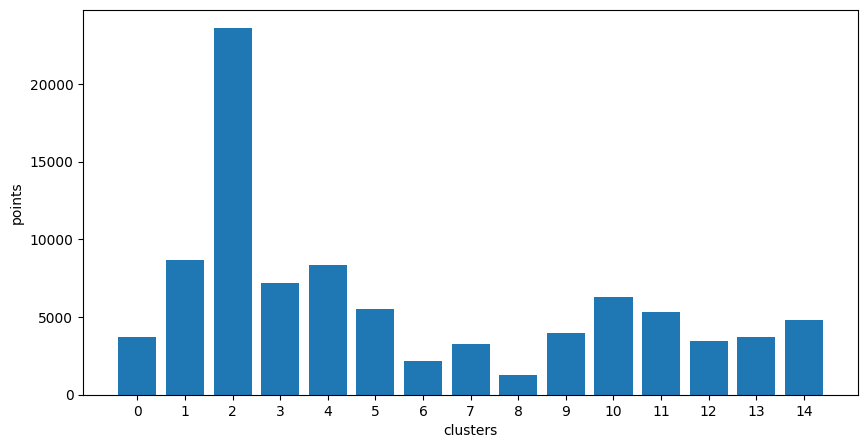

In [ ]:
x_cols = table.values
# create a KMeans instance with k clusters
model = KMeans(n_clusters = 15, random_state=3)
# fit model to samples
model.fit(x_cols)
# Create labels for data
labels = model.predict(x_cols)

# create bar chart
clusters, npoints = np.unique(labels, return_counts=True)
plt.figure(figsize=(10,5))
plt.bar(clusters, npoints)
plt.xticks(clusters)
plt.ylabel('points')
plt.xlabel('clusters')
plt.show()

In [ ]:
labels = pd.DataFrame({'cluster_id': labels})

In [ ]:
table.index.name = 'customer_unique_id'

In [ ]:
table = table.reset_index()

In [ ]:
df = pd.concat([table.customer_unique_id, \
                labels], axis=1, sort=False)

In [ ]:
df = df.replace({"customer_unique_id": index_to_user_mapping})

In [ ]:
df.head()

customer_unique_id  cluster_id
0  0000366f3b9a7992bf8c76cfdf3221e2           1
1  0000b849f77a49e4a4ce2b2a4ca5be3f           4
2  0000f46a3911fa3c0805444483337064           6
3  0000f6ccb0745a6a4b88665a16c9f078           9
4  0004aac84e0df4da2b147fca70cf8255           9

In [ ]:
item_features_clustered = item_features.merge(df, on = 'customer_unique_id')

In [ ]:
item_features_clustered.to_csv('/content/sample_data/data_segment/item_features_clustered.csv')

In [ ]:
item_features_clustered.head()

customer_unique_id                       customer_id  \
0  7c396fd4830fd04220f754e42b4e5bff  9ef432eb6251297304e76186b10a928d   
1  7c396fd4830fd04220f754e42b4e5bff  31f31efcb333fcbad2b1371c8cf0fa84   
2  3a51803cc0d012c3b5dc8b7528cb05f7  a20e8105f23924cd00833fd87daa0831   
3  ef0996a1a279c26e7ecbd737be23d235  26c7ac168e1433912a51b924fbd34d34   
4  e781fdcc107d13d865fc7698711cc572  53904ddbea91e1e92b2b3f1d09a7af86   

                         product_id                          order_id  \
0  87285b34884572647811a353c7ac498a  e481f51cbdc54678b7cc49136f2d6af7   
1  9abb00920aae319ef9eba674b7d2e6ff  69923a4e07ce446644394df37a710286   
2  87285b34884572647811a353c7ac498a  128e10d95713541c87cd1a2e48201934   
3  87285b34884572647811a353c7ac498a  0e7e841ddf8f8f2de2bad69267ecfbcf   
4  87285b34884572647811a353c7ac498a  bfc39df4f36c3693ff3b63fcbea9e90a   

  product_category_name  order_item_id                         seller_id  \
0            housewares              1  3504c0cb71d7fa48d967e0e4c94d59d9   
1                  baby              1  1771297ac436903d1dd6b0e9279aa505   
2            housewares              1  3504c0cb71d7fa48d967e0e4c94d59d9   
3            housewares              1  3504c0cb71d7fa48d967e0e4c94d59d9   
4            housewares              1  3504c0cb71d7fa48d967e0e4c94d59d9   

   review_score                             review_comment_message  \
0             4  Não testei o produto ainda, mas ele veio corre...   
1             5  O produto está ok e foi entregue bem antes do ...   
2             4  Deveriam embalar melhor o produto. A caixa vei...   
3             5  Só achei ela pequena pra seis xícaras ,mais é ...   
4             3                                   no comment given   

  seller_city seller_state  price  product_category_count  cluster_id  
0        maua           SP  29.99                       1           5  
1   guarulhos           SP  35.39                       1           5  
2        maua           SP  29.99                       1           5  
3        maua           SP  29.99                       1           5  
4        maua           SP  29.99                       1           5

In [ ]:
item_features_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107577 entries, 0 to 107576
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_unique_id      107577 non-null  object 
 1   customer_id             107577 non-null  object 
 2   product_id              107577 non-null  object 
 3   order_id                107577 non-null  object 
 4   product_category_name   107577 non-null  object 
 5   order_item_id           107577 non-null  int64  
 6   seller_id               107577 non-null  object 
 7   review_score            107577 non-null  int64  
 8   review_comment_message  107577 non-null  object 
 9   seller_city             107577 non-null  object 
 10  seller_state            107577 non-null  object 
 11  price                   107577 non-null  float64
 12  product_category_count  107577 non-null  int64  
 13  cluster_id              107577 non-null  int32  
dtypes: float64(1), int32

In [ ]:
# Tính toán trung bình cho các thuộc tính số cho mỗi nhóm
grouped_data = item_features_clustered.groupby('cluster_id').agg({
    'review_score': 'mean',
    'price': 'mean',
}).reset_index()

# Hiển thị dữ liệu đã tính toán
display(grouped_data)


cluster_id  review_score       price
0            0      4.110739  138.881028
1            1      3.926151   94.016548
2            2      4.121614  135.195978
3            3      4.163348  113.022910
4            4      4.190096  129.754280
5            5      4.113687   91.303136
6            6      4.240532   90.700222
7            7      4.079022  110.523308
8            8      3.647529   67.563948
9            9      3.997988   70.583579
10          10      3.986040  116.229710
11          11      4.070724  197.553011
12          12      4.172669  162.159936
13          13      4.196889  115.193072
14          14      4.138830  101.094935

In [ ]:
most_common_categories = item_features_clustered.groupby('cluster_id')['product_category_name'].value_counts()
most_common_categories = most_common_categories.groupby(level=0).head(1)
display(most_common_categories)



cluster_id  product_category_name
0           auto                      4067
1           bed_bath_table           10549
2           perfumery                 3224
3           sports_leisure            8250
4           health_beauty             9313
5           housewares                6587
6           stationery                2409
7           garden_tools              4120
8           furniture_decor           3201
9           telephony                 4367
10          computers_accessories     7494
11          watches_gifts             5749
12          cool_stuff                3625
13          toys                      3948
14          furniture_decor           4815
Name: count, dtype: int64

In [ ]:
# Nhóm dữ liệu theo cluster_id và tính toán số lượng xuất hiện của mỗi trạng thái của người bán trong mỗi nhóm
most_common_states = item_features_clustered.groupby('cluster_id')['seller_state'].value_counts()

# Lấy ra trạng thái của người bán xuất hiện nhiều nhất trong mỗi nhóm
most_common_states = most_common_states.groupby(level=0).head(1)

# In ra trạng thái của người bán xuất hiện nhiều nhất trong mỗi nhóm
display(most_common_states)


cluster_id  seller_state
0           SP               3294
1           SP               9616
2           SP              18639
3           SP               5334
4           SP               6310
5           SP               4831
6           SP               1929
7           SP               3009
8           SP               2782
9           SP               3850
10          SP               3190
11          SP               4756
12          SP               2763
13          SP               2857
14          SP               3673
Name: count, dtype: int64

In [ ]:
# Đếm số lượng khách hàng trong mỗi cụm
customer_counts_per_cluster = df['cluster_id'].value_counts()

# Hiển thị số lượng khách hàng trong mỗi cụm
print(customer_counts_per_cluster)

cluster_id
2     23600
1      8655
4      8366
3      7174
10     6262
5      5488
11     5317
14     4815
9      3991
0      3720
13     3686
12     3464
7      3286
6      2198
8      1258
Name: count, dtype: int64


#7.Recommendation system


In [ ]:
def sample_hyperparameters():
    """
    Yield possible hyperparameter choices.
    """

    while True:
        yield {
            "no_components": np.random.randint(16, 64),
            "learning_schedule": np.random.choice(["adagrad", "adadelta"]),
            "loss": np.random.choice(["bpr", "warp", "warp-kos"]),
            "learning_rate": np.random.exponential(0.05),
            "item_alpha": np.random.exponential(1e-8),
            "user_alpha": np.random.exponential(1e-8),
            "max_sampled": np.random.randint(5, 15),
            "num_epochs": np.random.randint(5, 50),
        }


def random_search(test, train, user_features, item_features, num_samples=10):
    """
    Sample random hyperparameters, fit a LightFM model, and evaluate it
    on the test set.

    Parameters
    ----------

    train: np.float32 coo_matrix of shape [n_users, n_items]
        Training data.
    test: np.float32 coo_matrix of shape [n_users, n_items]
        Test data.
    num_samples: int, optional
        Number of hyperparameter choices to evaluate.


    Returns
    -------

    generator of (auc_score, hyperparameter dict, fitted model)

    """

    for hyperparams in itertools.islice(sample_hyperparameters(), num_samples):
        num_epochs = hyperparams.pop("num_epochs")

        model = LightFM(**hyperparams)
        model.fit(train, epochs=num_epochs, num_threads=1)

        score = auc_score(model,
                          test_interactions=test,
                          user_features = user_features,
                          item_features = item_features,
                          num_threads=1).mean()

        hyperparams["num_epochs"] = num_epochs

        yield (score, hyperparams, model)

##7.1. Preprocessing

###7.1.1. Create feature item

In [ ]:
user_item = master_df[['customer_id', 'customer_unique_id', 'product_id', 'review_score', 'order_purchase_timestamp']]
user_features = master_df[['customer_unique_id', 'customer_city', 'customer_state']]
item_features = master_df[['customer_unique_id','product_id', 'customer_id', 'product_category_name', 'seller_id', 'review_score',
                          'review_comment_message', 'seller_city', 'seller_state', 'price', 'order_id', 'order_item_id']]

NameError: name 'master_df' is not defined

In [ ]:
item_features = item_features.drop_duplicates(['customer_id','order_id', 'order_item_id']).reset_index(drop=True)

In [ ]:
# to avoid counting a review comment labeled 'no comment given', we will convert them back to NAN
item_features['review_comment_message'] = item_features.review_comment_message\
                                                               .replace('no comment given', np.nan)

# create average review score column
item_features['avg_product_score'] = item_features['review_score']\
                                                                 .groupby(item_features['product_id'])\
                                                                 .transform('mean')
# create average review score column
item_features['avg_seller_score'] = item_features['review_score']\
                                                                 .groupby(item_features['seller_id'])\
                                                                 .transform('mean')

# create average review score column
item_features['num_comments'] = item_features['review_comment_message']\
                                                                       .groupby(item_features['product_id'])\
                                                                       .transform('count')

# create average review score column
item_features['num_reviews'] = item_features['review_score']\
                                                            .groupby(item_features['product_id'])\
                                                            .transform('count')

In [ ]:
# create average price column
item_features['avg_price'] = item_features[['price']]\
                                                     .groupby(item_features['product_id'])\
                                                     .transform('mean')

In [ ]:
# Create product_count column for the rating
item_features['product_count'] = item_features['product_id']\
                                                            .groupby(item_features['customer_unique_id'])\
                                                            .transform('count')

In [ ]:
item_features['log_avg_price'] = np.log1p(item_features['avg_price'])

In [ ]:
item_features['log_num_reviews'] = np.log1p(item_features['num_reviews'])
item_features['log_num_comments'] = np.log1p(item_features['num_comments'])

In [ ]:
# use cut to group the same number of reviews in each section
item_features['num_reviews_binned'] = pd.cut(item_features['log_num_reviews'], 7, duplicates = 'drop')
item_features['num_comments_binned'] = pd.cut(item_features['log_num_comments'], 6, duplicates = 'drop')

#
item_features['avg_product_reviews_binned'] = pd.cut(item_features['avg_product_score'], 4, duplicates = 'drop')
item_features['avg_seller_reviews_binned'] = pd.cut(item_features['avg_seller_score'], 4, duplicates = 'drop')

item_features['avg_price_binned'] = pd.qcut(item_features['avg_price'], 4, duplicates = 'drop')

In [ ]:
item_features = item_features.sort_values('customer_unique_id').reset_index(drop=True)

In [ ]:
cols = ['num_reviews_binned', 'num_comments_binned','avg_product_reviews_binned',
        'avg_seller_reviews_binned', 'avg_price_binned']
for col in cols:
    item_features[col] = item_features[col].astype(str)

In [ ]:
item_features.to_csv('/content/sample_data/data_segment/item_features.csv', index=True)

NameError: name 'item_features' is not defined

In [ ]:
item_features.head()

###7.1.2.Functions for creating lists that will later be transformed into sparse matrices

In [ ]:
def get_user_list(df, user_column):
    """

    creating a list of user from dataframe df, user_column is a column
    consisting of users in the dataframe df

    """

    return np.sort(df[user_column].unique())

def get_item_list(df, item_name_column):

    """

    creating a list of items from dataframe df, item_column is a column
    consisting of items in the dataframe df

    return to item_id_list and item_id2name_mapping

    """

    item_list = df[item_name_column].unique()


    return item_list

def get_item_feature_list(df, product_category_col, seller_col, seller_rating_col, product_rating_col,
                          num_comments, num_reviews, avg_price, seller_city, seller_state):

    categories = df[product_category_col]
    sellers = df[seller_col]
    seller_ratings = df[seller_rating_col]
    product_ratings = df[product_rating_col]
    num_product_comments = df[num_comments]
    num_product_reviews = df[num_reviews]
    avg_product_price = df[avg_price]
    seller_city = df[seller_city]
    seller_state = df[seller_state]

    return pd.concat([categories, sellers, seller_ratings, product_ratings, num_product_comments,
                      num_product_reviews, avg_product_price, seller_city, seller_state], ignore_index = True).unique()

def get_user_feature_list(df, cluster_id, customer_state):

    customer_state = df[customer_state]
    cluster_id = df[cluster_id]

    return pd.concat([cluster_id, customer_state], ignore_index = True).unique()

###7.1.3. Add clustered groupings to user_features

In [ ]:
# read in results from clustering
item_features_clustered = pd.read_csv('/content/sample_data/data_segment/item_features_clustered.csv', index_col = 0)

In [ ]:
# merge with user_features
user_features = pd.merge(user_features, item_features_clustered[['customer_unique_id', 'cluster_id']],
        on = 'customer_unique_id',
        how='left').drop('customer_city', axis=1)

In [ ]:
# drop duplicates from unaligned rows
user_features = user_features.dropna()

In [ ]:
# create the user, item, feature lists
users = get_user_list(user_item, "customer_unique_id")
items = get_item_list(item_features, "product_id")
item_features_list = get_item_feature_list(item_features, "product_category_name", "seller_id", "avg_seller_reviews_binned",
                                           "avg_product_reviews_binned", "num_comments_binned", "num_reviews_binned",
                                           "avg_price_binned", "seller_city", "seller_state")
user_features_list = get_user_feature_list(user_features, "cluster_id", "customer_state")

In [ ]:
item_features_clustered.head()

###7.1.4.Id-mapping function for converting string id into numeric for products, customers and features

In [ ]:
def id_mappings(user_list, item_list, item_feature_list, user_feature_list):
    """

    Create id mappings to convert user_id, item_id, and feature_id

    """
    user_to_index_mapping = {}
    index_to_user_mapping = {}
    for user_index, user_id in enumerate(user_list):
        user_to_index_mapping[user_id] = user_index
        index_to_user_mapping[user_index] = user_id

    item_to_index_mapping = {}
    index_to_item_mapping = {}
    for item_index, item_id in enumerate(item_list):
        item_to_index_mapping[item_id] = item_index
        index_to_item_mapping[item_index] = item_id

    item_feature_to_index_mapping = {}
    index_to_item_feature_mapping = {}
    for item_feature_index, item_feature_id in enumerate(item_feature_list):
        item_feature_to_index_mapping[item_feature_id] = item_feature_index
        index_to_item_feature_mapping[item_feature_index] = item_feature_id

    user_feature_to_index_mapping = {}
    index_to_user_feature_mapping = {}
    for user_feature_index, user_feature_id in enumerate(user_feature_list):
        user_feature_to_index_mapping[user_feature_id] = user_feature_index
        index_to_user_feature_mapping[user_feature_index] = user_feature_id


    return user_to_index_mapping, index_to_user_mapping, \
           item_to_index_mapping, index_to_item_mapping, \
           item_feature_to_index_mapping, index_to_item_feature_mapping, \
           user_feature_to_index_mapping, index_to_user_feature_mapping

In [ ]:
# generate mapping, LightFM library can't read other than (integer) index
user_to_index_mapping, index_to_user_mapping, \
           item_to_index_mapping, index_to_item_mapping, \
           item_feature_to_index_mapping, index_to_item_feature_mapping, \
           user_feature_to_index_mapping, index_to_user_feature_mapping = id_mappings(users, items, item_features_list,
                                                                            user_features_list)

In [ ]:
# df of product features
product_to_feature = item_features[['product_id', 'product_category_name', 'seller_id', 'num_reviews_binned',
                                    'num_comments_binned', 'avg_product_reviews_binned', 'avg_seller_reviews_binned',
                                    'avg_price_binned', 'seller_city', 'seller_state']]
product_to_feature = product_to_feature.drop_duplicates('product_id').reset_index(drop=True)

In [ ]:
# user rating df based on number of purchases
user_to_product_rating = item_features[['customer_unique_id', 'product_id', 'product_count']]
user_to_product_rating = user_to_product_rating.sort_values(by='customer_unique_id').reset_index(drop=True)

In [ ]:
import random
np.random.seed(31)

rows = np.random.binomial(1, .8, size=len(user_to_product_rating)).astype('bool')

user_to_product_rating_train = user_to_product_rating[rows].reset_index(drop=True)
user_to_product_rating_test = user_to_product_rating[~rows].reset_index(drop=True)

In [ ]:
# Transpose product_to_feature to extract features for each product_id
df = product_to_feature.set_index('product_id').T.reset_index(drop=True)

In [ ]:
# Need to create list of product_id's repeated 6 times for each feauture the resulting df will hold
cols = list(df.columns)
res =  [ele for ele in cols for i in range(len(product_to_feature.columns) - 1)]

In [ ]:
# Create empty dataframe with index as product_id
features = pd.DataFrame(index = res)
features.index.name = 'product_id'

# Reset index so 'product_id' becomes column
features = features.reset_index()

# create empty column to fill
features['feature'] = ""

In [ ]:
# Create list of feature items to replace empty column
feature_items = []
for col in cols:
    for i in range(len(product_to_feature.columns) - 1):
        feature_items.append(df[col][i])

In [ ]:
# set column to list created for each users features
features['feature'] = feature_items

# change name back to product_to_feature
product_to_feature = features

# add column with all ones for sparse matrix
product_to_feature['feature_count'] = 1

In [ ]:
product_to_feature.head(10)

In [ ]:
user_to_feature = user_features.drop_duplicates('customer_unique_id').reset_index(drop=True)

In [ ]:
# Transpose product_to_feature to extract features for each customer
df = user_to_feature.set_index('customer_unique_id').T.reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
# Need to create list of product_id's repeated 6 times for each feauture the resulting df will hold
cols = list(df.columns)
res =  [ele for ele in cols for i in range(len(user_to_feature.columns)-1)]

In [ ]:
# Create empty dataframe with index as product_id
user_feature = pd.DataFrame(index = res)
user_feature.index.name = 'customer_unique_id'

# Reset index so 'product_id' becomes column
user_feature = user_feature.reset_index()

# create empty column to fill
user_feature['feature'] = ""

In [ ]:
# Create list of feature items to replace empty column
feature_items = []
for col in cols:
    for i in range(len(user_to_feature.columns)-1):
        feature_items.append(df[col][i])

In [ ]:
user_feature['feature'] = feature_items
user_to_feature = user_feature
user_to_feature['feature_count'] = 1

In [ ]:
# 9 total features for each product
product_to_feature.head(9)

In [ ]:
# two features for each user
user_to_feature.head(2)

In [ ]:
# count for each user for the products they purchased
user_to_product_rating_train.head()

In [ ]:
user_to_product_rating_test.head()

In [ ]:
from scipy import sparse

def get_interaction_matrix(df, df_column_as_row, df_column_as_col, df_column_as_value, row_indexing_map,
                          col_indexing_map):

    row = df[df_column_as_row].apply(lambda x: row_indexing_map[x]).values
    col = df[df_column_as_col].apply(lambda x: col_indexing_map[x]).values
    value = df[df_column_as_value].values

    return sparse.coo_matrix((value, (row, col)), shape = (len(row_indexing_map), len(col_indexing_map)))

In [ ]:
# generate user_item_interaction_matrix for train data
user_to_product_interaction_train = get_interaction_matrix(user_to_product_rating_train, "customer_unique_id",
                                                    "product_id", "product_count", user_to_index_mapping, item_to_index_mapping)

# generate user_item_interaction_matrix for test data
user_to_product_interaction_test = get_interaction_matrix(user_to_product_rating_test, "customer_unique_id",
                                                    "product_id", "product_count", user_to_index_mapping, item_to_index_mapping)

# generate item_to_feature interaction
product_to_feature_interaction = get_interaction_matrix(product_to_feature, "product_id", "feature",  "feature_count",
                                                        item_to_index_mapping, item_feature_to_index_mapping)

user_to_feature_interaction = get_interaction_matrix(user_to_feature, "customer_unique_id", "feature", "feature_count",
                                                     user_to_index_mapping, user_feature_to_index_mapping)

##7.2 Model with only collaborative interactions

In [ ]:
!pip install lightfm

In [ ]:
import time
from lightfm import LightFM
from lightfm.evaluation import auc_score
# initialising model with warp loss function
model_without_features = LightFM(loss = "warp")

# fitting into user to product interaction matrix only / pure collaborative filtering factor
start = time.time()
#===================

model_without_features.fit(user_to_product_interaction_train,
          user_features=None,
          item_features=None,
          sample_weight=None,
          epochs=1,
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

# auc metric score (ranging from 0 to 1)

start = time.time()
#===================

auc_without_features = auc_score(model = model_without_features,
                        test_interactions = user_to_product_interaction_test,
                        num_threads = 4, check_intersections = False)
#===================
end = time.time()

print("time taken = {0:.{1}f} seconds".format(end - start, 2))
print("average AUC without adding item-feature interaction = {0:.{1}f}".format(auc_without_features.mean(), 2))

##7.3. Model with collaborative filtering and product content

In [ ]:
# initialising model with warp loss function
model_with_features = LightFM(loss = "warp")

# fitting the model with hybrid collaborative filtering + content based (product + features)
start = time.time()
#===================


model_with_features.fit(user_to_product_interaction_train,
          user_features=None,
          item_features=product_to_feature_interaction,
          sample_weight=None,
          epochs=1,
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

start = time.time()
#===================
auc_with_features = auc_score(model = model_with_features,
                        test_interactions = user_to_product_interaction_test,
                        train_interactions = user_to_product_interaction_train,
                        user_features=None,
                        item_features = product_to_feature_interaction,
                        num_threads = 4, check_intersections=False)
#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

print("average AUC with adding item-feature interaction = {0:.{1}f}".format(auc_with_features.mean(), 2))

##7.4. Model with hybrid collaborative filtering and content based including user features

In [ ]:
import time
from lightfm import LightFM
from lightfm.evaluation import auc_score
# initialising model with warp loss function
model_with_features_and_users = LightFM(loss = "warp")

# fitting the model with hybrid collaborative filtering + content based (product + features)
start = time.time()
#===================


model_with_features_and_users.fit(user_to_product_interaction_train,
          user_features=user_to_feature_interaction,
          item_features=product_to_feature_interaction,
          sample_weight=None,
          epochs=1,
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

start = time.time()
#===================
auc_with_features = auc_score(model = model_with_features_and_users,
                        test_interactions = user_to_product_interaction_test,
                        train_interactions = user_to_product_interaction_train,
                        user_features=user_to_feature_interaction,
                        item_features = product_to_feature_interaction,
                        num_threads = 4, check_intersections=False)
#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

print("average AUC with adding item-feature and user-feature interaction = {0:.{1}f}".format(auc_with_features.mean(), 2))

##7.5. Combine train and test for testing on individual user recommendations

In [ ]:
def combined_train_test(train, test):
    """

    test set is the more recent rating/number_of_order of users.
    train set is the previous rating/number_of_order of users.
    non-zero value in the test set will replace the elements in
    the train set matrices
    """
    # initialising train dict
    train_dict = {}
    for train_row, train_col, train_data in zip(train.row, train.col, train.data):
        train_dict[(train_row, train_col)] = train_data

    # replacing with the test set

    for test_row, test_col, test_data in zip(test.row, test.col, test.data):
        train_dict[(test_row, test_col)] = max(test_data, train_dict.get((test_row, test_col), 0))


    # converting to the row
    row_element = []
    col_element = []
    data_element = []
    for row, col in train_dict:
        row_element.append(row)
        col_element.append(col)
        data_element.append(train_dict[(row, col)])

    # converting to np array

    row_element = np.array(row_element)
    col_element = np.array(col_element)
    data_element = np.array(data_element)

    return sparse.coo_matrix((data_element, (row_element, col_element)), shape = (train.shape[0], train.shape[1]))

In [ ]:
# Create one user-product interaction matrix
user_to_product_interaction = combined_train_test(user_to_product_interaction_train,
                                                 user_to_product_interaction_test)

In [ ]:
# retraining the final model with combined dataset

initial_model1 = LightFM(loss = "warp")

# fitting to combined dataset with pure collaborative filtering result

start = time.time()
#===================

initial_model1.fit(user_to_product_interaction,
          user_features=None,
          item_features=product_to_feature_interaction,
          sample_weight=None,
          epochs=1,
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

In [ ]:
# retraining the final model with combined dataset

initial_model2 = LightFM(loss = "warp")

# fitting to combined dataset with pure collaborative filtering result

start = time.time()
#===================

initial_model2.fit(user_to_product_interaction,
          user_features=user_to_feature_interaction,
          item_features=product_to_feature_interaction,
          sample_weight=None,
          epochs=1,
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))


In [ ]:
class recommendation_sampling:

    def __init__(self, model, items = items, user_to_product_interaction_matrix = user_to_product_interaction,
                user2index_map = user_to_index_mapping):

        self.user_to_product_interaction_matrix = user_to_product_interaction_matrix
        self.model = model
        self.items = items
        self.user2index_map = user2index_map

    def recommendation_for_user(self, user, user_features=None):

        # getting the userindex

        userindex = self.user2index_map.get(user, None)

        if userindex == None:
            return None

        users = [userindex]*len(self.items)

        # products already bought

        known_positives = self.items[self.user_to_product_interaction_matrix.tocsr()[userindex].indices]

        # scores from model prediction
        scores = self.model.predict(user_ids = users, item_ids = np.arange(self.user_to_product_interaction_matrix.shape[1]),
                                    user_features=user_features,
                                    item_features = product_to_feature_interaction)

        # top items

        top_items = self.items[np.argsort(-scores)]

        # printing out the result
        print("User %s" % user)
        print("     Known positives:")

        for x in known_positives[:3]:
            print("                  %s" % x)
            print("                  {}".format(product_to_feature['feature'][product_to_feature['product_id'] == x].iloc[0]))


        print("     Recommended:")

        for x in top_items[:3]:
            print("                  %s" % x)
            print("                  {}".format(product_to_feature['feature'][product_to_feature['product_id'] == x].iloc[0]))

In [ ]:
# Initial model without user features
recom = recommendation_sampling(model = initial_model1)
print(recom.recommendation_for_user('c8ed31310fc440a3f8031b177f9842c3'))

In [ ]:
# initial model with user features (which includes clustered groups)
recom = recommendation_sampling(model = initial_model2)
print(recom.recommendation_for_user('c8ed31310fc440a3f8031b177f9842c3', user_features=user_to_feature_interaction))

##7.6. Implement hyperparamater tuning


In [ ]:
import itertools

import numpy as np

from lightfm import LightFM
from lightfm.evaluation import auc_score


def sample_hyperparameters():
    """
    Yield possible hyperparameter choices.
    """

    while True:
        yield {
            "no_components": np.random.randint(16, 64),
            "learning_schedule": np.random.choice(["adagrad", "adadelta"]),
            "loss": np.random.choice(["bpr", "warp", "warp-kos"]),
            "learning_rate": np.random.exponential(0.05),
            "item_alpha": np.random.exponential(1e-8),
            "user_alpha": np.random.exponential(1e-8),
            "max_sampled": np.random.randint(5, 15),
            "num_epochs": np.random.randint(5, 50),
        }


def random_search(test, train, user_features, item_features, num_samples=10):
    """
    Sample random hyperparameters, fit a LightFM model, and evaluate it
    on the test set.

    Parameters
    ----------

    train: np.float32 coo_matrix of shape [n_users, n_items]
        Training data.
    test: np.float32 coo_matrix of shape [n_users, n_items]
        Test data.
    num_samples: int, optional
        Number of hyperparameter choices to evaluate.


    Returns
    -------

    generator of (auc_score, hyperparameter dict, fitted model)

    """

    for hyperparams in itertools.islice(sample_hyperparameters(), num_samples):
        num_epochs = hyperparams.pop("num_epochs")

        model = LightFM(**hyperparams)
        model.fit(train, user_features=user_features, item_features=item_features, epochs=num_epochs, num_threads=1)

        score = auc_score(model = model,
                        test_interactions = test,
                        train_interactions = train,
                        user_features = user_features,
                        item_features = item_features,
                        num_threads = 4, check_intersections=False).mean()

        hyperparams["num_epochs"] = num_epochs

        yield (score, hyperparams, model)

In [ ]:
if __name__ == "__main__":

    (score, hyperparams1, model) = max(random_search(user_to_product_interaction_test,
                                                    user_to_product_interaction_train,
                                                    user_features=None,
                                                    item_features=product_to_feature_interaction),
                                      key=lambda x: x[0])


    print("Best score {} at {}".format(score, hyperparams1))

In [ ]:
# retraining the final model with combined dataset
model_hyperparams1 = {key: value for key, value in hyperparams1.items() if key not in 'num_epochs'}
# without clustered label
final_model1 = LightFM(**(model_hyperparams1), random_state=3)

# fitting to combined dataset with pure collaborative filtering result

start = time.time()
#===================

final_model1.fit(user_to_product_interaction,
          user_features=None,
          item_features=product_to_feature_interaction,
          sample_weight=None,
          epochs=5,
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

In [ ]:
if __name__ == "__main__":

    (score, hyperparams2, model) = max(random_search(user_to_product_interaction_test,
                                                    user_to_product_interaction_train,
                                                    user_to_feature_interaction,
                                                    product_to_feature_interaction),
                                      key=lambda x: x[0])


    print("Best score {} at {}".format(score, hyperparams2))

In [ ]:
# retraining the final model with combined dataset
# with clustered label
model_hyperparams2 = {key: value for key, value in hyperparams2.items() if key not in 'num_epochs'}
final_model2 = LightFM(**model_hyperparams2, random_state=3)

# fitting to combined dataset with pure collaborative filtering result

start = time.time()
#===================

final_model2.fit(user_to_product_interaction,
          user_features=user_to_feature_interaction,
          item_features=product_to_feature_interaction,
          sample_weight=None,
          epochs=hyperparams2.pop('num_epochs'),
          num_threads=4,
          verbose=False)

#===================
end = time.time()
print("time taken = {0:.{1}f} seconds".format(end - start, 2))

## 7.7. Testing model

In [ ]:
recom = recommendation_sampling(model = final_model1)
#print(recom.recommendation_for_user(2))
print(recom.recommendation_for_user('c8ed31310fc440a3f8031b177f9842c3'))

In [ ]:
recom = recommendation_sampling(model = final_model2)
#print(recom.recommendation_for_user(2))
print(recom.recommendation_for_user('c8ed31310fc440a3f8031b177f9842c3', user_features=user_to_feature_interaction))

In [ ]:
recom = recommendation_sampling(model = final_model1)
#print(recom.recommendation_for_user(2))
recom.recommendation_for_user('02ce431b0797023384d47edad5dd7284')

In [ ]:
recom = recommendation_sampling(model = final_model2)
#print(recom.recommendation_for_user(2))
recom.recommendation_for_user('02ce431b0797023384d47edad5dd7284', user_features=user_to_feature_interaction)

In [ ]:
recom = recommendation_sampling(model = final_model1)
#print(recom.recommendation_for_user(2))
recom.recommendation_for_user('0848ef3901afaa99199cbe1bbbd71e1a')

In [ ]:
recom = recommendation_sampling(model = final_model2)
#print(recom.recommendation_for_user(2))
recom.recommendation_for_user('0848ef3901afaa99199cbe1bbbd71e1a', user_features=user_to_feature_interaction)